# MACHINE LEARNING

__GOAL__: “Who are the people more likely to suffer from the Smith Parasite?”

`PatientID` : The unique identifier of the patient <br>
`Birth Year` : Patient Year of Birth <br>
`Name` : Name of the patient <br>
`Region`:  Patient Living Region <br>
`Education` : Answer to the question: What is the highest grade or year
of school you have? <br>
`Disease`: The dependent variable. If the patient has the disease
(Disease = 1) or not (Disease = 0) <br>
`Height`: Patient’s height <br>
`Weight`: Patient's Weight <br>
`Checkup`: Answer to the question: How long has it been since you
last visited a doctor for a routine Checkup? [A routine
Checkup is a general physical exam, not an exam for a
specific injury, illness, or condition.] <br>
`Diabetes`: Answer to the question: (Ever told) you or your direct
relatives have diabetes? <br>
`HighCholesterol`: Cholesterol value <br>
`BloodP ressuret`: Blood Pressure in rest value
<br>
`Mental Health`: Answer to the question: During the past 30 days, for
about how many days did poor physical or mental health
keep you from doing your usual activities, such as
self-care, work, or recreation? <br>
`Physical Health`: Answer to the question: Thinking about your physical
health, which includes physical illness and injury,
for how many days during the past 30 days was your
physical health not good to the point where it was
difficult to walk? <br>
`Smoking Habit`: Answer to the question: Do you smoke more than 10
cigars daily?<br>
`Drinking Habit` : Answer to the question: What is your behavior concerning
alcohol consumption? <br>
`Exercise` : Answer to the question: Do you exercise (more than 30
minutes) 3 times per week or more?
<br>
`Fruit Habit` : Answer to the question: How many portions of fruits do
you consume per day? <br>
`Water Habit`:  Answer to the question: How much water do you drink
per day? <br>

## 1. Imports

### 1.1. Import the needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import time
import glob
from math import ceil

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler, LabelEncoder, OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE, mutual_info_classif, SelectFromModel
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.linear_model import RidgeCV, RidgeClassifier, PassiveAggressiveClassifier, LassoCV, LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestRegressor,  RandomForestClassifier

from pickle import dump, load
from xgboost import XGBClassifier

### 1.2. Import the train dataset

__GOAL__: “Who are the people more likely to suffer from the Smith Parasite?”

 

`PatientID` : The unique identifier of the patient <br>
`Birth Year` : Patient Year of Birth <br>
`Name` : Name of the patient <br>
`Region`:  Patient Living Region <br>
`Education` : Answer to the question: What is the highest grade or year
of school you have? <br>
`Disease`: The dependent variable. If the patient has the disease
(Disease = 1) or not (Disease = 0) <br>
`Height`: Patient’s height <br>
`Weight`: Patient's Weight <br>
`Checkup`: Answer to the question: How long has it been since you
last visited a doctor for a routine Checkup? [A routine
Checkup is a general physical exam, not an exam for a
specific injury, illness, or condition.] <br>
`Diabetes`: Answer to the question: (Ever told) you or your direct
relatives have diabetes? <br>
`HighCholesterol`: Cholesterol value <br>
`BloodP ressuret`: Blood Pressure in rest value
<br>
`Mental Health`: Answer to the question: During the past 30 days, for
about how many days did poor physical or mental health
keep you from doing your usual activities, such as
self-care, work, or recreation? <br>
`Family_Size`: Number of family members onboard <br>
`Physical Health`: Answer to the question: Thinking about your physical
health, which includes physical illness and injury,
for how many days during the past 30 days was your
physical health not good to the point where it was
difficult to walk? <br>
`Smoking Habit`: Answer to the question: Do you smoke more than 10
cigars daily?<br>
`Drinking Habit` : Answer to the question: What is your behavior concerning
alcohol consumption? <br>
`Exercise` : Answer to the question: Do you exercise (more than 30
minutes) 3 times per week or more?
<br>
`Fruit Habit` : Answer to the question: How many portions of fruits do
you consume per day? <br>
`Water Habit`:  Answer to the question: How much water do you drink
per day? <br>

In [2]:
def load_data(path):
    #allows to read the data and join them in a single dataframe
    dfs = glob.glob(path + '/*.xlsx')

    df_smith= pd.DataFrame()

    i=0
    for df in dfs:
        tabela = pd.read_excel(df)
        
        if i == 0:
            df_smith = tabela
        else:
            df_smith = df_smith.merge(tabela, on='PatientID')
        i+=1
    return df_smith

In [3]:
df_smith=load_data('train')

In [4]:
df_smith.head(2)

PatientID                Name  Birth_Year      Region  \
0       1167  Mrs. Stephanie Gay        1965      London   
1       1805    Mr. Sherman Nero        1969  South West   

                                     Education  Disease Smoking_Habit  \
0  High School Incomplete (10th to 11th grade)        1            No   
1  High School Incomplete (10th to 11th grade)        1            No   

                        Drinking_Habit Exercise  \
0  I usually consume alcohol every day      Yes   
1   I consider myself a social drinker      Yes   

                                       Fruit_Habit  \
0  Less than 1. I do not consume fruits every day.   
1  Less than 1. I do not consume fruits every day.   

                        Water_Habit  Height  Weight  High_Cholesterol  \
0  Between one liter and two liters     155      67               358   
1  Between one liter and two liters     173      88               230   

   Blood_Pressure  Mental_Health  Physical_Health            Checkup  \
0             120             21                2  More than 3 years   
1             142              9                0           Not sure   

                                           Diabetes  
0  Neither I nor my immediate family have diabetes.  
1  Neither I nor my immediate family have diabetes.

> Verification if the variable disease is balanced

In [5]:
len(df_smith[df_smith['Disease']==0])

389

In [6]:
len(df_smith[df_smith['Disease']==1])

411

## 2. Data Exploration and Understanding 

### 2.1. Data Overview

In [7]:
df_smith

PatientID                    Name  Birth_Year                    Region  \
0         1167      Mrs. Stephanie Gay        1965                    London   
1         1805        Mr. Sherman Nero        1969                South West   
2         1557         Mr. Mark Boller        1974  Yorkshire and the Humber   
3         1658        Mr. David Caffee        1958                    London   
4         1544        Mr. Gerald Emery        1968                South East   
..         ...                     ...         ...                       ...   
795       1909        Mr. Philip Klink        1972             East Midlands   
796       1386    Mrs. Jackie Valencia        1980                North West   
797       1088      Mrs. Cheryl Harris        1860             East Midlands   
798       1662   Mr. Florencio Doherty        1975           East of England   
799       1117  Mr. Freddie Vermillion        1979                    London   

                                       Education  Disease Smoking_Habit  \
0    High School Incomplete (10th to 11th grade)        1            No   
1    High School Incomplete (10th to 11th grade)        1            No   
2           Elementary School (1st to 9th grade)        1            No   
3          University Complete (3 or more years)        0            No   
4           University Incomplete (1 to 2 years)        1            No   
..                                           ...      ...           ...   
795  High School Incomplete (10th to 11th grade)        0            No   
796         Elementary School (1st to 9th grade)        1            No   
797         Elementary School (1st to 9th grade)        0            No   
798         Elementary School (1st to 9th grade)        1            No   
799         Elementary School (1st to 9th grade)        0            No   

                          Drinking_Habit Exercise  \
0    I usually consume alcohol every day      Yes   
1     I consider myself a social drinker      Yes   
2     I consider myself a social drinker       No   
3    I usually consume alcohol every day      Yes   
4     I consider myself a social drinker       No   
..                                   ...      ...   
795   I consider myself a social drinker      Yes   
796  I usually consume alcohol every day       No   
797   I consider myself a social drinker       No   
798  I usually consume alcohol every day       No   
799   I consider myself a social drinker      Yes   

                                         Fruit_Habit  \
0    Less than 1. I do not consume fruits every day.   
1    Less than 1. I do not consume fruits every day.   
2    Less than 1. I do not consume fruits every day.   
3    Less than 1. I do not consume fruits every day.   
4                  1 to 2 pieces of fruit in average   
..                                               ...   
795  Less than 1. I do not consume fruits every day.   
796  Less than 1. I do not consume fruits every day.   
797                3 to 4 pieces of fruit in average   
798  Less than 1. I do not consume fruits every day.   
799  Less than 1. I do not consume fruits every day.   

                                        Water_Habit  Height  Weight  \
0                  Between one liter and two liters     155      67   
1                  Between one liter and two liters     173      88   
2    More than half a liter but less than one liter     162      68   
3    More than half a liter but less than one liter     180      66   
4    More than half a liter but less than one liter     180      58   
..                                              ...     ...     ...   
795                Between one liter and two liters     178      61   
796                Between one liter and two liters     157      61   
797  More than half a liter but less than one liter     167      48   
798  More than half a liter but less than one liter     165      75   
799                          Less than half a liter 

In [8]:
df_smith.shape

(800, 19)

> The dataset is composed by **800** observations and **19** variables. 

### 2.2. Exploratory Data Analysis

**Checking the dataset data types**

In [9]:
df_smith.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PatientID         800 non-null    int64 
 1   Name              800 non-null    object
 2   Birth_Year        800 non-null    int64 
 3   Region            800 non-null    object
 4   Education         787 non-null    object
 5   Disease           800 non-null    int64 
 6   Smoking_Habit     800 non-null    object
 7   Drinking_Habit    800 non-null    object
 8   Exercise          800 non-null    object
 9   Fruit_Habit       800 non-null    object
 10  Water_Habit       800 non-null    object
 11  Height            800 non-null    int64 
 12  Weight            800 non-null    int64 
 13  High_Cholesterol  800 non-null    int64 
 14  Blood_Pressure    800 non-null    int64 
 15  Mental_Health     800 non-null    int64 
 16  Physical_Health   800 non-null    int64 
 17  Checkup         

**Checking for duplicated observations**

In [10]:
df_smith.duplicated().sum()

0

There are no duplicated values on the dataset

**Changing the index**

In [11]:
df_smith.set_index('PatientID', inplace=True)

> It makes sense to set *PatientID* as the index of the dataframe

**Checking for missing values**

In [12]:
#Replace empty spaces by Nan
df_smith.replace("", np.nan, inplace=True)

In [13]:
df_smith.isna().sum()

Name                 0
Birth_Year           0
Region               0
Education           13
Disease              0
Smoking_Habit        0
Drinking_Habit       0
Exercise             0
Fruit_Habit          0
Water_Habit          0
Height               0
Weight               0
High_Cholesterol     0
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              0
Diabetes             0
dtype: int64

> Only the variable **Education** have missing values (13), which will be imputed using an appropriate method.

**Descriptive Statistics**

In [14]:
df_smith.describe(include='all').T

count unique  \
Name                800    799   
Birth_Year        800.0    NaN   
Region              800     10   
Education           787      6   
Disease           800.0    NaN   
Smoking_Habit       800      2   
Drinking_Habit      800      3   
Exercise            800      2   
Fruit_Habit         800      5   
Water_Habit         800      3   
Height            800.0    NaN   
Weight            800.0    NaN   
High_Cholesterol  800.0    NaN   
Blood_Pressure    800.0    NaN   
Mental_Health     800.0    NaN   
Physical_Health   800.0    NaN   
Checkup             800      4   
Diabetes            800      4   

                                                               top freq  \
Name                                               Mr. Gary Miller    2   
Birth_Year                                                     NaN  NaN   
Region                                               East Midlands  154   
Education                    University Complete (3 or more years)  239   
Disease                                                        NaN  NaN   
Smoking_Habit                                                   No  673   
Drinking_Habit                 I usually consume alcohol every day  406   
Exercise                                                        No  536   
Fruit_Habit        Less than 1. I do not consume fruits every day.  452   
Water_Habit                       Between one liter and two liters  364   
Height                                                         NaN  NaN   
Weight                                                         NaN  NaN   
High_Cholesterol                                               NaN  NaN   
Blood_Pressure                                                 NaN  NaN   
Mental_Health                                                  NaN  NaN   
Physical_Health                                                NaN  NaN   
Checkup                                          More than 3 years  429   
Diabetes          Neither I nor my immediate family have diabetes.  392   

                        mean        std     min     25%     50%     75%  \
Name                     NaN        NaN     NaN     NaN     NaN     NaN   
Birth_Year        1966.04375  15.421872  1855.0  1961.0  1966.0  1974.0   
Region                   NaN        NaN     NaN     NaN     NaN     NaN   
Education                NaN        NaN     NaN     NaN     NaN     NaN   
Disease              0.51375   0.500124     0.0     0.0     1.0     1.0   
Smoking_Habit            NaN        NaN     NaN     NaN     NaN     NaN   
Drinking_Habit           NaN        NaN     NaN     NaN     NaN     NaN   
Exercise                 NaN        NaN     NaN     NaN     NaN     NaN   
Fruit_Habit              NaN        NaN     NaN     NaN     NaN     NaN   
Water_Habit              NaN        NaN     NaN     NaN     NaN     NaN   
Height             167.80625   7.976888   151.0   162.0   167.0   173.0   
Weight               67.8275   12.11347    40.0    58.0    68.0    77.0   
High_Cholesterol    249.3225  51.566631   130.0  213.75   244.0   280.0   
Blood_Pressure     131.05375  17.052693    94.0   120.0   130.0   140.0   
Mental_Health         17.345   5.385139     0.0    13.0    18.0    21.0   
Physical_Health      4.55875   5.449189     0.0     0.0     3.0     7.0   
Checkup                  NaN        NaN     NaN     NaN     NaN     NaN   
Diabetes                 NaN        NaN     NaN     NaN     NaN     NaN   

                     max  
Name                 NaN  
Birth_Year        1993.0  
Region               NaN  
Education            NaN  
Disease              1.0  
Smoking_Habit        NaN  
Drinking_Habit       NaN  
Exercise             NaN  
Fruit_Habit          NaN  
Water_Habit          NaN  
Height             180.0  
Weight              97.0  
High_Cholesterol   568.0  
Blood_Pressure     200.0  
Mental_Health       29.0  
Physical_Health     30.0  
Checkup              NaN  
Diabetes             NaN

Analysis of the Descriptive Statistic:
- The variable **Name** has only 799 unique values (one name is repeated once - Mr. Gary Miller).
- The minimum of the Birth Year variable is 1855.
- The variables **High_Cholesterol** and **Blood_Pressure** have a maximum value to high in comparison to standard levels. Source:https://www.cuf.pt/saude-a-z/colesterol, https://www.cuf.pt/saude-a-z/hipertensao-arterial

**Coherence Check**

In [15]:
(df_smith['Birth_Year']>=1922).value_counts() 

True     788
False     12
Name: Birth_Year, dtype: int64

> **Birth year**, where the difference between 2022 and the respective birth year is smaller than 100 years.

In [16]:
(df_smith['High_Cholesterol']>=500).value_counts()

False    797
True       3
Name: High_Cholesterol, dtype: int64

In [17]:
(df_smith['Blood_Pressure']>=180).value_counts()

False    789
True      11
Name: Blood_Pressure, dtype: int64

**Repeated patients check**

In [18]:
df_smith.loc[df_smith['Name'] == "Mr. Gary Miller"]

Name  Birth_Year      Region  \
PatientID                                            
1221       Mr. Gary Miller        1959  North West   
1694       Mr. Gary Miller        1983  South West   

                                       Education  Disease Smoking_Habit  \
PatientID                                                                 
1221       University Complete (3 or more years)        0            No   
1694             I never attended school / Other        0            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1221        I consider myself a social drinker       No   
1694       I usually consume alcohol every day       No   

                                               Fruit_Habit  \
PatientID                                                    
1221                     1 to 2 pieces of fruit in average   
1694       Less than 1. I do not consume fruits every day.   

                                              Water_Habit  Height  Weight  \
PatientID                                                                   
1221                               Less than half a liter     172      65   
1694       More than half a liter but less than one liter     178      61   

           High_Cholesterol  Blood_Pressure  Mental_Health  Physical_Health  \
PatientID                                                                     
1221                    258             130             17                6   
1694                    223             118             15                5   

            Checkup                                          Diabetes  
PatientID                                                              
1221       Not sure  Neither I nor my immediate family have diabetes.  
1694       Not sure  Neither I nor my immediate family have diabetes.

> Although both patients have the same name, we can verify that correspond to different people 

**Inconsistency in categorical data**

In [19]:
pd.DataFrame(df_smith['Region'].value_counts())

Region
East Midlands                154
London                       136
South West                   107
West Midlands                 89
South East                    84
East of England               80
Yorkshire and the Humber      64
North West                    59
North East                    22
LONDON                         5

> Solution: we will organize the variable **Region** in three geographical categories (we notice that the London region does not stand out so we do not isolate it)

In [20]:
pd.DataFrame(df_smith['Education'].value_counts())

Education
University Complete (3 or more years)              239
High School Graduate                               196
Elementary School (1st to 9th grade)               183
High School Incomplete (10th to 11th grade)        102
University Incomplete (1 to 2 years)                37
I never attended school / Other                     30

In [21]:
pd.DataFrame(df_smith['Checkup'].value_counts())

Checkup
More than 3 years                           429
Not sure                                    312
Less than 3 years but more than 1 year       53
Less than three months                        6

In [22]:
pd.DataFrame(df_smith['Diabetes'].value_counts())

Diabetes
Neither I nor my immediate family have diabetes.         392
I have/had pregnancy diabetes or borderline dia...       206
I do have diabetes                                       144
I don't have diabetes, but I have direct family...        58

In [23]:
pd.DataFrame(df_smith['Exercise'].value_counts())

Exercise
No        536
Yes       264

In [24]:
pd.DataFrame(df_smith['Smoking_Habit'].value_counts())

Smoking_Habit
No             673
Yes            127

In [25]:
pd.DataFrame(df_smith['Fruit_Habit'].value_counts())

Fruit_Habit
Less than 1. I do not consume fruits every day.          452
1 to 2 pieces of fruit in average                        175
3 to 4 pieces of fruit in average                        105
5 to 6 pieces of fruit in average                         56
More than six pieces of fruit                             12

In [26]:
pd.DataFrame(df_smith['Water_Habit'].value_counts())

Water_Habit
Between one liter and two liters                        364
More than half a liter but less than one liter          352
Less than half a liter                                   84

In [27]:
pd.DataFrame(df_smith['Drinking_Habit'].value_counts())

Drinking_Habit
I usually consume alcohol every day              406
I consider myself a social drinker               383
I do not consume any type of alcohol              11

### 2.3 Visual Exploration

**Define metric and non-metric features**

In [28]:
non_metric_features = ['Name','Education', "Smoking_Habit", 'Water_Habit', 'Drinking_Habit', 'Fruit_Habit', 'Exercise', 'Checkup','Diabetes','Region']
metric_features = df_smith.columns.drop(non_metric_features).to_list()

**Numeric Variables' Histograms**

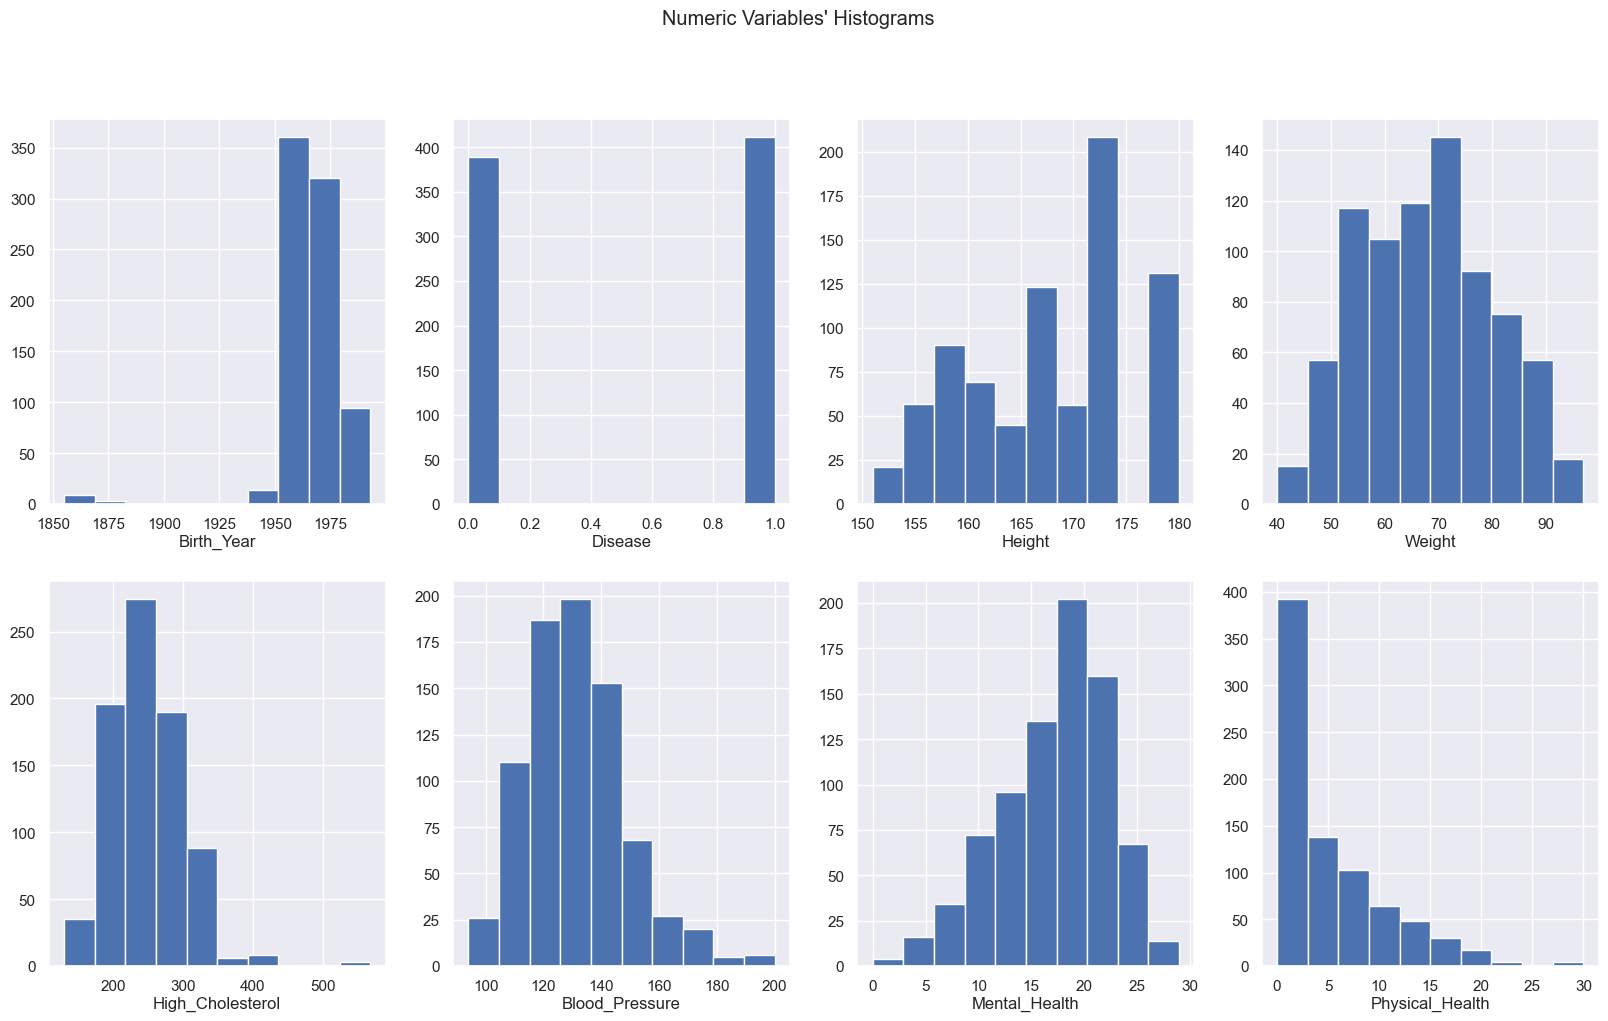

In [29]:
#plot histograms
sns.set()

#create axes
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

#plot data
for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(df_smith[feat])
    ax.set_title(feat, y=-0.13)
    
#layout
title = "Numeric Variables' Histograms"
plt.suptitle(title)
plt.show()

**Seaborn Pairplot**

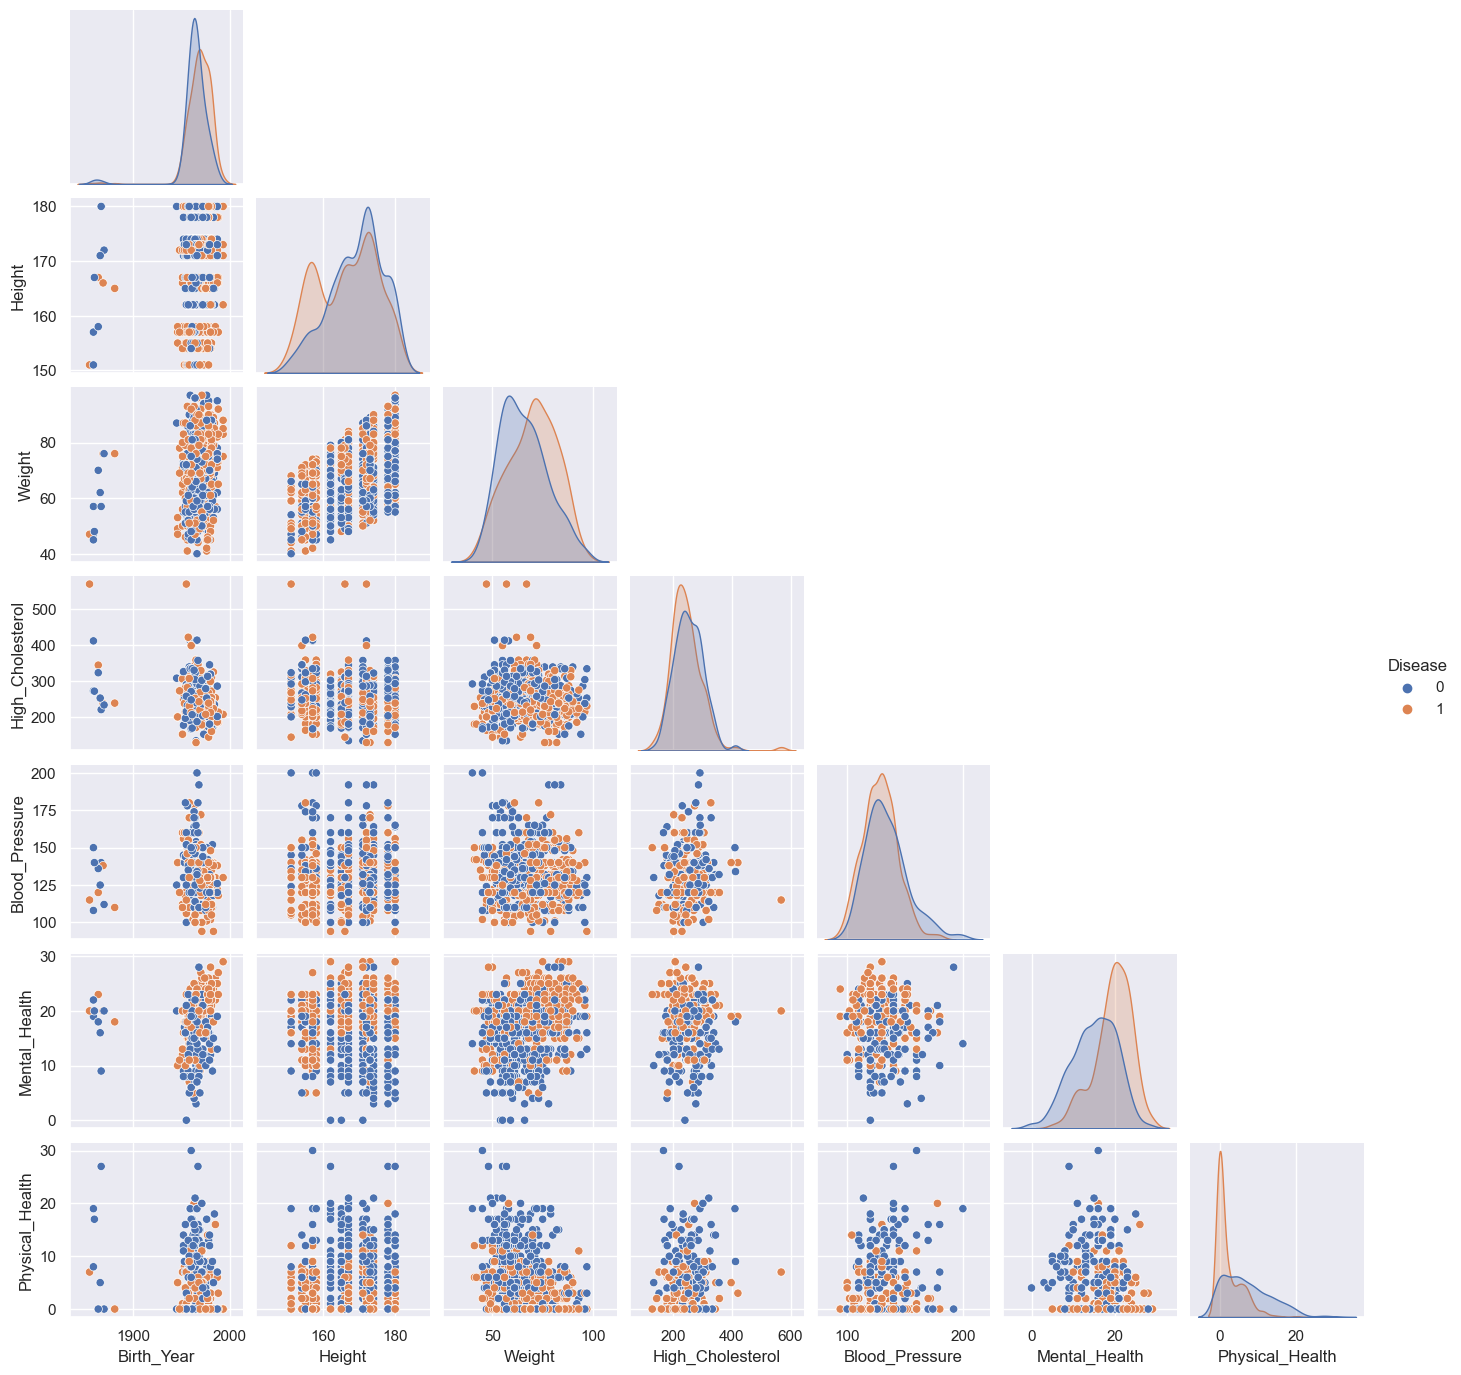

In [30]:
pairplot = sns.pairplot(df_smith[metric_features], diag_kind = 'kde', corner = True, hue = 'Disease', height = 2)

plt.show()

**Metric Features' Correlation Matrix** 

In [31]:
non_metric_features1 = ['Name','Education', "Smoking_Habit", 'Water_Habit', 'Drinking_Habit', 'Fruit_Habit', 'Exercise', 'Checkup', 'Diabetes','Region','Disease']
metric_features1 = df_smith.columns.drop(non_metric_features1).to_list()

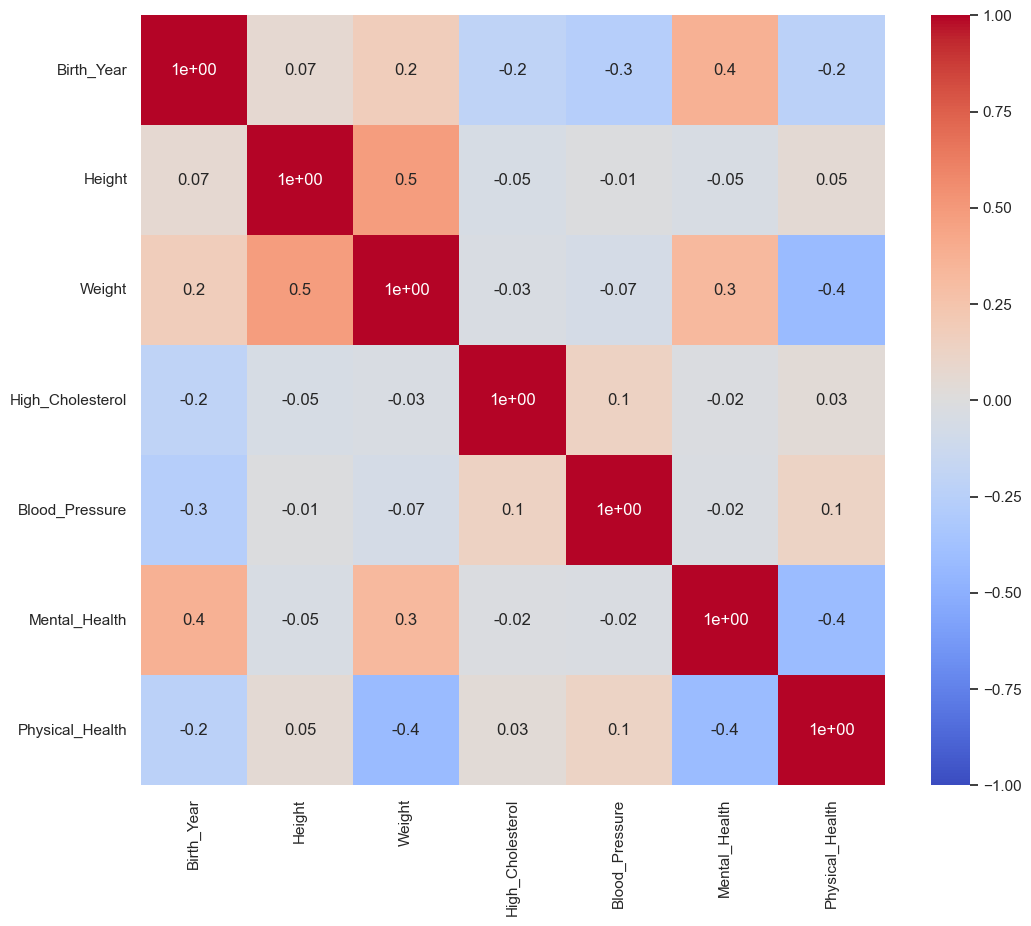

In [32]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, vmin=-1, vmax=1, annot = True, cmap="coolwarm", fmt='.1')
    plt.show()
cor_spearman = df_smith[metric_features1].corr(method = 'spearman')
cor_heatmap(cor_spearman)

> No strong correlation between the dependent variable

**BoxPlot**

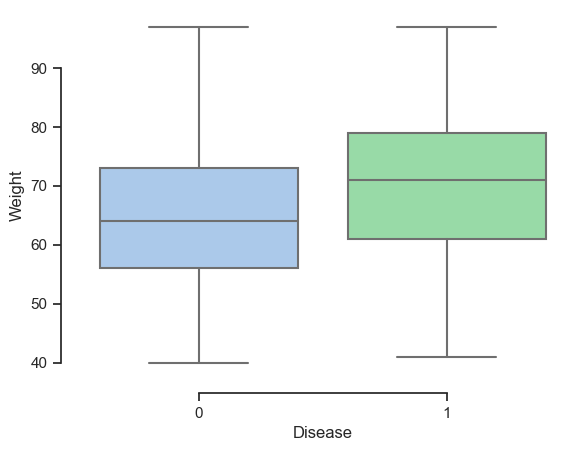

In [33]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Disease", y="Weight",
           palette=["b", "g"],
            data=df_smith)
sns.despine(offset=10, trim=True)

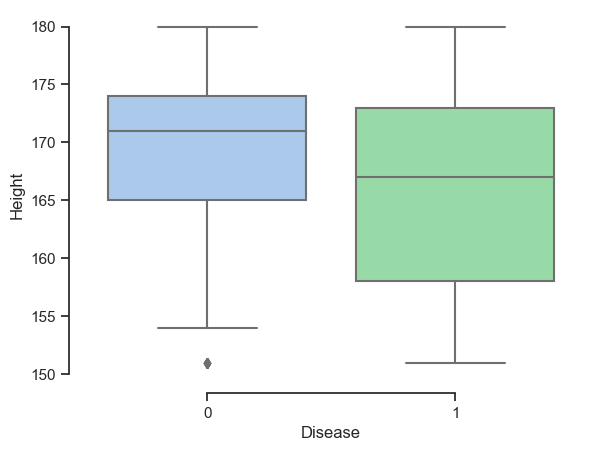

In [34]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Disease", y="Height",
           palette=["b", "g"],
            data=df_smith)
sns.despine(offset=10, trim=True)

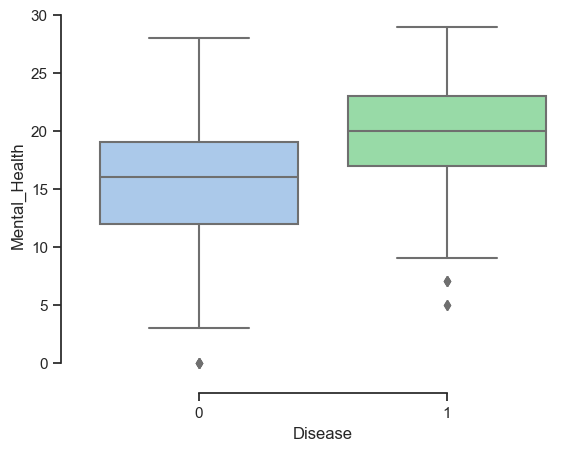

In [35]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Disease", y="Mental_Health",
           palette=["b", "g"],
            data=df_smith)
sns.despine(offset=10, trim=True)

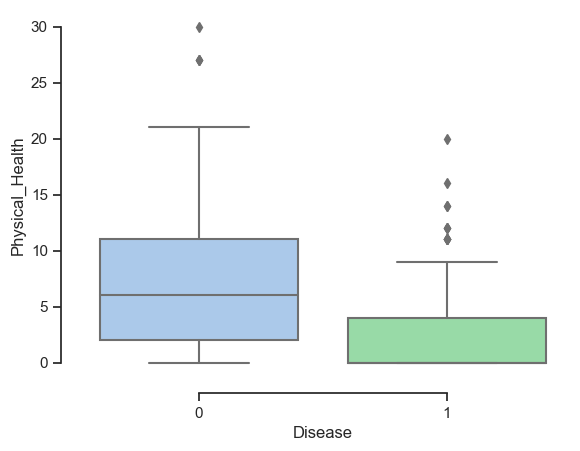

In [36]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Disease", y="Physical_Health",
           palette=["b", "g"],
            data=df_smith)
sns.despine(offset=10, trim=True)

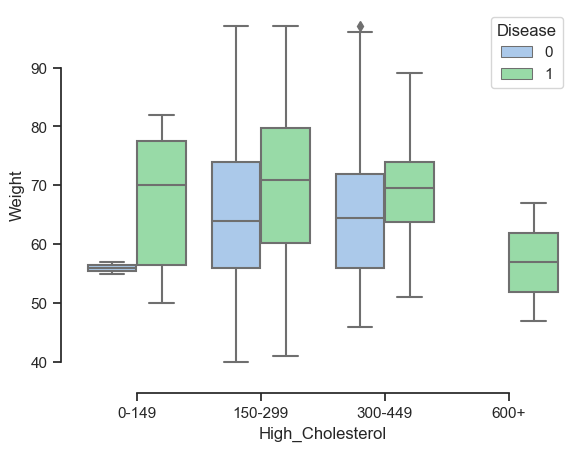

In [37]:
sns.set_theme(style="ticks", palette='pastel')

 

bins = [0, 150, 300, 450, 600]
labels = ['0-149', '150-299', '300-449', '600+']

 

HeightGroup = pd.cut(df_smith['High_Cholesterol'], bins=bins, labels=labels, right=False)



# Draw a nested boxplot to show bills by day and time
sns.boxplot(x=HeightGroup, y="Weight",
            hue="Disease", palette=["b", "g"],
            data=df_smith)
sns.despine(offset=10, trim=True)

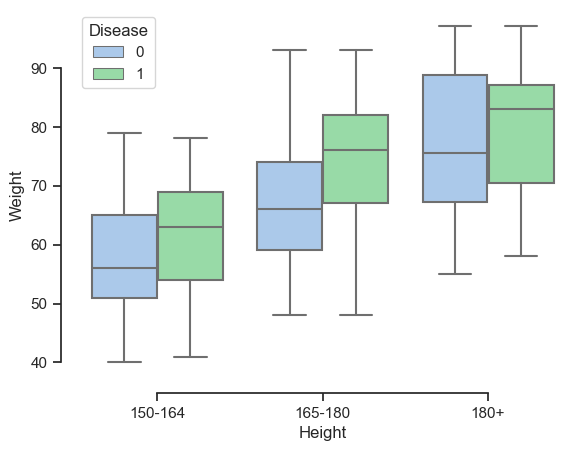

In [38]:
sns.set_theme(style="ticks", palette='pastel')
 
bins = [150, 165, 180, 190]
labels = ['150-164', '165-180', '180+']
 
HeightGroup = pd.cut(df_smith['Height'], bins=bins, labels=labels, right=False)
 
 
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x=HeightGroup, y="Weight",
            hue="Disease", palette=["b", "g"],
            data=df_smith)
sns.despine(offset=10, trim=True)

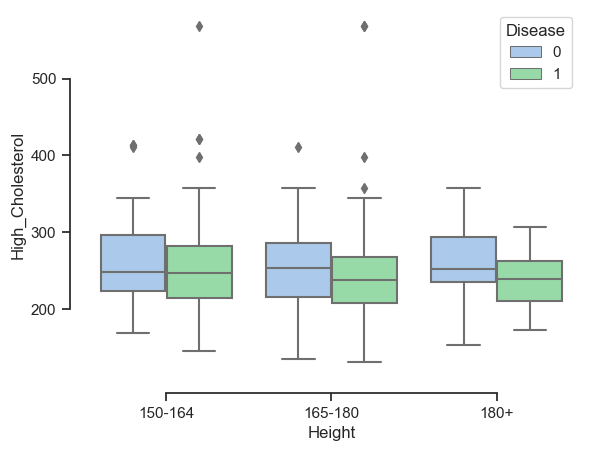

In [39]:
sns.set_theme(style="ticks", palette='pastel')
 
bins = [150, 165, 180, 190]
labels = ['150-164', '165-180', '180+']
 
HeightGroup = pd.cut(df_smith['Height'], bins=bins, labels=labels, right=False)
 
 
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x=HeightGroup, y="High_Cholesterol",
            hue="Disease", palette=["b", "g"],
            data=df_smith)
sns.despine(offset=10, trim=True)

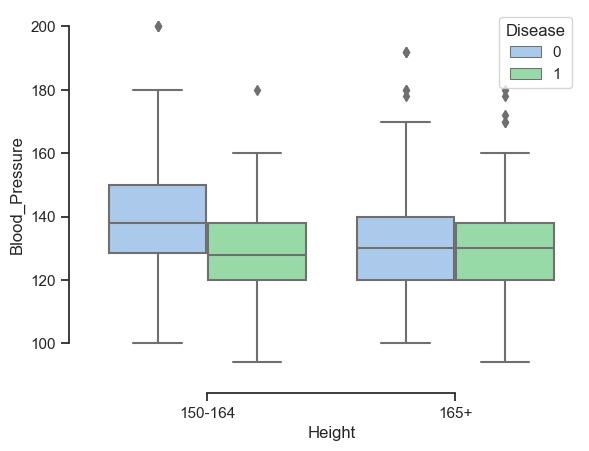

In [40]:
sns.set_theme(style="ticks", palette='pastel')
 
bins = [150, 164, 180]
labels = ['150-164', '165+']
 
HeightGroup = pd.cut(df_smith['Height'], bins=bins, labels=labels, right=False)
 
 
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x=HeightGroup, y="Blood_Pressure",
            hue="Disease", palette=["b", "g"],
            data=df_smith)
sns.despine(offset=10, trim=True)

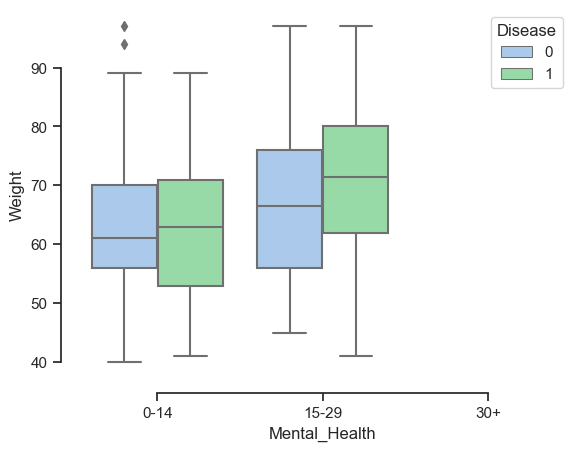

In [41]:
sns.set_theme(style="ticks", palette='pastel')
 
bins = [0, 15, 30, 35 ]
labels = ['0-14', '15-29', '30+']
 
HeightGroup = pd.cut(df_smith['Mental_Health'], bins=bins, labels=labels, right=False)
 
 
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x=HeightGroup, y="Weight",
            hue="Disease", palette=["b", "g"],
            data=df_smith)
sns.despine(offset=10, trim=True)

**Numeric Variables' Univariate Distribution**

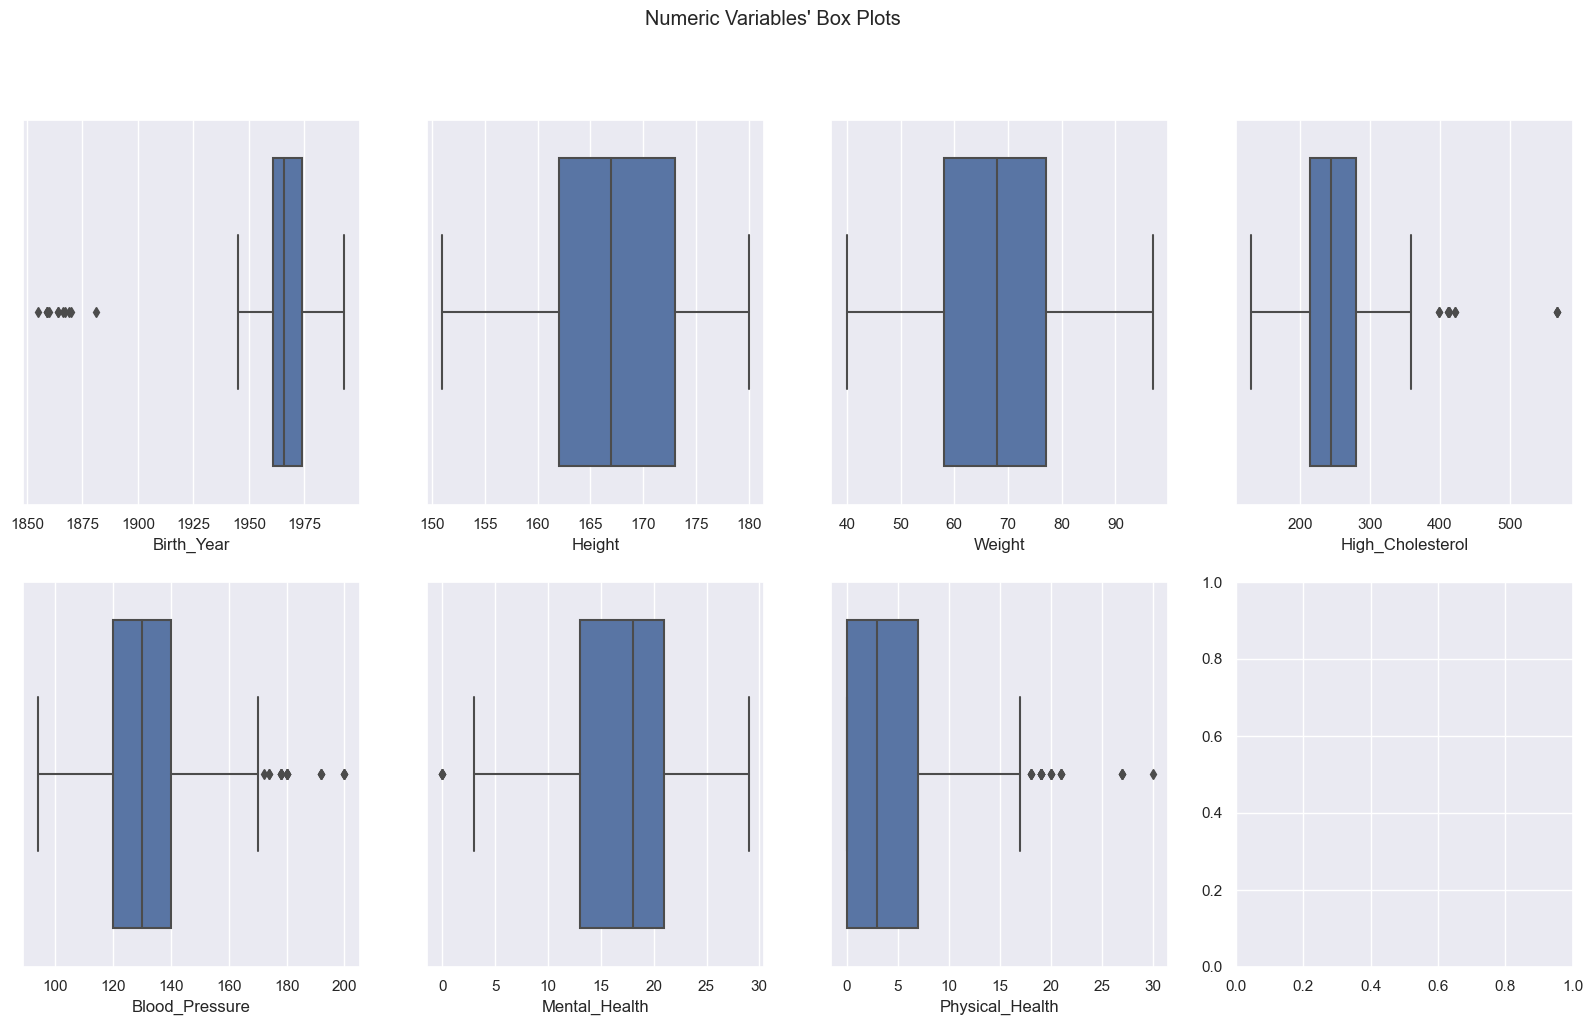

In [42]:
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features1) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features1): # Notice the zip() function and flatten() method
    sns.boxplot(x=df_smith[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()

## 3. Data Preprocessing

### 3.1 Treating Missing Values

**Filling missing values**

> Fill missing values for non metric features (*Education*) using the mode.

In [43]:
#For categorical variables, we replace them with mode
mode_Education = df_smith['Education'].mode().loc[0]
df_smith.fillna(mode_Education, inplace=True)

 Verify if the missing values are now all complete. 

In [44]:
df_smith.isna().sum()

Name                0
Birth_Year          0
Region              0
Education           0
Disease             0
Smoking_Habit       0
Drinking_Habit      0
Exercise            0
Fruit_Habit         0
Water_Habit         0
Height              0
Weight              0
High_Cholesterol    0
Blood_Pressure      0
Mental_Health       0
Physical_Health     0
Checkup             0
Diabetes            0
dtype: int64

### 3.2 Outlier Treatment

> Based on the graphic above, it is possible to conclude that Birth_Year, High_Cholesterol and Blood_Pressure contais **outliers**

In [45]:
for x in ['Birth_Year']:

    df_smith.loc[df_smith[x] <= 1942,x] = np.nan

In [46]:
for x in ['Blood_Pressure']:

    df_smith.loc[df_smith[x] > 170,x] = np.nan

In [47]:
for x in ['High_Cholesterol']:

    df_smith.loc[df_smith[x] > 500,x] = np.nan

In [48]:
df_smith.isna().sum()

Name                 0
Birth_Year          12
Region               0
Education            0
Disease              0
Smoking_Habit        0
Drinking_Habit       0
Exercise             0
Fruit_Habit          0
Water_Habit          0
Height               0
Weight               0
High_Cholesterol     3
Blood_Pressure      19
Mental_Health        0
Physical_Health      0
Checkup              0
Diabetes             0
dtype: int64

In [49]:
outliers= ['Birth_Year', 'Blood_Pressure', 'High_Cholesterol']

In [50]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_smith[outliers] = imputer.fit_transform(df_smith[outliers])

In [51]:
df_smith.isna().sum()

Name                0
Birth_Year          0
Region              0
Education           0
Disease             0
Smoking_Habit       0
Drinking_Habit      0
Exercise            0
Fruit_Habit         0
Water_Habit         0
Height              0
Weight              0
High_Cholesterol    0
Blood_Pressure      0
Mental_Health       0
Physical_Health     0
Checkup             0
Diabetes            0
dtype: int64

### 3.3 Fixing inconsistencies 

> To elimiate the London's region problem:


In [52]:
for col in ['Name','Region', 'Education', 'Drinking_Habit', 'Smoking_Habit', 'Exercise', 'Fruit_Habit', 'Water_Habit', 'Checkup', 'Diabetes']:
    df_smith[col] = df_smith[col].str.lower()

In [53]:
df_smith

Name  Birth_Year                    Region  \
PatientID                                                                 
1167           mrs. stephanie gay      1965.0                    london   
1805             mr. sherman nero      1969.0                south west   
1557              mr. mark boller      1974.0  yorkshire and the humber   
1658             mr. david caffee      1958.0                    london   
1544             mr. gerald emery      1968.0                south east   
...                           ...         ...                       ...   
1909             mr. philip klink      1972.0             east midlands   
1386         mrs. jackie valencia      1980.0                north west   
1088           mrs. cheryl harris      1961.8             east midlands   
1662        mr. florencio doherty      1975.0           east of england   
1117       mr. freddie vermillion      1979.0                    london   

                                             Education  Disease Smoking_Habit  \
PatientID                                                                       
1167       high school incomplete (10th to 11th grade)        1            no   
1805       high school incomplete (10th to 11th grade)        1            no   
1557              elementary school (1st to 9th grade)        1            no   
1658             university complete (3 or more years)        0            no   
1544              university incomplete (1 to 2 years)        1            no   
...                                                ...      ...           ...   
1909       high school incomplete (10th to 11th grade)        0            no   
1386              elementary school (1st to 9th grade)        1            no   
1088              elementary school (1st to 9th grade)        0            no   
1662              elementary school (1st to 9th grade)        1            no   
1117              elementary school (1st to 9th grade)        0            no   

                                Drinking_Habit Exercise  \
PatientID                                                 
1167       i usually consume alcohol every day      yes   
1805        i consider myself a social drinker      yes   
1557        i consider myself a social drinker       no   
1658       i usually consume alcohol every day      yes   
1544        i consider myself a social drinker       no   
...                                        ...      ...   
1909        i consider myself a social drinker      yes   
1386       i usually consume alcohol every day       no   
1088        i consider myself a social drinker       no   
1662       i usually consume alcohol every day       no   
1117        i consider myself a social drinker      yes   

                                               Fruit_Habit  \
PatientID                                                    
1167       less than 1. i do not consume fruits every day.   
1805       less than 1. i do not consume fruits every day.   
1557       less than 1. i do not consume fruits every day.   
1658       less than 1. i do not consume fruits every day.   
1544                     1 to 2 pieces of fruit in average   
...                                                    ...   
1909       less than 1. i do not consume fruits every day.   
1386       less than 1. i do not consume fruits every day.   
1088                     3 to 4 pieces of fruit in average   
1662       less than 1. i do not consume fruits every day.   
1117       less than 1. i do not consume fruits every day.   

                                              Water_Habit  Height  Weight  \
PatientID                                                                   
1167                     between one liter and two liters     155      67   
1805                     between one liter and two liters     173      88   
1557       more than half a liter but less than one liter     162      68   
1658       more than half a liter but l

## 4. Feature Engineering

### 4.1 Variables Transformation

**Birth year to Age**

In [54]:
def processing_age(df):
    df_smith = df.copy()
    age = []

    for i in  df_smith["Birth_Year"]:
        age.append(2022 - int(i))

    df_smith['Birth_Year'] = age
    df_smith = df_smith.rename(columns={'Birth_Year': 'Age'})
    return df_smith

In [55]:
df_smith=processing_age(df_smith)

**Name to Sex**

In [56]:
def processing_gender(df):
    df_smith = df.copy()
    gender = []
    for i in df_smith["Name"]:
        if i[:3] == "mrs":
            gender.append(1)
        else:
            gender.append(0)
            
    df_smith["Name"] = gender
    df_smith= df_smith.rename(columns = {"Name":"Sex"})
    return df_smith

In [57]:
df_smith=processing_gender(df_smith)

In [58]:
def processing_region(df):
    df_smith = df.copy() 
    df_smith['Region'] = df_smith['Region'].replace("yorkshire and the humber", "North" )
    df_smith['Region'] = df_smith['Region'].replace("north east", "North")
    df_smith['Region'] = df_smith['Region'].replace("north west", "North")
    df_smith['Region'] = df_smith['Region'].replace("east midlands", "Central")
    df_smith['Region'] = df_smith['Region'].replace("east of england", "Central")
    df_smith['Region'] = df_smith['Region'].replace("west midlands", "Central")
    df_smith['Region'] = df_smith['Region'].replace("south west", "South")
    df_smith['Region'] = df_smith['Region'].replace("south east", "South")
    df_smith['Region'] = df_smith['Region'].replace("london", "South")
    df_smith = pd.get_dummies(data=df_smith, columns=['Region'])
    return df_smith

In [59]:
df_smith=processing_region(df_smith)

**IMC**

In [60]:
def processing_imc(df):
    df_smith = df.copy() 
    return df_smith.apply(lambda x: (x.Weight/(x.Height**2)*10000), axis=1).round(2)

In [61]:
df_smith['IMC']=processing_imc(df_smith)

### 4.2 Binary Transformation

**Exercise**

In [62]:
def processing_exercise(df):
    df_smith = df.copy()

    exercise = []
    for i in df_smith["Exercise"]:
        if i[:3] == "yes":
            exercise.append(1)
        else:
            exercise.append(0)
            
    df_smith["Exercise"] = exercise
    return df_smith

In [63]:
df_smith=processing_exercise(df_smith)

**Smoking_Habit**

In [64]:
def processing_smoking(df):
    df_smith = df.copy()
    smoking = []
    for i in df_smith["Smoking_Habit"]:
        if i[:3] == "yes":
            smoking.append(1)
        else:
            smoking.append(0)
            
    df_smith["Smoking_Habit"] = smoking
    return df_smith

In [65]:
df_smith=processing_smoking(df_smith)

### 4.3 Transform categorical variables in degrees

**Education**

In [66]:
def convert_education(df):
    df_smith = df.copy()
    scale_mapper = {"i never attended school / other":0,
                "elementary school (1st to 9th grade)":1,
                "high school incomplete (10th to 11th grade)":2,
                "high school graduate":3,
                "university incomplete (1 to 2 years)":4,
                "university complete (3 or more years)":5}
    return df_smith["Education"].replace(scale_mapper)

In [67]:
df_smith["Education"]=convert_education(df_smith)

**Water_Habit**

In [68]:
def convert_water_habit(df):
    df_smith = df.copy()
    scale_mapper1 = {"less than half a liter":0, "more than half a liter but less than one liter":1,
                     "between one liter and two liters":2}
    return df_smith["Water_Habit"].replace(scale_mapper1)

In [69]:
df_smith["Water_Habit"]=convert_water_habit(df_smith)

**Checkup**

In [70]:
def convert_checkup(df):
    df_smith = df.copy()
    scale_mapper = {"not sure":0, "more than 3 years":1,"less than 3 years but more than 1 year":2,
                    "less than three months":3}

    return df_smith["Checkup"].replace(scale_mapper)

In [71]:
df_smith["Checkup"]=convert_checkup(df_smith)

**Diabetes**

In [72]:
def convert_diabetes(df):
    df_smith = df.copy()
    scale_mapper={"i do have diabetes":0,"i have/had pregnancy diabetes or borderline diabetes":1, 
                   "i don't have diabetes, but i have direct family members who have diabetes.":2,
                   "neither i nor my immediate family have diabetes.":3}
    return df_smith["Diabetes"].replace(scale_mapper)

In [73]:
df_smith['Diabetes']=convert_diabetes(df_smith)

**Fruit_Habit**

In [74]:
def convert_fruit_habit(df):
    df_smith = df.copy()
    scale_mapper={"less than 1. i do not consume fruits every day.":0,
                  "1 to 2 pieces of fruit in average":1, 
                  "3 to 4 pieces of fruit in average":2,
                  "5 to 6 pieces of fruit in average":3,
                  "more than six pieces of fruit":4,
                 }
    return df_smith["Fruit_Habit"].replace(scale_mapper)

In [75]:
df_smith["Fruit_Habit"]=convert_fruit_habit(df_smith)

**Drinking_Habit**

In [76]:
def convert_drinking_habit(df):
    df_smith = df.copy()
    scale_mapper={"i usually consume alcohol every day":0,
                  "i consider myself a social drinker":1, 
                  "i do not consume any type of alcohol":2
                 }
    return df_smith["Drinking_Habit"].replace(scale_mapper)

In [77]:
df_smith["Drinking_Habit"]=convert_drinking_habit(df_smith)

In [78]:
df_smith

Sex  Age  Education  Disease  Smoking_Habit  Drinking_Habit  \
PatientID                                                                
1167         1   57          2        1              0               0   
1805         0   53          2        1              0               1   
1557         0   48          1        1              0               1   
1658         0   64          5        0              0               0   
1544         0   54          4        1              0               1   
...        ...  ...        ...      ...            ...             ...   
1909         0   50          2        0              0               1   
1386         1   42          1        1              0               0   
1088         1   61          1        0              0               1   
1662         0   47          1        1              0               0   
1117         0   43          1        0              0               1   

           Exercise  Fruit_Habit  Water_Habit  Height  ...  High_Cholesterol  \
PatientID                                              ...                     
1167              1            0            2     155  ...             358.0   
1805              1            0            2     173  ...             230.0   
1557              0            0            1     162  ...             226.0   
1658              1            0            1     180  ...             313.0   
1544              0            1            1     180  ...             277.0   
...             ...          ...          ...     ...  ...               ...   
1909              1            0            2     178  ...             204.0   
1386              0            0            2     157  ...             213.0   
1088              0            2            1     167  ...             272.0   
1662              0            0            1     165  ...             208.0   
1117              1            0            0     173  ...             181.0   

           Blood_Pressure  Mental_Health  Physical_Health  Checkup  Diabetes  \
PatientID                                                                      
1167                120.0             21                2        1         3   
1805                142.0              9                0        0         3   
1557                122.0             26                0        1         3   
1658                125.0             13                8        0         1   
1544                125.0             18                2        1         1   
...                   ...            ...              ...      ...       ...   
1909                144.0             12                4        0         3   
1386                120.0             23                0        1         1   
1088                140.0             20               17        1         3   
1662                112.0             16                0        1         3   
1117                120.0             11               12        0         3   

           Region_Central  Region_North  Region_South    IMC  
PatientID                                                     
1167                    0             0             1  27.89  
1805                    0             0             1  29.40  
1557                    0             1             0  25.91  
1658                    0             0             1  20.37  
1544                    0             0             1  17.90  
...                   ...           ...           ...    ...  
1909                    1             0             0  19.25  
1386                    0             1             0  24.75  
1088                    1             0             0  17.21  
1662                    1             0             0  27.55  
1117                    0             0             1  23.39  

[800 rows x 21 columns]

## 5. Visualization after Feature Engineerging

In [79]:
non_metric_features2 = ['Sex','Education', 'Smoking_Habit', 'Water_Habit', 'Drinking_Habit', 'Fruit_Habit', 'Exercise', 'Checkup','Region_Central','Region_North','Region_South', 'Diabetes']
metric_features2= df_smith.columns.drop(non_metric_features2).to_list()

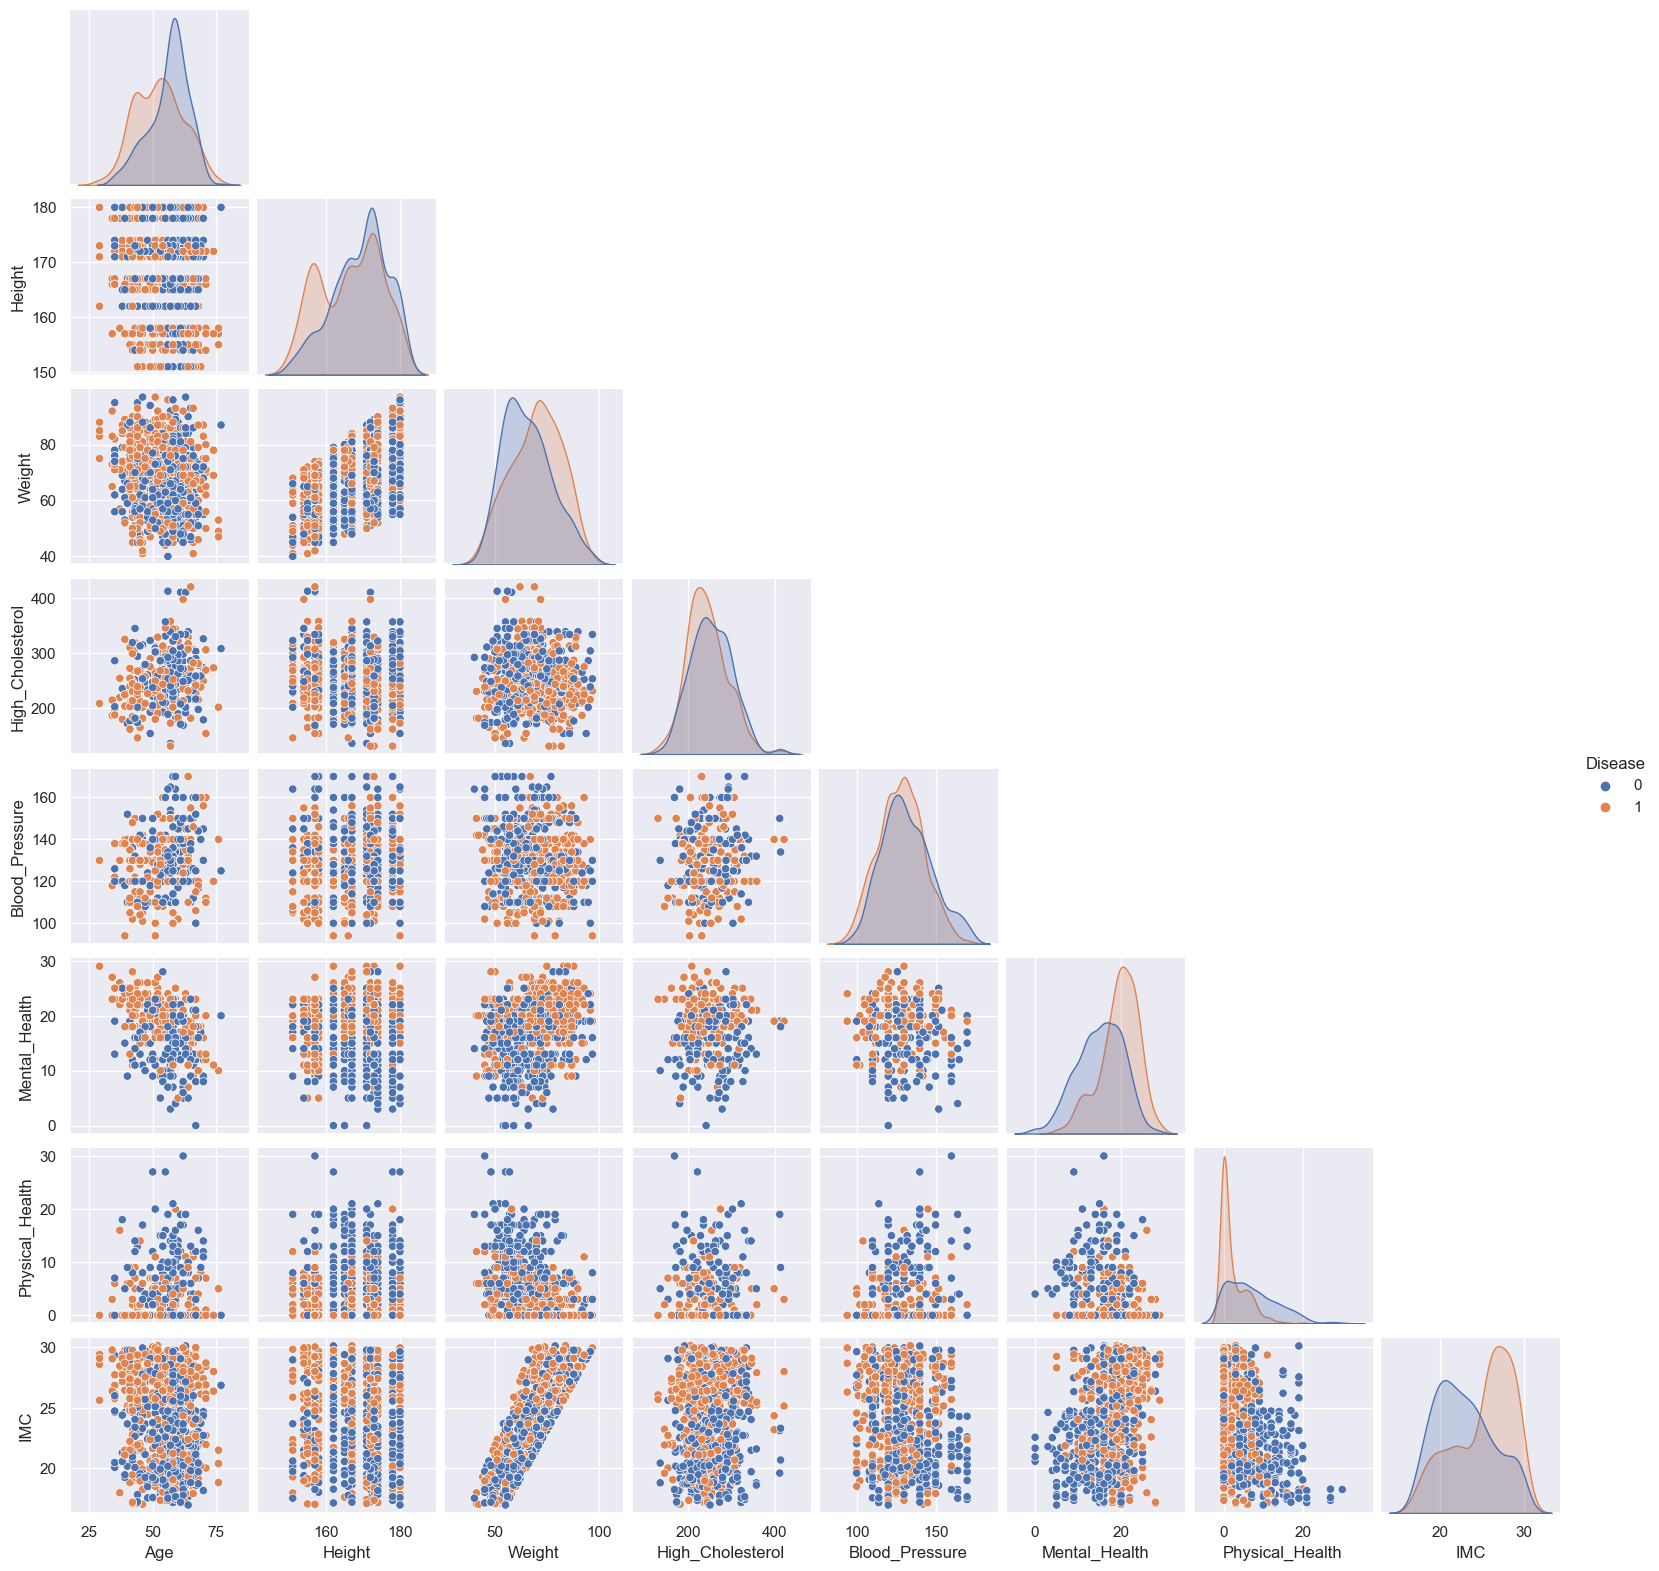

In [80]:
pairplot_all_smith = sns.pairplot(df_smith[metric_features2], diag_kind = 'kde', hue = "Disease", corner = True, height = 2)

plt.show()

In [81]:
non_metric_features3 = ['Sex','Education', 'Smoking_Habit', 'Water_Habit', 'Drinking_Habit', 'Fruit_Habit', 'Exercise', 'Checkup','Region_Central','Region_North','Region_South', 'Diabetes', 'Disease']
metric_features3= df_smith.columns.drop(non_metric_features3).to_list()

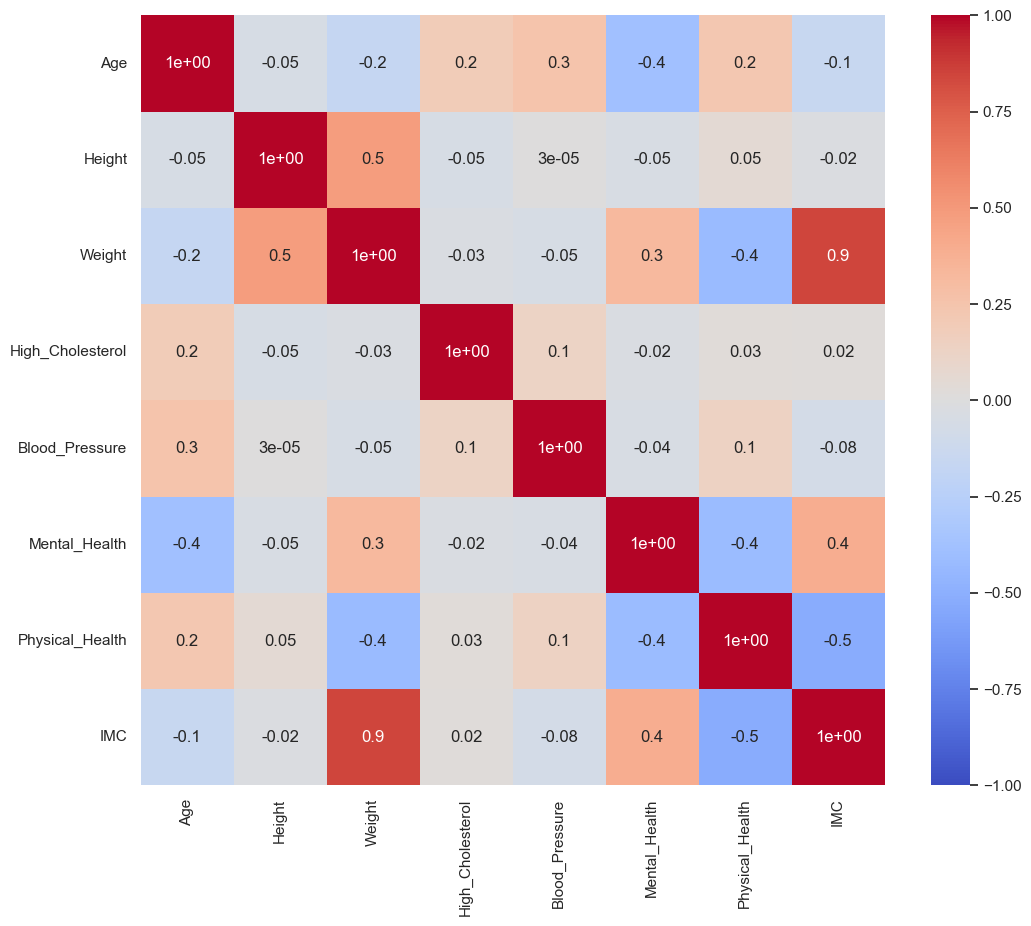

In [82]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, vmin=-1, vmax=1, annot = True, cmap="coolwarm", fmt='.1')
    plt.show()
cor_spearman = df_smith[metric_features3].corr(method = 'spearman')
cor_heatmap(cor_spearman)

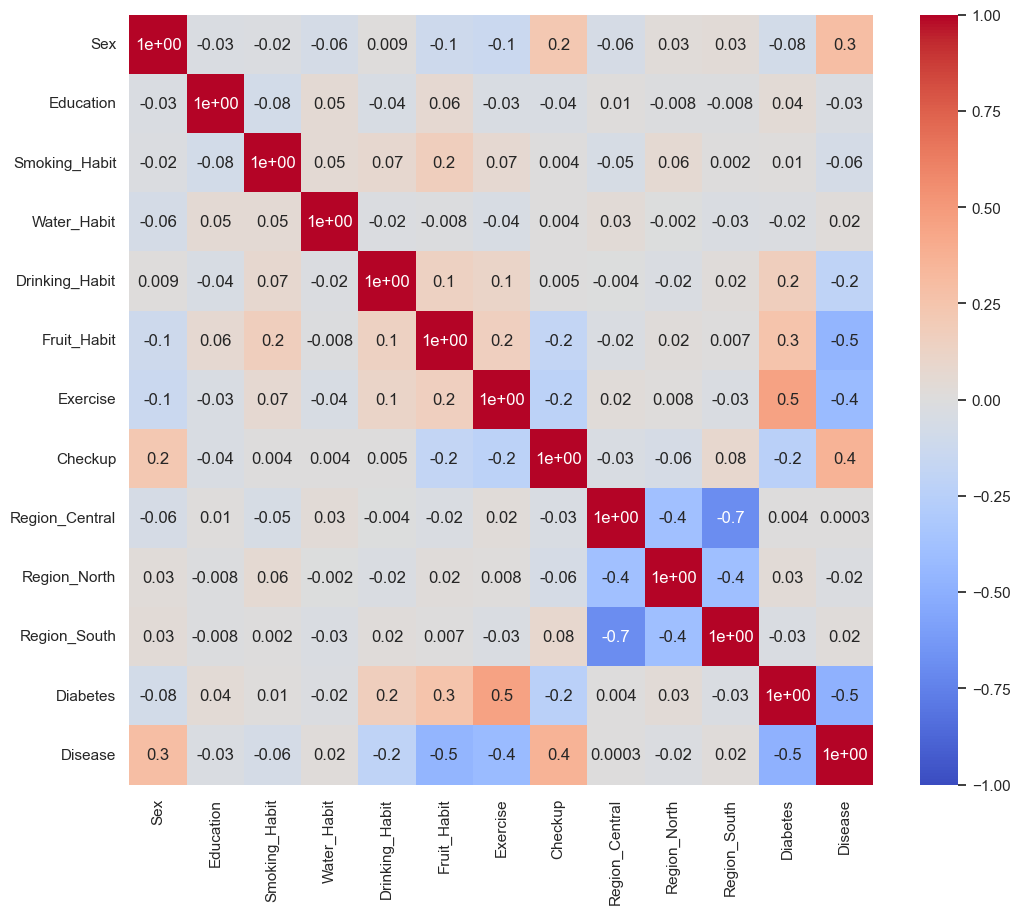

In [83]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, vmin=-1, vmax=1, annot = True, cmap="coolwarm", fmt='.1')
    plt.show()
cor_spearman = df_smith[non_metric_features3].corr(method = 'spearman')
cor_heatmap(cor_spearman)

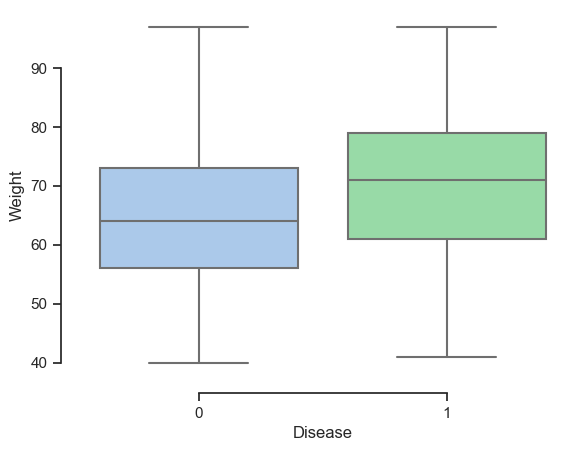

In [84]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Disease", y="Weight",
           palette=["b", "g"],
            data=df_smith)
sns.despine(offset=10, trim=True)

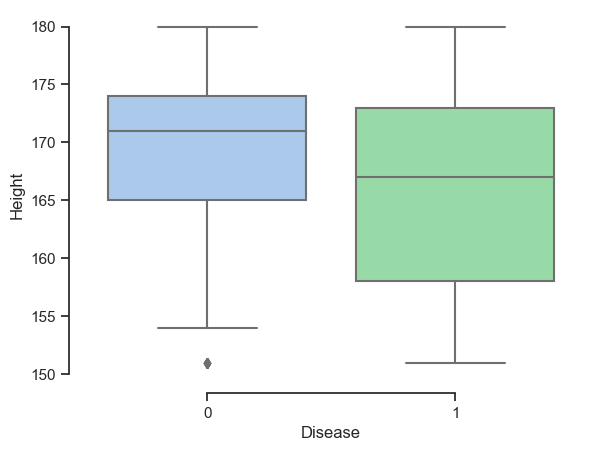

In [85]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Disease", y="Height",
           palette=["b", "g"],
            data=df_smith)
sns.despine(offset=10, trim=True)

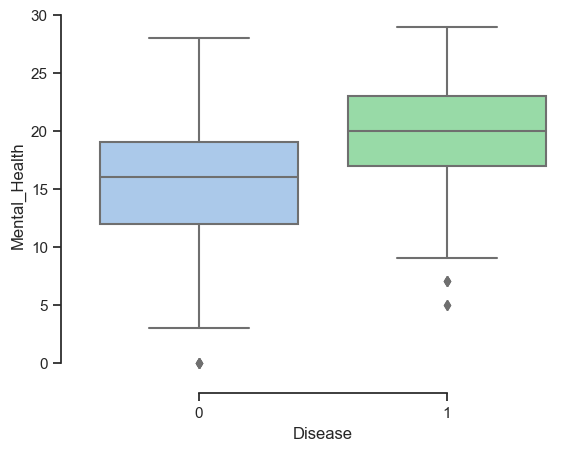

In [86]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Disease", y="Mental_Health",
           palette=["b", "g"],
            data=df_smith)
sns.despine(offset=10, trim=True)

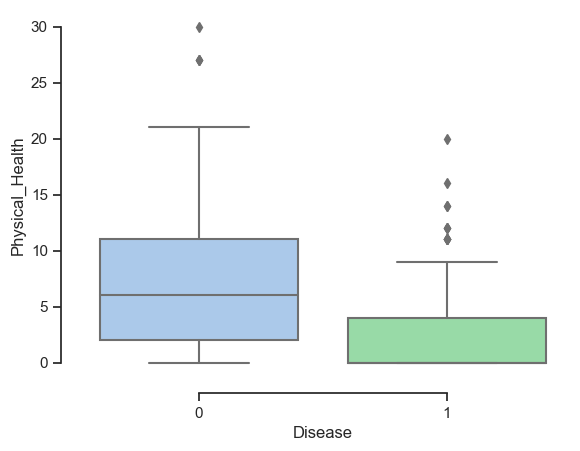

In [87]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Disease", y="Physical_Health",
           palette=["b", "g"],
            data=df_smith)
sns.despine(offset=10, trim=True)

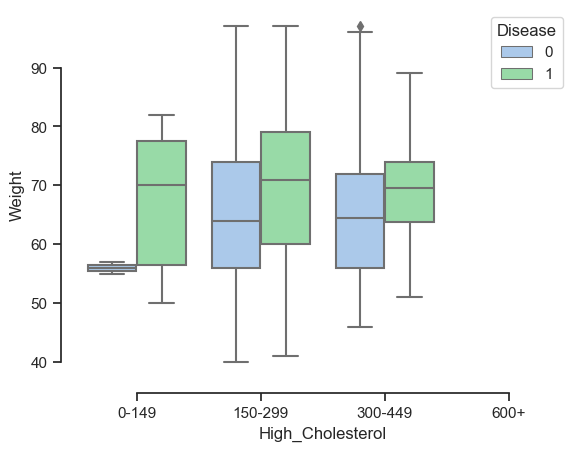

In [88]:
sns.set_theme(style="ticks", palette='pastel')
 
bins = [0, 150, 300, 450, 600]
labels = ['0-149', '150-299', '300-449', '600+']
 
HeightGroup = pd.cut(df_smith['High_Cholesterol'], bins=bins, labels=labels, right=False)
sns.boxplot(x=HeightGroup, y="Weight",
            hue="Disease", palette=["b", "g"],
            data=df_smith)
sns.despine(offset=10, trim=True)

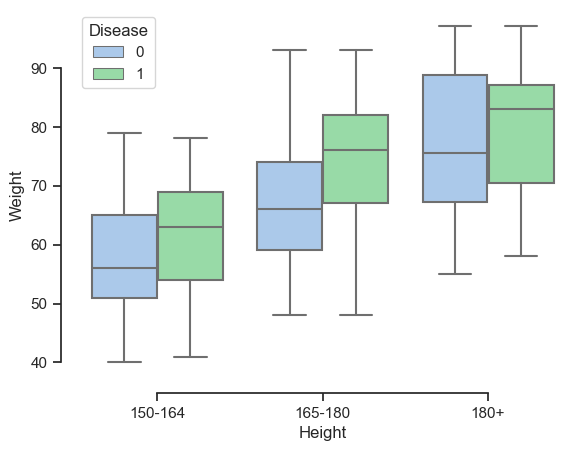

In [89]:
sns.set_theme(style="ticks", palette='pastel')
 
bins = [150, 165, 180, 190]
labels = ['150-164', '165-180', '180+']
 
HeightGroup = pd.cut(df_smith['Height'], bins=bins, labels=labels, right=False)
 
 
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x=HeightGroup, y="Weight",
            hue="Disease", palette=["b", "g"],
            data=df_smith)
sns.despine(offset=10, trim=True)

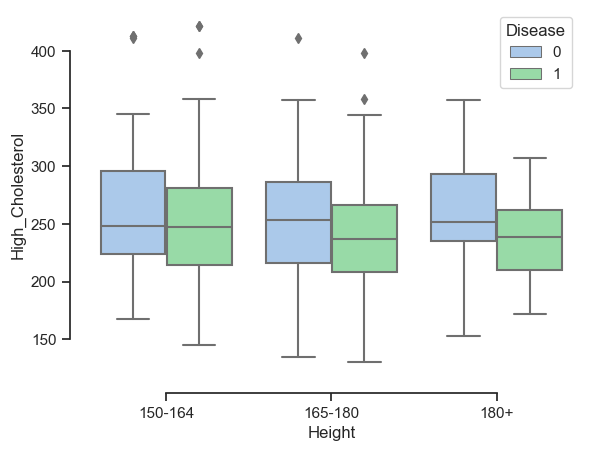

In [90]:
sns.set_theme(style="ticks", palette='pastel')
 
bins = [150, 165, 180, 190]
labels = ['150-164', '165-180', '180+']
 
HeightGroup = pd.cut(df_smith['Height'], bins=bins, labels=labels, right=False)
 
 
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x=HeightGroup, y="High_Cholesterol",
            hue="Disease", palette=["b", "g"],
            data=df_smith)
sns.despine(offset=10, trim=True)

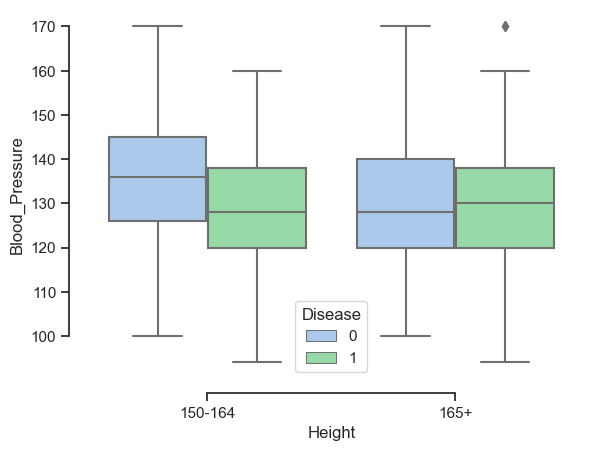

In [91]:
sns.set_theme(style="ticks", palette='pastel')
 
bins = [150, 164, 180]
labels = ['150-164', '165+']
 
HeightGroup = pd.cut(df_smith['Height'], bins=bins, labels=labels, right=False)
 
 
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x=HeightGroup, y="Blood_Pressure",
            hue="Disease", palette=["b", "g"],
            data=df_smith)
sns.despine(offset=10, trim=True)

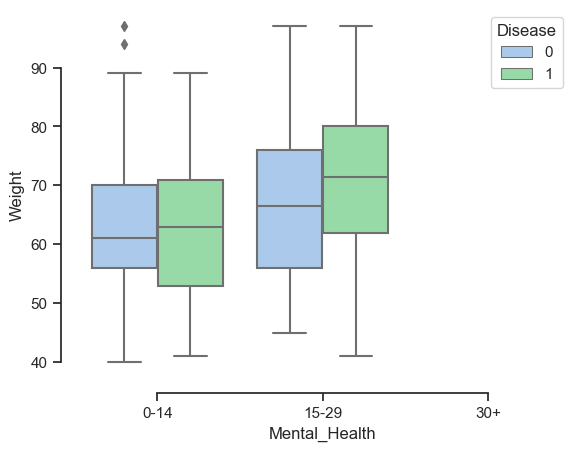

In [92]:
sns.set_theme(style="ticks", palette='pastel')
 
bins = [0, 15, 30, 35 ]
labels = ['0-14', '15-29', '30+']
 
HeightGroup = pd.cut(df_smith['Mental_Health'], bins=bins, labels=labels, right=False)
 
 
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x=HeightGroup, y="Weight",
            hue="Disease", palette=["b", "g"],
            data=df_smith)
sns.despine(offset=10, trim=True)

## 6. Data Processing

> After studying the dataset, we will organize the code in order to apply it to the train and the test of the data set

### 6.1 Data Normalization

In [93]:
def scaling_data(X, train=True):
    df_smith = X.copy()
    
    # ### MinMaxScaler
    if train:
        scaler = MinMaxScaler()
        scaler.fit(df_smith)
        dump(scaler, open('scaler_num.pkl', 'wb')) # guarda o scaling no treino
    else:
        scaler = load(open('scaler_num.pkl', 'rb')) # lê o scaling no treino/ validação


    df_smith_scaled = scaler.transform(df_smith) 
    df_smith_scaled = pd.DataFrame(df_smith_scaled, columns=X.columns).set_index(df_smith.index)

    return df_smith_scaled

In [94]:
df_smith_scaled=scaling_data(df_smith)
df_smith_scaled.head(2)

Sex       Age  Education  Disease  Smoking_Habit  Drinking_Habit  \
PatientID                                                                     
1167       1.0  0.583333        0.4      1.0            0.0             0.0   
1805       0.0  0.500000        0.4      1.0            0.0             0.5   

           Exercise  Fruit_Habit  Water_Habit    Height  ...  \
PatientID                                                ...   
1167            1.0          0.0          1.0  0.137931  ...   
1805            1.0          0.0          1.0  0.758621  ...   

           High_Cholesterol  Blood_Pressure  Mental_Health  Physical_Health  \
PatientID                                                                     
1167               0.783505        0.342105       0.724138         0.066667   
1805               0.343643        0.631579       0.310345         0.000000   

            Checkup  Diabetes  Region_Central  Region_North  Region_South  \
PatientID                                                                   
1167       0.333333       1.0             0.0           0.0           1.0   
1805       0.000000       1.0             0.0           0.0           1.0   

                IMC  
PatientID            
1167       0.830289  
1805       0.945205  

[2 rows x 21 columns]

In [95]:
non_metric_features4 = ['Sex','Education', 'Smoking_Habit', 'Water_Habit', 'Drinking_Habit', 'Fruit_Habit', 'Exercise', 'Checkup','Region_Central','Region_North','Region_South', 'Diabetes']
metric_features4= df_smith.columns.drop(non_metric_features4).to_list()

In [96]:
X= df_smith_scaled.drop('Disease', axis = 1)
y = df_smith_scaled['Disease']

In [97]:
X_scaled=X.copy()

In [98]:
X_num_scaled=X_scaled[metric_features3]
X_cat_scaled=X_scaled[non_metric_features4]

In [99]:
X_num_scaled

Age    Height    Weight  High_Cholesterol  Blood_Pressure  \
PatientID                                                                   
1167       0.583333  0.137931  0.473684          0.783505        0.342105   
1805       0.500000  0.758621  0.842105          0.343643        0.631579   
1557       0.395833  0.379310  0.491228          0.329897        0.368421   
1658       0.729167  1.000000  0.456140          0.628866        0.407895   
1544       0.520833  1.000000  0.315789          0.505155        0.407895   
...             ...       ...       ...               ...             ...   
1909       0.437500  0.931034  0.368421          0.254296        0.657895   
1386       0.270833  0.206897  0.368421          0.285223        0.342105   
1088       0.666667  0.551724  0.140351          0.487973        0.605263   
1662       0.375000  0.482759  0.614035          0.268041        0.236842   
1117       0.291667  0.758621  0.526316          0.175258        0.342105   

           Mental_Health  Physical_Health       IMC  
PatientID                                            
1167            0.724138         0.066667  0.830289  
1805            0.310345         0.000000  0.945205  
1557            0.896552         0.000000  0.679604  
1658            0.448276         0.266667  0.257991  
1544            0.620690         0.066667  0.070015  
...                  ...              ...       ...  
1909            0.413793         0.133333  0.172755  
1386            0.793103         0.000000  0.591324  
1088            0.689655         0.566667  0.017504  
1662            0.551724         0.000000  0.804414  
1117            0.379310         0.400000  0.487823  

[800 rows x 8 columns]

In [100]:
X_cat_scaled

Sex  Education  Smoking_Habit  Water_Habit  Drinking_Habit  \
PatientID                                                               
1167       1.0        0.4            0.0          1.0             0.0   
1805       0.0        0.4            0.0          1.0             0.5   
1557       0.0        0.2            0.0          0.5             0.5   
1658       0.0        1.0            0.0          0.5             0.0   
1544       0.0        0.8            0.0          0.5             0.5   
...        ...        ...            ...          ...             ...   
1909       0.0        0.4            0.0          1.0             0.5   
1386       1.0        0.2            0.0          1.0             0.0   
1088       1.0        0.2            0.0          0.5             0.5   
1662       0.0        0.2            0.0          0.5             0.0   
1117       0.0        0.2            0.0          0.0             0.5   

           Fruit_Habit  Exercise   Checkup  Region_Central  Region_North  \
PatientID                                                                  
1167              0.00       1.0  0.333333             0.0           0.0   
1805              0.00       1.0  0.000000             0.0           0.0   
1557              0.00       0.0  0.333333             0.0           1.0   
1658              0.00       1.0  0.000000             0.0           0.0   
1544              0.25       0.0  0.333333             0.0           0.0   
...                ...       ...       ...             ...           ...   
1909              0.00       1.0  0.000000             1.0           0.0   
1386              0.00       0.0  0.333333             0.0           1.0   
1088              0.50       0.0  0.333333             1.0           0.0   
1662              0.00       0.0  0.333333             1.0           0.0   
1117              0.00       1.0  0.000000             0.0           0.0   

           Region_South  Diabetes  
PatientID                          
1167                1.0  1.000000  
1805                1.0  1.000000  
1557                0.0  1.000000  
1658                1.0  0.333333  
1544                1.0  0.333333  
...                 ...       ...  
1909                0.0  1.000000  
1386                0.0  0.333333  
1088                0.0  1.000000  
1662                0.0  1.000000  
1117                1.0  1.000000  

[800 rows x 12 columns]

## 7. Feature Selection

> Notice that we decided to do the split after the Feature Selection enabling us to do the analyse of the untouched data frame (without division) and to lead us to more reliable results

### Spearman

In [101]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Greens, fmt='.1')
    plt.show()

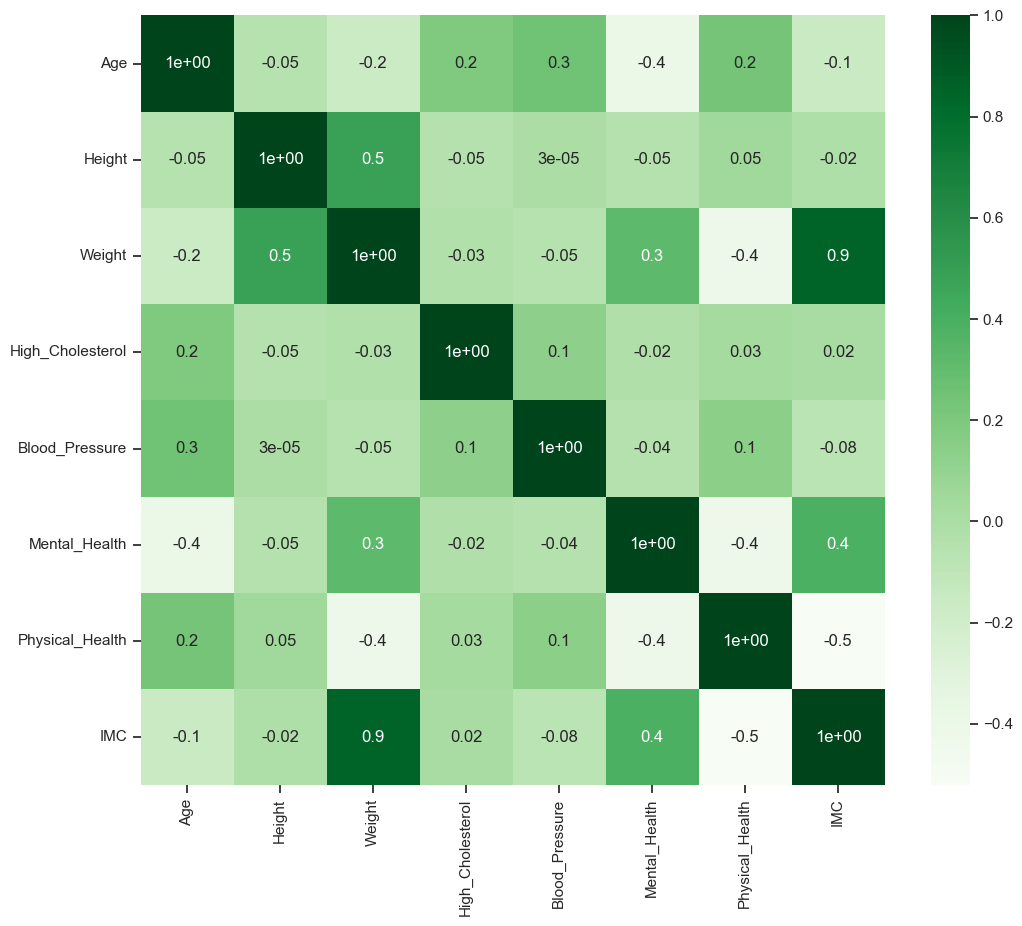

In [102]:
cor_spearman = X_num_scaled.corr(method = 'spearman')
cor_heatmap(cor_spearman)

> Elimination of the variable **Weight** because it is highly correlated with **Height and IMC**

### ANOVA

In [103]:
fvalue_selector = SelectKBest(f_classif, k=5)
# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X_num_scaled, y)

In [104]:
print('Original number of features:', X_num_scaled.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 8
Reduced number of features: 5


In [105]:
# Get columns to keep and create new dataframe with those only
cols = fvalue_selector.get_support(indices=True)
features_to_keep = X_num_scaled.iloc[:,cols]
features_to_keep.columns 

Index(['Age', 'Weight', 'Mental_Health', 'Physical_Health', 'IMC'], dtype='object')

### Gini/Entropy

In [106]:
gini_importance = DecisionTreeClassifier().fit(X_num_scaled, y).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_num_scaled, y).feature_importances_

<AxesSubplot:xlabel='Value', ylabel='Col'>

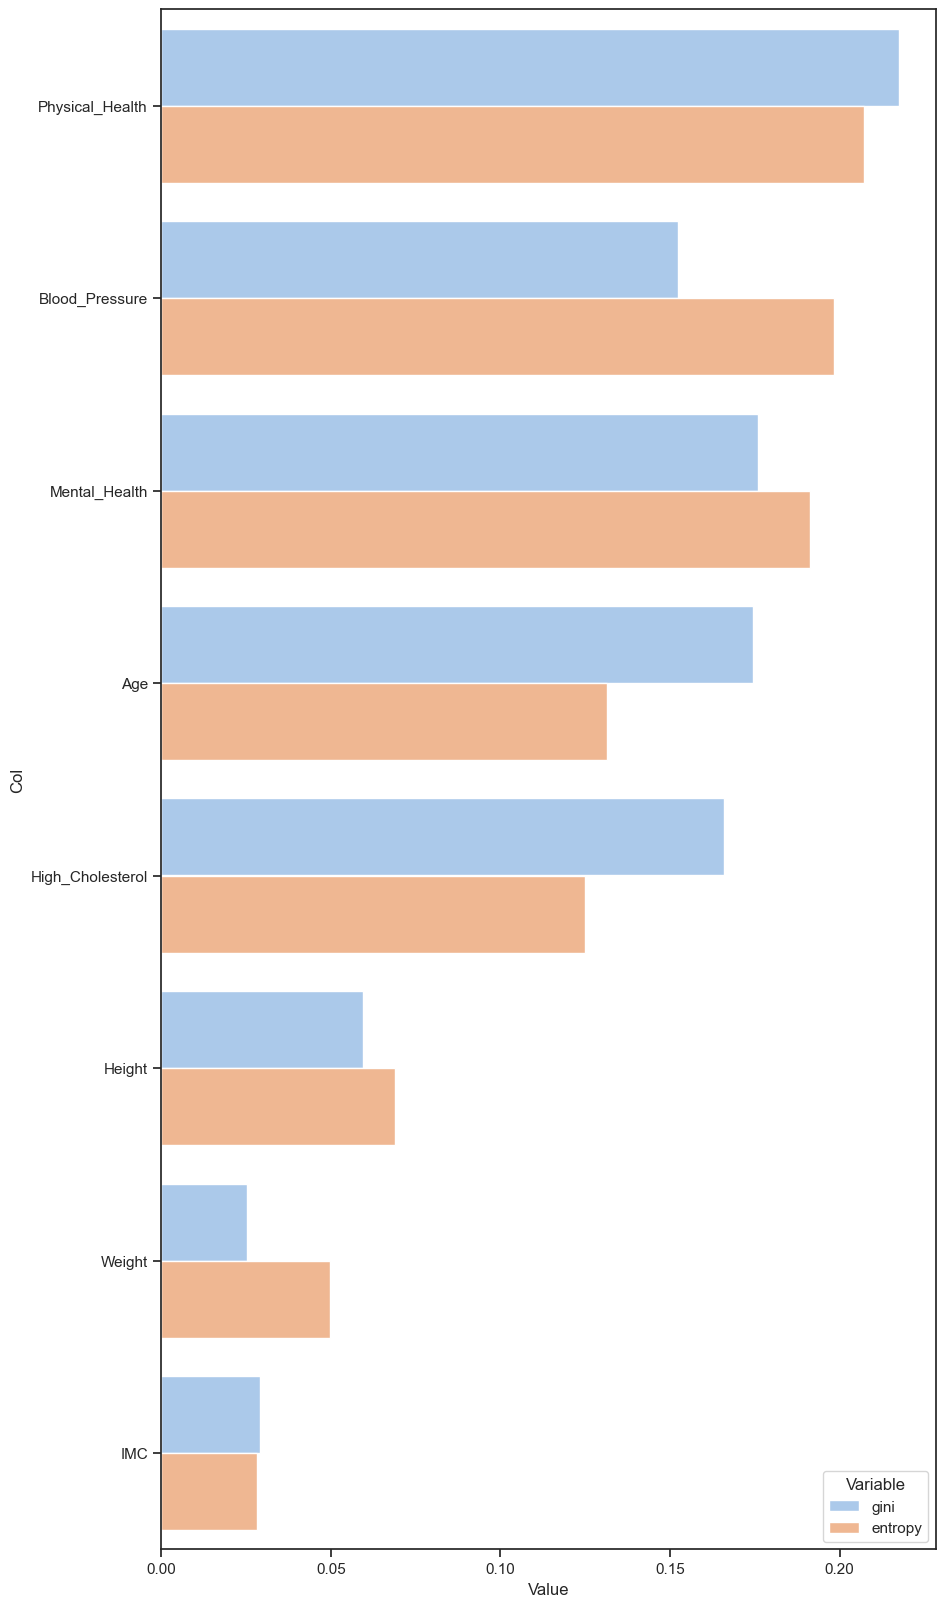

In [107]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_num_scaled.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(10,20))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

> The variables **Weight, Height and IMC** are not relevant for the analyse. 

### Decision Tree Classifier 

[0.13763609 0.08162645 0.07682004 0.11978703 0.11850882 0.1847426
 0.18425307 0.0966259 ]


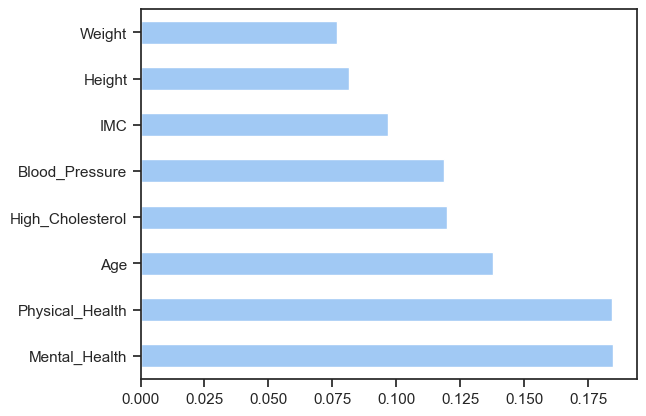

In [108]:
model = ExtraTreesClassifier()
model.fit(X_num_scaled, y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_num_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

> **Weight and Height** are less relevant than the others.

### RFE

In [109]:
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 5)
X_rfe = rfe.fit_transform(X = X_num_scaled, y = y)

In [110]:
selected_features = pd.Series(rfe.support_, index = X_num_scaled.columns)
selected_features

Age                 False
Height               True
Weight              False
High_Cholesterol     True
Blood_Pressure      False
Mental_Health        True
Physical_Health      True
IMC                  True
dtype: bool

In [111]:
nof_list=list(range(1,9))
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in nof_list:
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select = 8)
    X_train_rfe = rfe.fit_transform(X_num_scaled,y)
    #X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y)
    
    score = model.score(X_train_rfe,y)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 2
Score with 2 features: 0.731250


> The optimum number of features is 2:

In [112]:
rfe = RFE(estimator = model, n_features_to_select = 2)
X_rfe = rfe.fit_transform(X = X_num_scaled, y = y)
selected_features = pd.Series(rfe.support_, index = X_num_scaled.columns)
selected_features

Age                 False
Height              False
Weight              False
High_Cholesterol    False
Blood_Pressure      False
Mental_Health        True
Physical_Health      True
IMC                 False
dtype: bool

> Suggest to only keep the **Mental_Health and Physical_Health** variables

### Kendall 

In [113]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Greens, fmt='.1')
    plt.show()

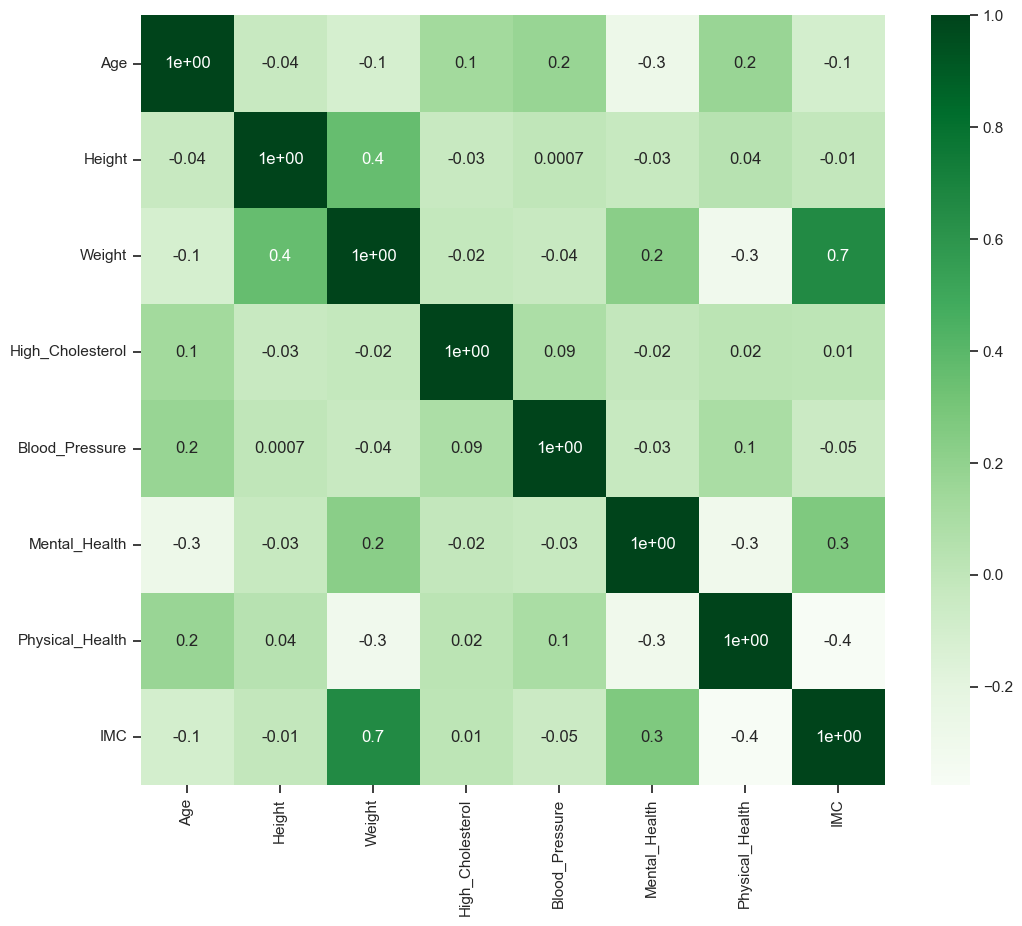

In [114]:
cor_kendall = X_num_scaled.corr(method = 'kendall')
cor_heatmap(cor_kendall)

> Keep all the variables. We are unable to extract valuable information.

###  Ridge Regression

In [115]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [116]:
ridge = RidgeCV()
ridge.fit(X =X_num_scaled, y = y)

RidgeCV()

In [117]:
print("Best alpha using built-in RidgeCV: %f" % ridge.alpha_)
print("Best score using built-in RidgeCV: %f" %ridge.score(X_num_scaled, y))

Best alpha using built-in RidgeCV: 1.000000
Best score using built-in RidgeCV: 0.311213


In [118]:
coef_ridge = pd.Series(ridge.coef_, index = X_num_scaled.columns)
coef_ridge.sort_values()

Physical_Health    -0.795038
High_Cholesterol   -0.281674
Height             -0.206745
Weight             -0.153697
Blood_Pressure     -0.097691
Age                -0.067682
IMC                 0.206375
Mental_Health       0.728318
dtype: float64

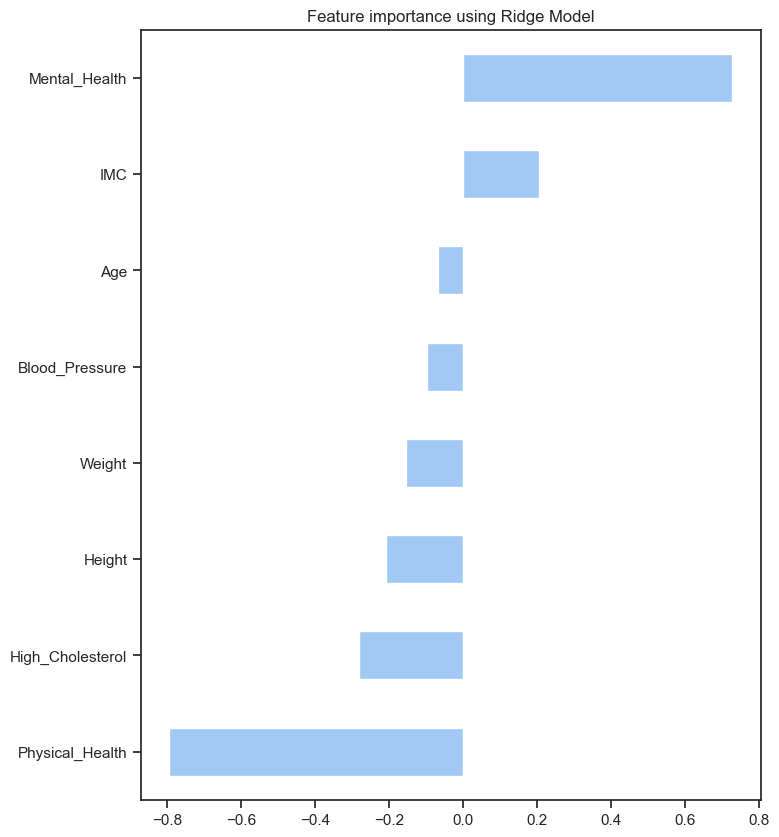

In [119]:
plot_importance(coef_ridge,'Ridge')

> We decided to eliminate the variables with the absolute lowest score: **Age** and **Blood_Pressure**

### Mutal Statics Information

In [120]:
MI = sklearn.feature_selection.mutual_info_classif(X_cat_scaled, y, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)
MI

array([0.04940958, 0.02272003, 0.00085827, 0.        , 0.02785829,
       0.14975595, 0.09649457, 0.13394259, 0.00141899, 0.        ,
       0.01570832, 0.12645367])

In [121]:
X_cat_scaled.columns

Index(['Sex', 'Education', 'Smoking_Habit', 'Water_Habit', 'Drinking_Habit',
       'Fruit_Habit', 'Exercise', 'Checkup', 'Region_Central', 'Region_North',
       'Region_South', 'Diabetes'],
      dtype='object')

> Elimination of the variables **Education, Region_Central** and **Region_North** because the respective values are 0

### Chi Square

In [122]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} - KEEP".format(var)
    else:
        result="{0} - DISCARD".format(var)
    print(result)

In [123]:
for var in X_cat_scaled:
    TestIndependence(X_cat_scaled[var],y, var)

Sex - KEEP
Education - DISCARD
Smoking_Habit - DISCARD
Water_Habit - DISCARD
Drinking_Habit - KEEP
Fruit_Habit - KEEP
Exercise - KEEP
Checkup - KEEP
Region_Central - DISCARD
Region_North - DISCARD
Region_South - DISCARD
Diabetes - KEEP


### Random Forest

In [124]:
## Random Forest Feature Importance
df_smith_scaled.drop('Disease', axis=1, inplace=True)
df_smith_scaled

Sex       Age  Education  Smoking_Habit  Drinking_Habit  Exercise  \
PatientID                                                                      
1167       1.0  0.583333        0.4            0.0             0.0       1.0   
1805       0.0  0.500000        0.4            0.0             0.5       1.0   
1557       0.0  0.395833        0.2            0.0             0.5       0.0   
1658       0.0  0.729167        1.0            0.0             0.0       1.0   
1544       0.0  0.520833        0.8            0.0             0.5       0.0   
...        ...       ...        ...            ...             ...       ...   
1909       0.0  0.437500        0.4            0.0             0.5       1.0   
1386       1.0  0.270833        0.2            0.0             0.0       0.0   
1088       1.0  0.666667        0.2            0.0             0.5       0.0   
1662       0.0  0.375000        0.2            0.0             0.0       0.0   
1117       0.0  0.291667        0.2            0.0             0.5       1.0   

           Fruit_Habit  Water_Habit    Height    Weight  High_Cholesterol  \
PatientID                                                                   
1167              0.00          1.0  0.137931  0.473684          0.783505   
1805              0.00          1.0  0.758621  0.842105          0.343643   
1557              0.00          0.5  0.379310  0.491228          0.329897   
1658              0.00          0.5  1.000000  0.456140          0.628866   
1544              0.25          0.5  1.000000  0.315789          0.505155   
...                ...          ...       ...       ...               ...   
1909              0.00          1.0  0.931034  0.368421          0.254296   
1386              0.00          1.0  0.206897  0.368421          0.285223   
1088              0.50          0.5  0.551724  0.140351          0.487973   
1662              0.00          0.5  0.482759  0.614035          0.268041   
1117              0.00          0.0  0.758621  0.526316          0.175258   

           Blood_Pressure  Mental_Health  Physical_Health   Checkup  Diabetes  \
PatientID                                                                       
1167             0.342105       0.724138         0.066667  0.333333  1.000000   
1805             0.631579       0.310345         0.000000  0.000000  1.000000   
1557             0.368421       0.896552         0.000000  0.333333  1.000000   
1658             0.407895       0.448276         0.266667  0.000000  0.333333   
1544             0.407895       0.620690         0.066667  0.333333  0.333333   
...                   ...            ...              ...       ...       ...   
1909             0.657895       0.413793         0.133333  0.000000  1.000000   
1386             0.342105       0.793103         0.000000  0.333333  0.333333   
1088             0.605263       0.689655         0.566667  0.333333  1.000000   
1662             0.236842       0.551724         0.000000  0.333333  1.000000   
1117             0.342105       0.379310         0.400000  0.000000  1.000000   

           Region_Central  Region_North  Region_South       IMC  
PatientID                                                        
1167                  0.0           0.0           1.0  0.830289  
1805                  0.0           0.0           1.0  0.945205  
1557                  0.0           1.0           0.0  0.679604  
1658                  0.0           0.0           1.0  0.257991  
1544                  0.0           0.0           1.0  0.070015  
...                   ...           ...           ...       ...  
1909                  1.0           0.0           0.0  0.172755  
1386                  0.0           1.0           0.0  0.591324  
1088                  1.0           0.0           0.0  0.017504  
1662                  1.0           0.0           0.0  0.804414  
1117                  0.0           0.0           1.0  0.487823  

[800 rows x 20 columns]

In [125]:
# fit random forest classifier on the training set
selection = SelectFromModel(RandomForestClassifier(n_estimators = 100))
selection.fit(df_smith_scaled, y)

# get_support - Get a mask, or integer index, of the features selected.
selected_feat = df_smith_scaled.columns[(selection.get_support())]

# get_support - Get a mask, or integer index, of the features selected.
selected_feat = df_smith_scaled.columns[(selection.get_support())]

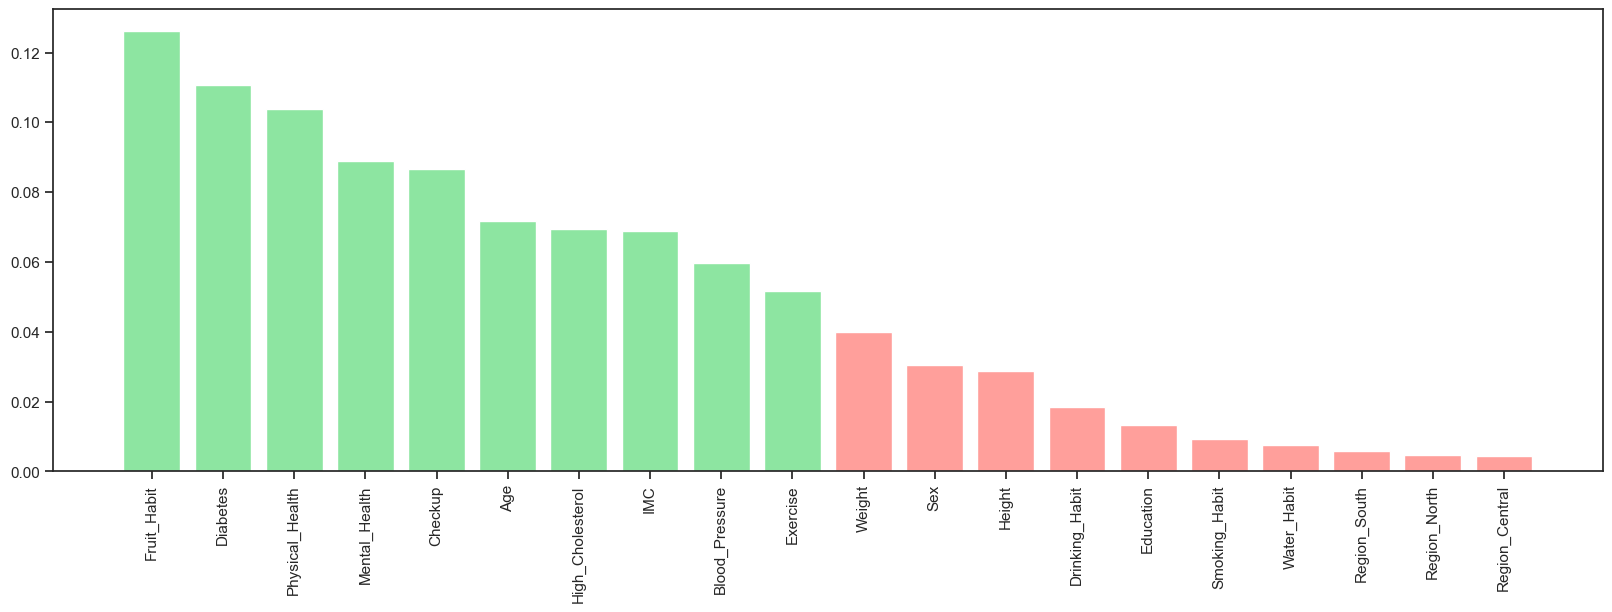

In [126]:
df_fi = pd.DataFrame({'Features': df_smith_scaled.columns, 'Importance': selection.estimator_.feature_importances_})
# Add a column to indicate if the feature is selected
df_fi['Selected'] = df_fi['Features'].isin(selected_feat)
# sort by importance
df_fi.sort_values(by='Importance', ascending=False, inplace=True)
#plot bar chart
plt.figure(figsize=(20, 6))
# color the selected features in green
plt.bar(df_fi['Features'], df_fi['Importance'], color=df_fi['Selected'].map({True: 'g', False: 'r'}))
plt.xticks(rotation=90)
plt.show()

> In this case, we will keep the green variables

## 7. Feature Selection

### Numerical Variables

| Predictor | Spearman | ANOVA  |  Gini/Entropy  |Decision Tree| RFE|Kendall| Ridge | Random Forest |What to do? (One possible way to "solve") |
| --- | --- | --- | --- |--- | --- | ---| --- | ---| ---|
| Age | Keep | Keep | Keep  | Keep|Discard|Keep|Discard|Keep|Try|
| Height | Keep | Discard | Discard |Discard|Discard|Keep|Keep|Discard|Discard
| Weight | Discard | Keep | Discard |Discard |Discard|Keep|Keep|Discard|Discard
| High_Cholesterol | Keep | Discard | Keep | Keep|Discard|Keep|Keep|Keep|Try
| Blood_Pressure | Keep| Discard | Keep | Keep|Discard|Keep|Discard|Keep|Try
| Mental_Health | Keep | Keep | Keep |Keep |Keep|Keep|Keep|Keep|Keep
| Physical_Health | Keep | Keep | Keep | Keep|Keep|Keep|Keep|Keep|Keep
|IMC| Keep | Keep| Discard | Keep|Discard|Keep|Keep|Keep|Try

### Categorical Variables

| Predictor | Chi-Square | Mutual Statistics|Random Forest|What to do? (One possible way to "solve")
| --- | --- | ---|---|---|
| Sex | Keep | Keep | Discard|Keep
| Drinking_Habit | Keep | Keep|Discard|Keep
| Exercise | Keep| Keep |Discard|Keep
| Fruit_Habit | Keep | Keep |Keep|Keep
| Checkup | Keep | Keep|Keep|Keep
| Diabetes | Keep |Keep|Keep|Keep|Keep
| Central Region | Discard| Discard|Discard|Discard
|North Region| Discard| Keep|Discard|Discard
|South Region|Discard|Discard|Discard|Discard
| Education | Discard |Keep|Discard|Discard
| Smoking_Habit | Discard |Discard|Discard|Discard
| Water_Habit | Discard |Discard|Discard|Discard

## 8. Split the Data

> After some tests, these are the variables we decided to keep:

In [127]:
keep_cols = ['Sex', 'Age', 'Exercise', 'Fruit_Habit', 'Mental_Health', 'Physical_Health', 'Checkup', 'Diabetes', 'Drinking_Habit', 'Blood_Pressure','High_Cholesterol']

In [128]:
def processing_data(df, keep_cols):
    # keep_cols - colunas selecionadas do feature selection
    df_proc = df.copy() 
    df_proc.set_index('PatientID', inplace=True)

    mode_Education = df_proc['Education'].mode().loc[0]
    df_proc.fillna(mode_Education, inplace=True)
    
    
    for col in ['Name','Region', 'Education', 'Drinking_Habit', 'Smoking_Habit', 'Exercise', 'Fruit_Habit', 'Water_Habit', 'Checkup', 'Diabetes']:
        df_proc[col] = df_proc[col].str.lower()

    df_proc = processing_age(df_proc)
    df_proc = processing_gender(df_proc)
    df_proc = processing_smoking(df_proc)
    df_proc = processing_exercise(df_proc)
    df_proc["Education"] = convert_education(df_proc)
    df_proc["Water_Habit"] = convert_water_habit(df_proc)
    df_proc["Checkup"] = convert_checkup(df_proc)
    df_proc["Diabetes"] = convert_diabetes(df_proc)
    df_proc["Fruit_Habit"] = convert_fruit_habit(df_proc)
    df_proc["Drinking_Habit"] = convert_drinking_habit(df_proc)
    df_proc = processing_region(df_proc)
    df_proc['Imc'] = processing_imc(df_proc)
    
    
    x = df_proc[keep_cols] # manter apenas as colunas que selecionamos com a feture selection

    # O dataset de test não tem a coluna Disease
    if 'Disease' in df_proc.columns:
        y = df_proc['Disease']
    else:
        y = pd.Series()
    
    return x, y

In [129]:
df_dataset_train = load_data('train')
X, y = processing_data(df_dataset_train, keep_cols)
X.head(2)

Sex  Age  Exercise  Fruit_Habit  Mental_Health  Physical_Health  \
PatientID                                                                    
1167         1   57         1            0             21                2   
1805         0   53         1            0              9                0   

           Checkup  Diabetes  Drinking_Habit  Blood_Pressure  High_Cholesterol  
PatientID                                                                       
1167             1         3               0             120               358  
1805             0         3               1             142               230

### 8.1 Train Test Split

In [130]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 150, shuffle = True)
X_train.head(2)

Sex  Age  Exercise  Fruit_Habit  Mental_Health  Physical_Health  \
PatientID                                                                    
1416         0   54         0            1             18                2   
1829         0   54         1            1              8               10   

           Checkup  Diabetes  Drinking_Habit  Blood_Pressure  High_Cholesterol  
PatientID                                                                       
1416             1         1               1             125               277  
1829             0         3               1             124               270

### 8.2 MinMaxScaler

In [131]:
X_train_scaled = scaling_data(X_train, True)

In [132]:
X_val_scaled = scaling_data(X_val, False)

In [133]:
X_train_scaled

Sex       Age  Exercise  Fruit_Habit  Mental_Health  \
PatientID                                                        
1416       0.0  0.186567       0.0         0.25       0.620690   
1829       0.0  0.186567       1.0         0.25       0.275862   
1866       0.0  0.089552       0.0         0.00       0.827586   
1832       0.0  0.291045       0.0         0.25       0.620690   
1545       0.0  0.141791       0.0         0.00       0.758621   
...        ...       ...       ...          ...            ...   
1929       0.0  0.231343       1.0         0.50       0.448276   
1940       1.0  0.208955       1.0         0.00       0.379310   
1648       1.0  0.313433       0.0         0.00       0.413793   
1853       0.0  0.283582       1.0         0.50       0.448276   
1986       1.0  0.194030       1.0         0.00       0.344828   

           Physical_Health   Checkup  Diabetes  Drinking_Habit  \
PatientID                                                        
1416              0.066667  0.333333  0.333333             0.5   
1829              0.333333  0.000000  1.000000             0.5   
1866              0.000000  0.333333  0.333333             0.0   
1832              0.133333  0.000000  0.333333             0.0   
1545              0.133333  0.000000  0.000000             0.0   
...                    ...       ...       ...             ...   
1929              0.366667  0.000000  1.000000             0.5   
1940              0.000000  0.000000  1.000000             0.0   
1648              0.233333  0.333333  1.000000             0.0   
1853              0.400000  0.000000  1.000000             0.5   
1986              0.533333  0.333333  1.000000             1.0   

           Blood_Pressure  High_Cholesterol  
PatientID                                    
1416             0.292453          0.335616  
1829             0.283019          0.319635  
1866             0.169811          0.283105  
1832             0.226415          0.344749  
1545             0.150943          0.235160  
...                   ...               ...  
1929             0.339623          0.182648  
1940             0.433962          0.262557  
1648             0.169811          0.052511  
1853             0.245283          0.235160  
1986             0.811321          0.458904  

[560 rows x 11 columns]

# 9. Evaluation of models with K-fold

> Aplication of the K-Fold method to the train's dataset in order to select the best parameters of each model

In [134]:
kf = KFold(n_splits=10, random_state=0, shuffle=True)
kf

KFold(n_splits=10, random_state=0, shuffle=True)

In [135]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                    Val                                                    ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [136]:
def avg_score_LR(split_method, X, y, model, verbose=False):
    score_train = []
    score_test = []
    
    f1_scores_train = [] 
    f1_scores_val = [] 
    
    timer = []
    n_iter = []
    
    for train_index, test_index in split_method.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]  #two lines to create the index
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]
        
        # start counting time
        begin = time.perf_counter()
        model = model.fit(X_train, y_train)  #create a model with logistic regression
        # finish counting time
        end = time.perf_counter()
        timer.append(end-begin)
        
        try:
            n_iter.append(model.n_iter_)
        except:
            n_iter.append(0)
        
        value_train = model.score(X_train, y_train)  #score method to check the accuracy?
        value_test = model.score(X_val,y_val)
        score_train.append(value_train)
        score_test.append(value_test)
        
        pred_train = model.predict(X_train)
        f1_scores_train.append(f1_score(pred_train,y_train))
        pred_val = model.predict(X_val)
        f1_scores_val.append(f1_score(pred_val,y_val))
        
        #if verbose:
        #    print('Val Precision: ', precision_score(pred_val,y_val))

    if verbose:
        #print('\nAccuracy:')
        #print('Training mean accuracy for each model:', score_train)
        #print('\nTest mean accuracy for each model:', score_test)
        #print('\nTrain average value:' +  str(round(np.mean(score_train),2)) + '+/-' + str(round(np.std(score_train),2)))
        #print('\nTest average value:' +  str(round(np.mean(score_test),2)) + '+/-' + str(round(np.std(score_test),2)))
        
        plt.figure()
        plt.plot(score_train, label='Train')
        plt.plot(score_test, label='Validation')
        plt.xlabel("CV - Split")
        plt.ylabel("Accuracy")
        plt.title('\nTrain average value:' +  str(round(np.mean(score_train),2)) + '+/-' + str(round(np.std(score_train),2)) +\
                  '\nValidation average value:' +  str(round(np.mean(score_test),2)) + '+/-' + str(round(np.std(score_test),2)))
        plt.legend()
    
    if verbose:
        #print('\nF1-Score:')
        #print('Training F1-Score for each model:', f1_scores_train)
        #print('\nTest F1-Score for each model:', f1_scores_val)
        #print('\nTrain average F1-Score:' +  str(round(np.mean(f1_scores_train),2)) + '+/-' + str(round(np.std(f1_scores_train),2)))
        #print('\nTest average F1-Score:' +  str(round(np.mean(f1_scores_val),2)) + '+/-' + str(round(np.std(f1_scores_val),2)))
        
        plt.figure()
        plt.plot(f1_scores_train, label='Train')
        plt.plot(f1_scores_val, label='Validation')
        plt.xlabel("CV - Split")
        plt.ylabel("F1-Score")
        plt.title('\nTrain average F1-Score:' +  str(round(np.mean(f1_scores_train),2)) + '+/-' + str(round(np.std(f1_scores_train),2)) +\
                  '\nValidation average F1-Score:' +  str(round(np.mean(f1_scores_val),2)) + '+/-' + str(round(np.std(f1_scores_val),2)))
        plt.legend()
    

    #if verbose:
    #   This is only to print the last cross validation iteration
    #    metrics(y_train, pred_train , y_val, pred_val)
    
    avg_train = round(np.mean(f1_scores_train),3)
    std_train = round(np.std(f1_scores_train),2)
    
    avg_val = round(np.mean(f1_scores_val),3)
    std_val = round(np.std(f1_scores_val),2)
    
    avg_time = round(np.mean(timer),3)
    std_time = round(np.std(timer),2)
    
    avg_iter = round(np.mean(n_iter),1)
    std_iter = round(np.std(n_iter),1)
        
    # Returns the train's f1-score mean and the validation's f1-score mean 
    return avg_train, avg_val, avg_time, avg_iter, std_train, std_val, std_time, std_iter

# 10. Models

## 10.1 Testing Models

### Logistic Regression

Time F1-Score Train  F1-Score Val  Iterations
Raw  0.007+/-0.0   0.843+/-0.01  0.826+/-0.04  25.8+/-4.1

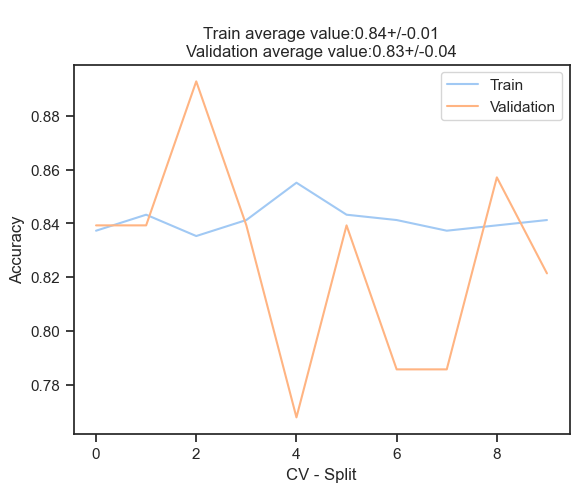

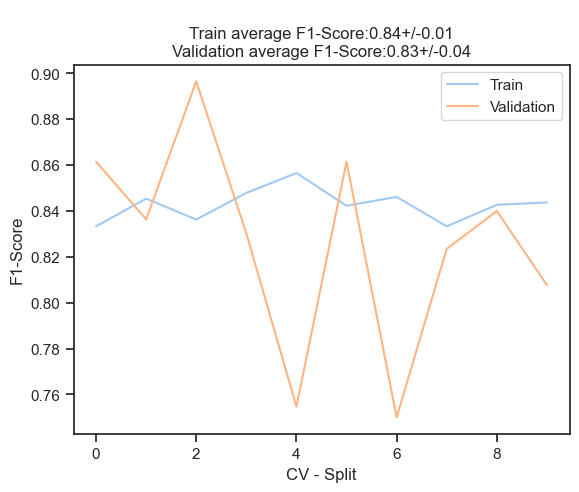

In [137]:
lr = LogisticRegression()
avg_train, avg_val, avg_time, avg_iter, std_train, std_val, std_time, std_iter = avg_score_LR(kf, X_train_scaled, y_train, lr, verbose=True)

df_results = pd.DataFrame(columns = ['Time', 'F1-Score Train', 'F1-Score Val', 'Iterations'], index = ['Raw'])
df_results.iloc[0] = str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
    str(avg_val) + '+/-' + str(std_val), str(avg_iter) + '+/-' + str(std_iter)
display(df_results)

In [138]:
all_penalties = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
 
best_solver=''    
best_penalty=''       
score_list_train =[]
score_list_val =[]
params = []
 
best_avg_time = 0
best_std_time = 0
best_avg_iter = 0
best_std_iter = 0
best_avg_train = 0
best_std_train = 0
best_avg_val = 0
best_std_val = 0
 
for s in solver:
    if s in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag']:
        penalty = ['l2', 'none']
    elif s in ['liblinear']:
        penalty = ['l1', 'l2']
    elif s in ['saga']:
        penalty = ['l1', 'l2', 'none']
 
    for p in penalty:
        print('Penalty: ', p, 'Solver: ', s)
        lr = LogisticRegression(penalty=p, solver=s)
        avg_train, avg_val, avg_time, avg_iter, std_train, std_val, std_time, std_iter = avg_score_LR(kf, X_train_scaled, y_train, lr, verbose=False)
 
        score_list_train.append(avg_train)
        score_list_val.append(avg_val)
 
        params.append(f'{p}, {s}')
        
        if(avg_val>best_avg_val):
            high_score = avg_val
            best_solver = s
            best_penalty = p
            best_avg_time = avg_time
            best_std_time = std_time
            best_avg_iter = avg_iter
            best_std_iter = std_iter
            best_avg_train = avg_train
            best_std_train = std_train
            best_avg_val = avg_val
            best_std_val = std_val

Penalty:  l2 Solver:  newton-cg
Penalty:  none Solver:  newton-cg
Penalty:  l2 Solver:  lbfgs
Penalty:  none Solver:  lbfgs
Penalty:  l1 Solver:  liblinear
Penalty:  l2 Solver:  liblinear
Penalty:  l2 Solver:  sag
Penalty:  none Solver:  sag
Penalty:  l1 Solver:  saga
Penalty:  l2 Solver:  saga
Penalty:  none Solver:  saga


In [139]:
df_results = pd.DataFrame(columns = ['Time', 'F1-Score Train', 'F1-Score Val', 'Iterations'], index = ['Raw'])
df_results.iloc[0] = str(best_avg_time) + '+/-' + str(best_std_time), str(best_avg_train) + '+/-' + str(best_std_train),\
    str(best_avg_val) + '+/-' + str(best_std_val), str(best_avg_iter) + '+/-' + str(best_std_iter)
display(df_results)

Time F1-Score Train  F1-Score Val  Iterations
Raw  0.007+/-0.0   0.845+/-0.01  0.834+/-0.04  33.9+/-4.5

In [140]:
# make a dataframe with the parameters and the scores
df_params = pd.DataFrame({'Parameters': params, 'Train': score_list_train, 'Validation': score_list_val})
# sort the dataframe by the validation score
df_params.sort_values(by='Validation', ascending=False, inplace=True)
df_params

Parameters  Train  Validation
8          l1, saga  0.845       0.834
4     l1, liblinear  0.848       0.833
5     l2, liblinear  0.841       0.833
0     l2, newton-cg  0.843       0.826
2         l2, lbfgs  0.843       0.826
6           l2, sag  0.843       0.826
9          l2, saga  0.843       0.826
1   none, newton-cg  0.845       0.824
3       none, lbfgs  0.845       0.824
7         none, sag  0.845       0.824
10       none, saga  0.845       0.824

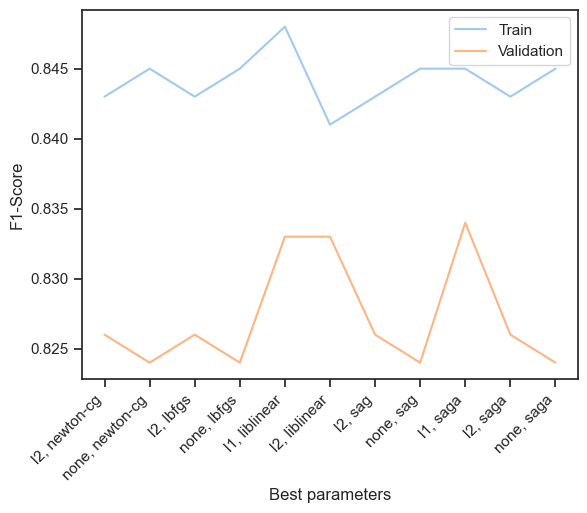

In [141]:
plt.plot(params, score_list_train, label='Train')
plt.plot(params, score_list_val, label='Validation')
plt.xlabel("Best parameters")
plt.ylabel("F1-Score")
# rotate and align the tick labels so they look better
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend();

### Gaussian NB

(0.834, 0.821, 0.003, 0.0, 0.01, 0.05, 0.0, 0.0)

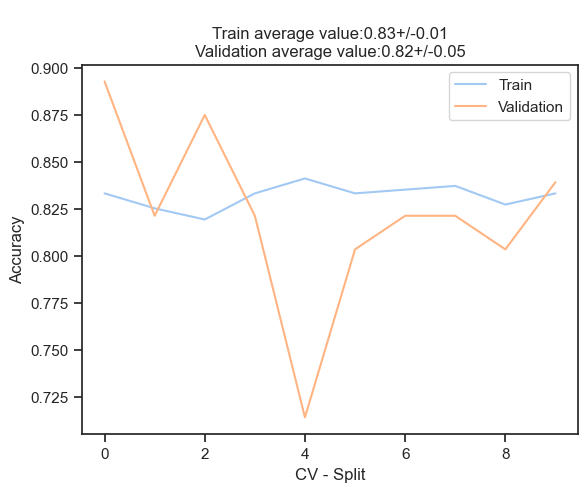

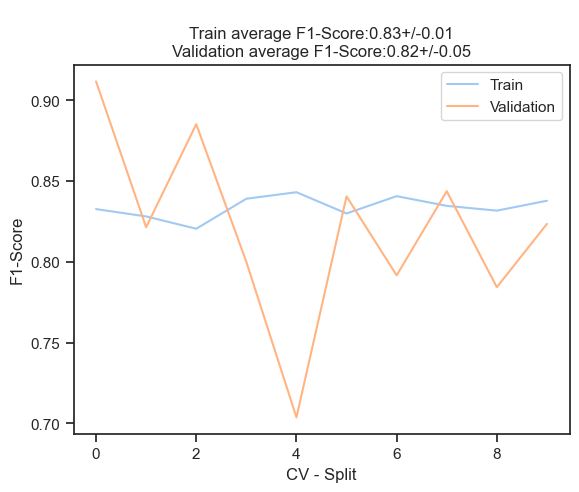

In [142]:
modelNB = GaussianNB(var_smoothing=0.0001)
avg_score_LR(kf, X_train_scaled, y_train, modelNB, verbose=True)

In [143]:
df_results = pd.DataFrame(columns = ['Time', 'F1-Score Train', 'F1-Score Val', 'Iterations'], index = ['Raw'])
df_results.iloc[0] = str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
    str(avg_val) + '+/-' + str(std_val), str(avg_iter) + '+/-' + str(std_iter)
display(df_results)

Time F1-Score Train  F1-Score Val  Iterations
Raw  0.009+/-0.0   0.845+/-0.01  0.824+/-0.05  41.5+/-5.1

### KNN

In [144]:
numberK_list = np.arange(1,50)
weights = ['uniform', 'distance']
algorithm= ['auto', 'ball_tree', 'kd_tree', 'brute']

In [145]:
score_list_train =[]
score_list_val =[]
params = []

best_avg_time = 0
best_std_time = 0
best_avg_iter = 0
best_std_iter = 0
best_avg_train = 0
best_std_train = 0
best_avg_val = 0
best_std_val = 0

for n_nghb in numberK_list:
    for w in weights:
        for a in algorithm:
            modelKNN = KNeighborsClassifier(n_neighbors = n_nghb, weights = w, algorithm = a)
            avg_train, avg_val, avg_time, avg_iter, std_train, std_val, std_time, std_iter = avg_score_LR(kf, X_train_scaled, y_train, modelKNN, verbose=False)

            score_list_train.append(avg_train)
            score_list_val.append(avg_val)

            params.append(f'{n_nghb}, {w}, {a}')

            if(avg_val>best_avg_val):
                high_score = avg_val
                best_avg_time = avg_time
                best_std_time = std_time
                best_avg_iter = avg_iter
                best_std_iter = std_iter
                best_avg_train = avg_train
                best_std_train = std_train
                best_avg_val = avg_val
                best_std_val = std_val

In [146]:
df_results = pd.DataFrame(columns = ['Time', 'F1-Score Train', 'F1-Score Val', 'Iterations'], index = ['Raw'])
df_results.iloc[0] = str(best_avg_time) + '+/-' + str(best_std_time), str(best_avg_train) + '+/-' + str(best_std_train),\
    str(best_avg_val) + '+/-' + str(best_std_val), str(best_avg_iter) + '+/-' + str(best_std_iter)
df_results

Time F1-Score Train  F1-Score Val Iterations
Raw  0.003+/-0.0      1.0+/-0.0  0.971+/-0.02  0.0+/-0.0

In [147]:
# make a dataframe with the parameters and the scores
df_params = pd.DataFrame({'Parameters': params, 'Train': score_list_train, 'Validation': score_list_val})
# sort the dataframe by the validation score
df_params.sort_values(by='Validation', ascending=False, inplace=True)
df_params

Parameters  Train  Validation
391      49, distance, brute  1.000       0.971
375      47, distance, brute  1.000       0.971
364       46, distance, auto  1.000       0.971
365  46, distance, ball_tree  1.000       0.971
366    46, distance, kd_tree  1.000       0.971
..                       ...    ...         ...
288        37, uniform, auto  0.808       0.787
282     36, uniform, kd_tree  0.810       0.785
281   36, uniform, ball_tree  0.810       0.785
280        36, uniform, auto  0.810       0.785
283       36, uniform, brute  0.810       0.785

[392 rows x 3 columns]

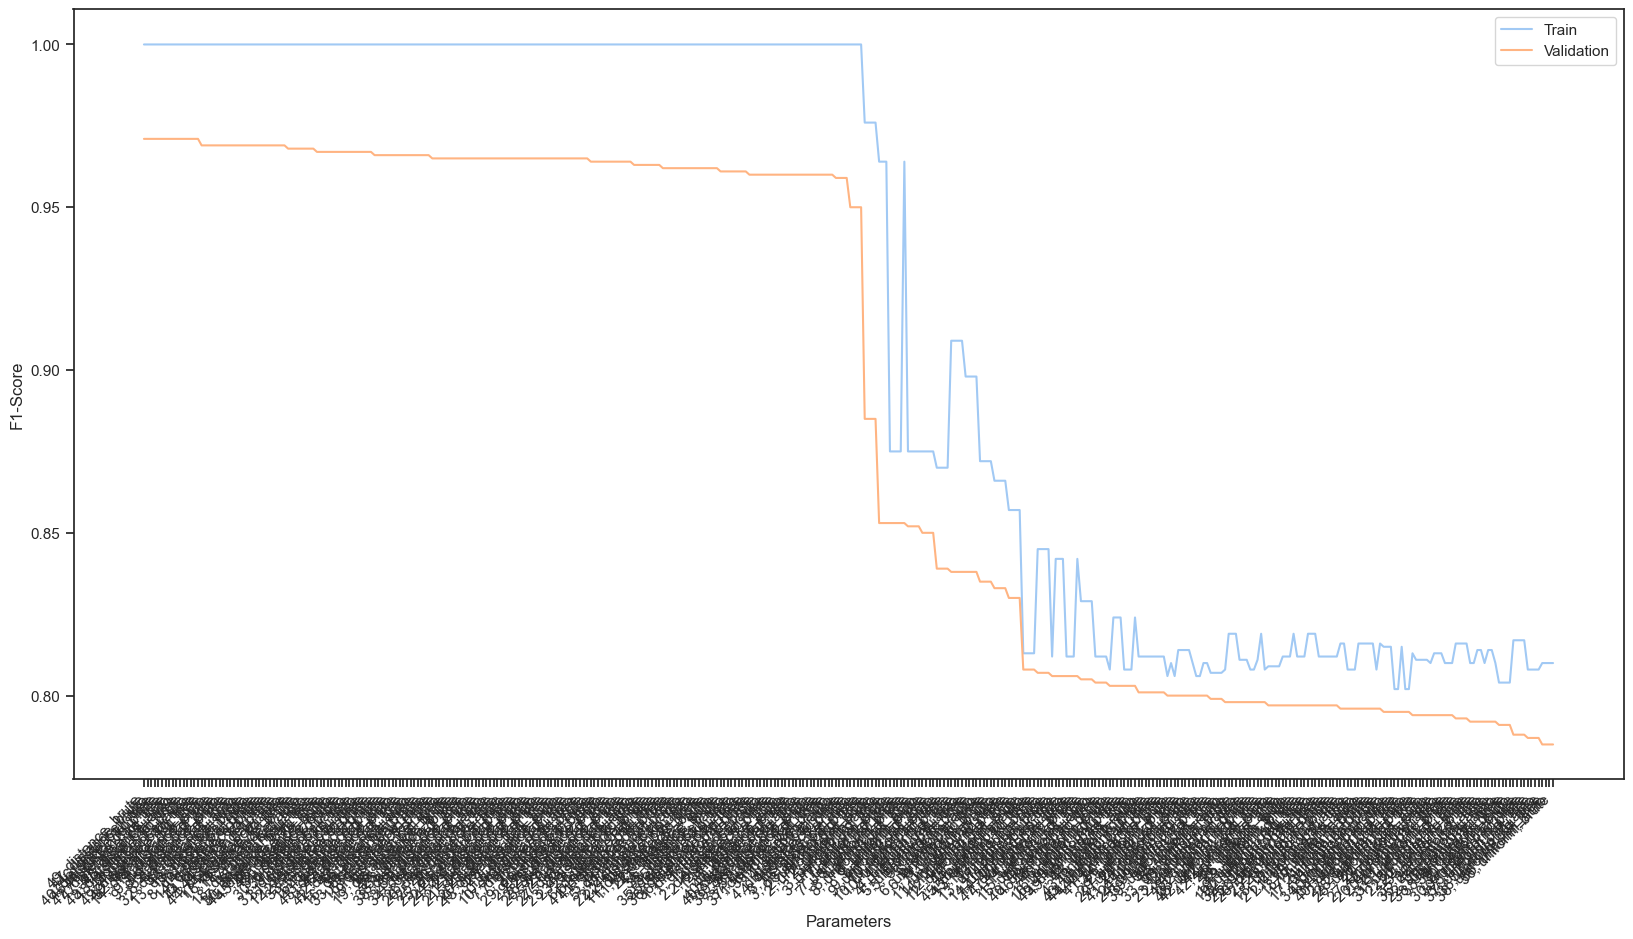

In [148]:
# set image size
plt.figure(figsize=(20, 10))
plt.plot(df_params.Parameters, df_params.Train, label='Train')
plt.plot(df_params.Parameters, df_params.Validation, label='Validation')
plt.xlabel("Parameters")
plt.ylabel("F1-Score")
# rotate and align the tick labels so they look better
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend();

### Neural Networks

In [149]:
h_layer_sizes = [100, 200, 300, 400, 600, 800, 1000, 1500, 2000]
solver = ['lbfgs', 'sgd', 'adam']
activation = ['identity', 'logistic', 'tanh', 'relu']

In [150]:
score_list_train =[]
score_list_val =[]
params = []

best_avg_time = 0
best_std_time = 0
best_avg_iter = 0
best_std_iter = 0
best_avg_train = 0
best_std_train = 0
best_avg_val = 0
best_std_val = 0

for h in h_layer_sizes:
    for a in activation:
        for s in solver:
            mlp = MLPClassifier(hidden_layer_sizes=h, solver=s, activation=a)
            avg_train, avg_val, avg_time, avg_iter, std_train, std_val, std_time, std_iter = avg_score_LR(kf, X_train_scaled, y_train, mlp, verbose=False)

            score_list_train.append(avg_train)
            score_list_val.append(avg_val)

            params.append(f'{h}, {a}, {s}')

            if(avg_val>best_avg_val):
                high_score = avg_val
                best_avg_time = avg_time
                best_std_time = std_time
                best_avg_iter = avg_iter
                best_std_iter = std_iter
                best_avg_train = avg_train
                best_std_train = std_train
                best_avg_val = avg_val
                best_std_val = std_val

In [151]:
df_results = pd.DataFrame(columns = ['Time', 'F1-Score Train', 'F1-Score Val', 'Iterations'], index = ['Raw'])
df_results.iloc[0] = str(best_avg_time) + '+/-' + str(best_std_time), str(best_avg_train) + '+/-' + str(best_std_train),\
    str(best_avg_val) + '+/-' + str(best_std_val), str(best_avg_iter) + '+/-' + str(best_std_iter)
df_results

Time F1-Score Train  F1-Score Val    Iterations
Raw  2.05+/-0.23      1.0+/-0.0  0.971+/-0.01  176.4+/-17.6

In [152]:
# make a dataframe with the parameters and the scores
df_params = pd.DataFrame({'Parameters': params, 'Train': score_list_train, 'Validation': score_list_val})
# sort the dataframe by the validation score
df_params.sort_values(by='Validation', ascending=False, inplace=True)
df_params

Parameters  Train  Validation
30      300, tanh, lbfgs  1.000       0.971
57      600, relu, lbfgs  1.000       0.966
9       100, relu, lbfgs  1.000       0.963
42      400, tanh, lbfgs  1.000       0.963
81     1000, relu, lbfgs  1.000       0.962
..                   ...    ...         ...
52    600, logistic, sgd  0.697       0.684
88   1500, logistic, sgd  0.644       0.629
100  2000, logistic, sgd  0.627       0.623
64    800, logistic, sgd  0.595       0.613
4     100, logistic, sgd  0.581       0.560

[108 rows x 3 columns]

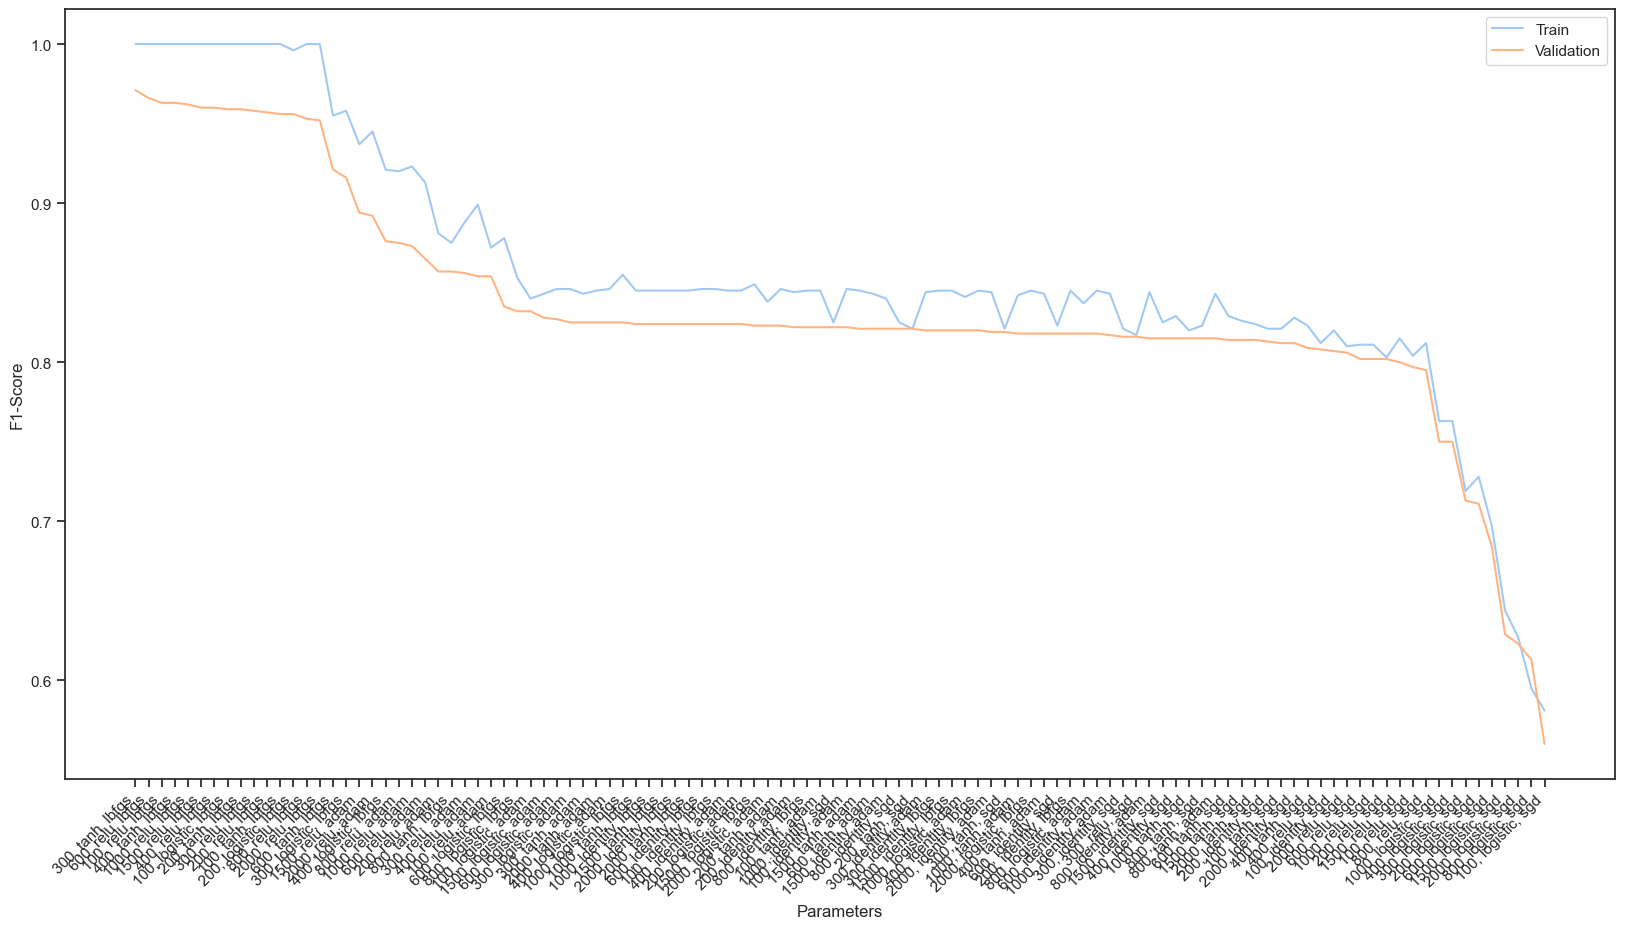

In [153]:
# set image size
plt.figure(figsize=(20, 10))
plt.plot(df_params.Parameters, df_params.Train, label='Train')
plt.plot(df_params.Parameters, df_params.Validation, label='Validation')
plt.xlabel("Parameters")
plt.ylabel("F1-Score")
# rotate and align the tick labels so they look better
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend();

### Decision Trees

In [154]:
max_n_leaf_nodes = np.arange(2,100)
crit = ["gini", "entropy"]
random_state = np.arange(2,100)

In [155]:
score_list_train =[]
score_list_val =[]
params = []

best_avg_time = 0
best_std_time = 0
best_avg_iter = 0
best_std_iter = 0
best_avg_train = 0
best_std_train = 0
best_avg_val = 0
best_std_val = 0

for c in crit:
    for n in max_n_leaf_nodes:
        for r in random_state:
            dt = DecisionTreeClassifier(random_state=r ,max_leaf_nodes=n, criterion=c)
            avg_train, avg_val, avg_time, avg_iter, std_train, std_val, std_time, std_iter = avg_score_LR(kf, X_train_scaled, y_train, dt, verbose=False)

            score_list_train.append(avg_train)
            score_list_val.append(avg_val)

            params.append(f'{c}, {n}, {r}')

            if(avg_val>best_avg_val):
                high_score = avg_val
                best_avg_time = avg_time
                best_std_time = std_time
                best_avg_iter = avg_iter
                best_std_iter = std_iter
                best_avg_train = avg_train
                best_std_train = std_train
                best_avg_val = avg_val
                best_std_val = std_val

In [156]:
df_results = pd.DataFrame(columns = ['Time', 'F1-Score Train', 'F1-Score Val', 'Iterations'], index = ['Raw'])
df_results.iloc[0] = str(best_avg_time) + '+/-' + str(best_std_time), str(best_avg_train) + '+/-' + str(best_std_train),\
    str(best_avg_val) + '+/-' + str(best_std_val), str(best_avg_iter) + '+/-' + str(best_std_iter)
df_results

Time F1-Score Train  F1-Score Val Iterations
Raw  0.004+/-0.0    0.999+/-0.0  0.956+/-0.04  0.0+/-0.0

In [157]:
# make a dataframe with the parameters and the scores
df_params = pd.DataFrame({'Parameters': params, 'Train': score_list_train, 'Validation': score_list_val})
# sort the dataframe by the validation score
df_params.sort_values(by='Validation', ascending=False, inplace=True)
df_params

Parameters  Train  Validation
6842    gini, 71, 82  1.000       0.956
5862    gini, 61, 82  1.000       0.956
7332    gini, 76, 82  1.000       0.956
5274    gini, 55, 82  1.000       0.956
6254    gini, 65, 82  1.000       0.956
...              ...    ...         ...
9633  entropy, 2, 31  0.754       0.709
9632  entropy, 2, 30  0.754       0.709
9631  entropy, 2, 29  0.754       0.709
9630  entropy, 2, 28  0.754       0.709
9604   entropy, 2, 2  0.754       0.709

[19208 rows x 3 columns]

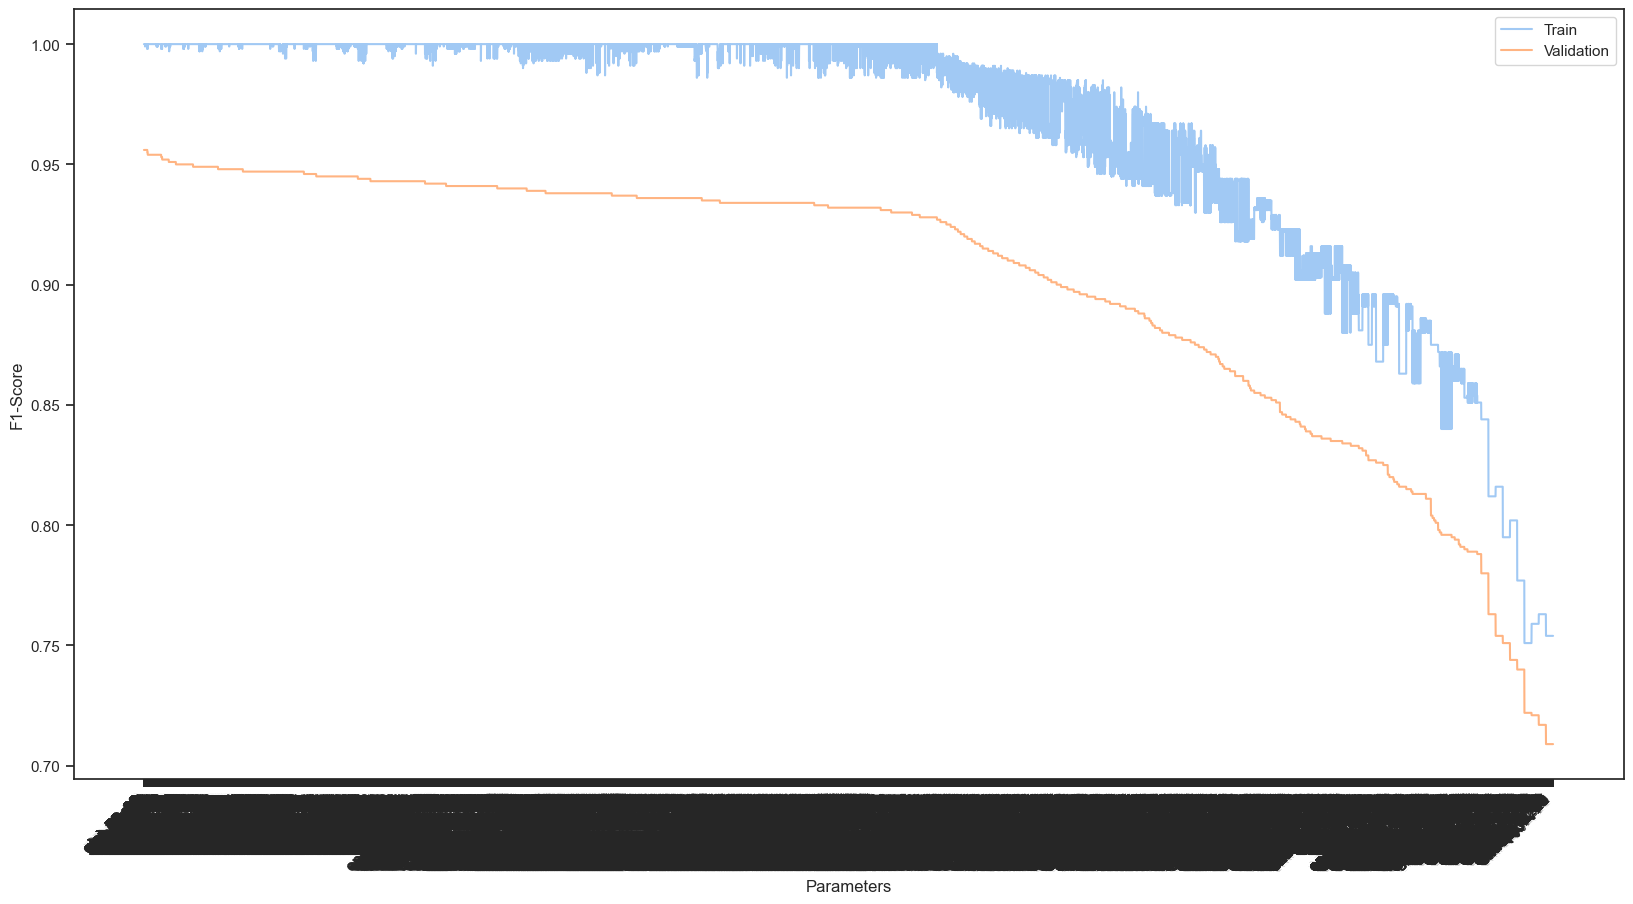

In [158]:
# set image size
plt.figure(figsize=(20, 10))
plt.plot(df_params.Parameters, df_params.Train, label='Train')
plt.plot(df_params.Parameters, df_params.Validation, label='Validation')
plt.xlabel("Parameters")
plt.ylabel("F1-Score")
# rotate and align the tick labels so they look better
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend();

### Random Forest

In [159]:
n_trees_estimators = [1, 25, 50, 75, 100, 200, 300, 400, 500, 600,700,800,900, 1000]
criterions = ['gini', 'entropy']

In [160]:
score_list_train =[]
score_list_val =[]
params = []

best_avg_time = 0
best_std_time = 0
best_avg_iter = 0
best_std_iter = 0
best_avg_train = 0
best_std_train = 0
best_avg_val = 0
best_std_val = 0

for n in n_trees_estimators:
    for c in criterions:
        rf = RandomForestClassifier(random_state=0, n_estimators=n, criterion=c)
        avg_train, avg_val, avg_time, avg_iter, std_train, std_val, std_time, std_iter = avg_score_LR(kf, X_train_scaled, y_train, rf, verbose=False)

        score_list_train.append(avg_train)
        score_list_val.append(avg_val)

        params.append(f'{n}, {c}')
    
        if(avg_val>best_avg_val):
            high_score = avg_val
            best_avg_time = avg_time
            best_std_time = std_time
            best_avg_iter = avg_iter
            best_std_iter = std_iter
            best_avg_train = avg_train
            best_std_train = std_train
            best_avg_val = avg_val
            best_std_val = std_val

In [161]:
df_results = pd.DataFrame(columns = ['Time', 'F1-Score Train', 'F1-Score Val', 'Iterations'], index = ['Raw'])
df_results.iloc[0] = str(best_avg_time) + '+/-' + str(best_std_time), str(best_avg_train) + '+/-' + str(best_std_train),\
    str(best_avg_val) + '+/-' + str(best_std_val), str(best_avg_iter) + '+/-' + str(best_std_iter)
df_results

Time F1-Score Train  F1-Score Val Iterations
Raw  0.143+/-0.0      1.0+/-0.0  0.963+/-0.03  0.0+/-0.0

In [162]:
# make a dataframe with the parameters and the scores
df_params = pd.DataFrame({'Parameters': params, 'Train': score_list_train, 'Validation': score_list_val})
# sort the dataframe by the validation score
df_params.sort_values(by='Validation', ascending=False, inplace=True)
df_params

Parameters  Train  Validation
9    100, entropy  1.000       0.963
18      600, gini  1.000       0.962
22      800, gini  1.000       0.962
4        50, gini  1.000       0.962
5     50, entropy  1.000       0.962
6        75, gini  1.000       0.962
8       100, gini  1.000       0.962
20      700, gini  1.000       0.962
16      500, gini  1.000       0.962
7     75, entropy  1.000       0.961
11   200, entropy  1.000       0.961
12      300, gini  1.000       0.961
13   300, entropy  1.000       0.961
27  1000, entropy  1.000       0.960
15   400, entropy  1.000       0.960
10      200, gini  1.000       0.960
24      900, gini  1.000       0.960
26     1000, gini  1.000       0.960
19   600, entropy  1.000       0.960
3     25, entropy  1.000       0.959
14      400, gini  1.000       0.958
2        25, gini  1.000       0.958
21   700, entropy  1.000       0.957
17   500, entropy  1.000       0.957
23   800, entropy  1.000       0.957
25   900, entropy  1.000       0.957
0         1, gini  0.955       0.898
1      1, entropy  0.954       0.897

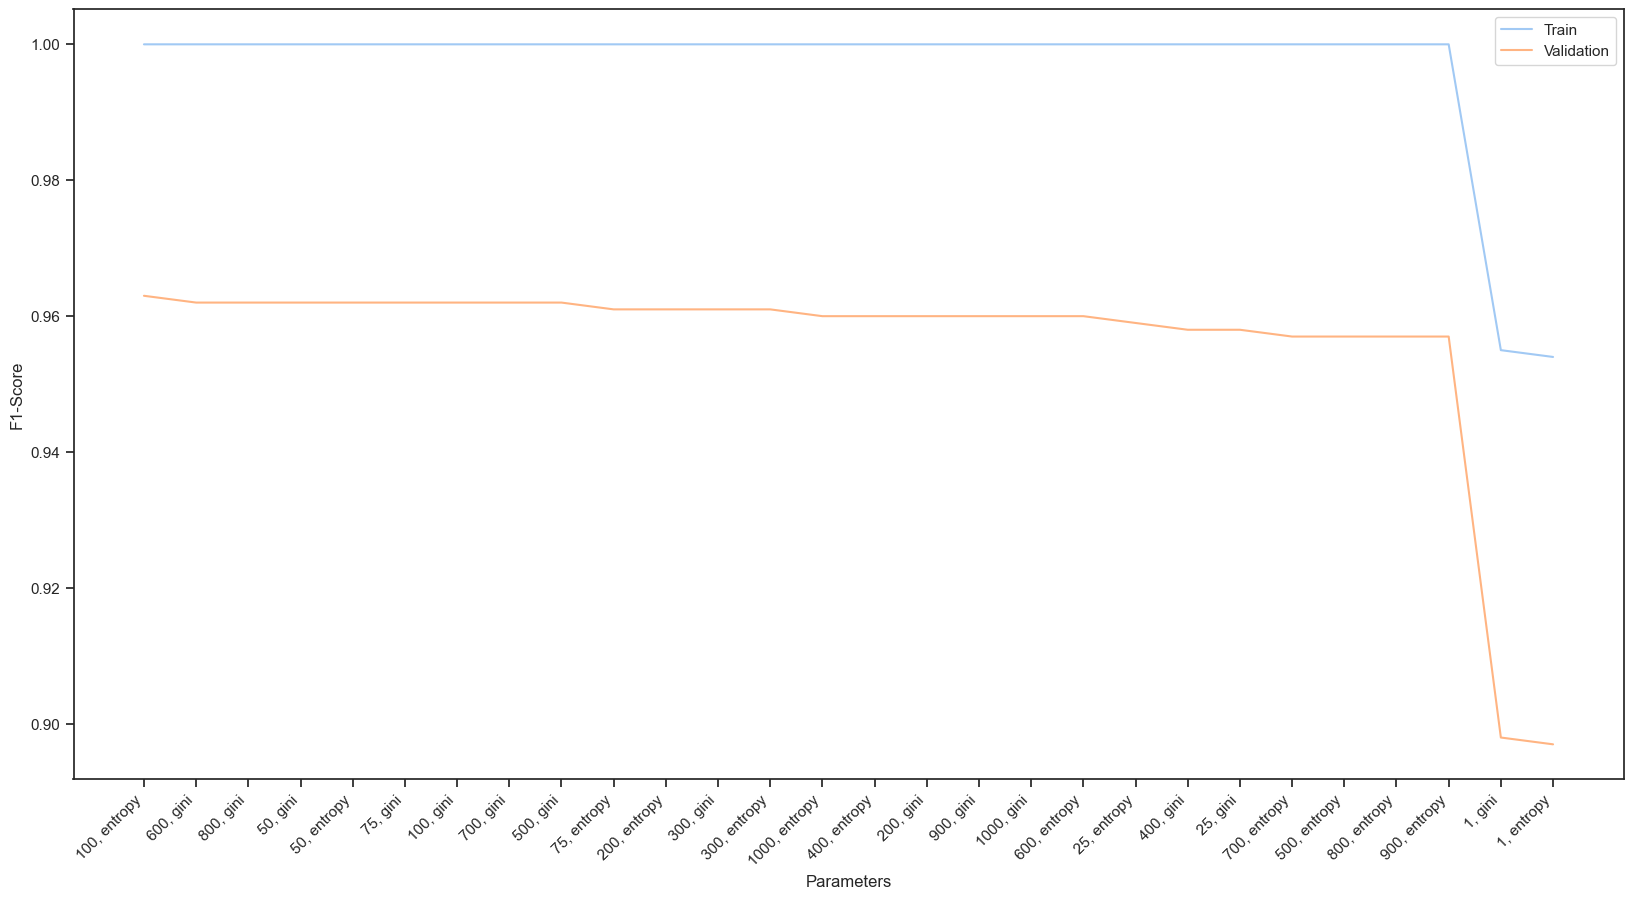

In [163]:
# set image size
plt.figure(figsize=(20, 10))
plt.plot(df_params.Parameters, df_params.Train, label='Train')
plt.plot(df_params.Parameters, df_params.Validation, label='Validation')
plt.xlabel("Parameters")
plt.ylabel("F1-Score")
# rotate and align the tick labels so they look better
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend();

### Gradient Boosting

In [164]:
num_estimators = [10, 25, 50, 75, 100, 200, 300, 400, 500]
criterion=['friedman_mse', 'squared_error']
learning_rate = [0.01, 0.03, 0.05, 0.1, 0.5, 1]
loss=['deviance', 'exponential']

In [165]:
score_list_train =[]
score_list_val =[]
params = []

best_avg_time = 0
best_std_time = 0
best_avg_iter = 0
best_std_iter = 0
best_avg_train = 0
best_std_train = 0
best_avg_val = 0
best_std_val = 0

for n in num_estimators:
    for c in criterion:
        for lo in loss:
            for le in learning_rate:
                gb = GradientBoostingClassifier(n_estimators=n, loss=lo, learning_rate =le, random_state=0, criterion=c)
                avg_train, avg_val, avg_time, avg_iter, std_train, std_val, std_time, std_iter = avg_score_LR(kf, X_train_scaled, y_train, gb, verbose=False)

                score_list_train.append(avg_train)
                score_list_val.append(avg_val)

                params.append(f'{n}, {c}, {lo}, {le}' )

                if(avg_val>best_avg_val):
                    high_score = avg_val
                    best_avg_time = avg_time
                    best_std_time = std_time
                    best_avg_iter = avg_iter
                    best_std_iter = std_iter
                    best_avg_train = avg_train
                    best_std_train = std_train
                    best_avg_val = avg_val
                    best_std_val = std_val

In [166]:
df_results = pd.DataFrame(columns = ['Time', 'F1-Score Train', 'F1-Score Val', 'Iterations'], index = ['Raw'])
df_results.iloc[0] = str(best_avg_time) + '+/-' + str(best_std_time), str(best_avg_train) + '+/-' + str(best_std_train),\
    str(best_avg_val) + '+/-' + str(best_std_val), str(best_avg_iter) + '+/-' + str(best_std_iter)
df_results

Time F1-Score Train  F1-Score Val Iterations
Raw  0.087+/-0.01      1.0+/-0.0  0.966+/-0.02  0.0+/-0.0

In [167]:
# make a dataframe with the parameters and the scores
df_params = pd.DataFrame({'Parameters': params, 'Train': score_list_train, 'Validation': score_list_val})
# sort the dataframe by the validation score
df_params.sort_values(by='Validation', ascending=False, inplace=True)
df_params

Parameters  Train  Validation
76        75, friedman_mse, deviance, 0.5  1.000       0.966
88       75, squared_error, deviance, 0.5  1.000       0.966
64       50, squared_error, deviance, 0.5  1.000       0.964
52        50, friedman_mse, deviance, 0.5  1.000       0.964
159     300, squared_error, deviance, 0.1  1.000       0.962
..                                    ...    ...         ...
7     10, friedman_mse, exponential, 0.03  0.876       0.841
12      10, squared_error, deviance, 0.01  0.865       0.827
0        10, friedman_mse, deviance, 0.01  0.865       0.827
18   10, squared_error, exponential, 0.01  0.865       0.825
6     10, friedman_mse, exponential, 0.01  0.865       0.825

[216 rows x 3 columns]

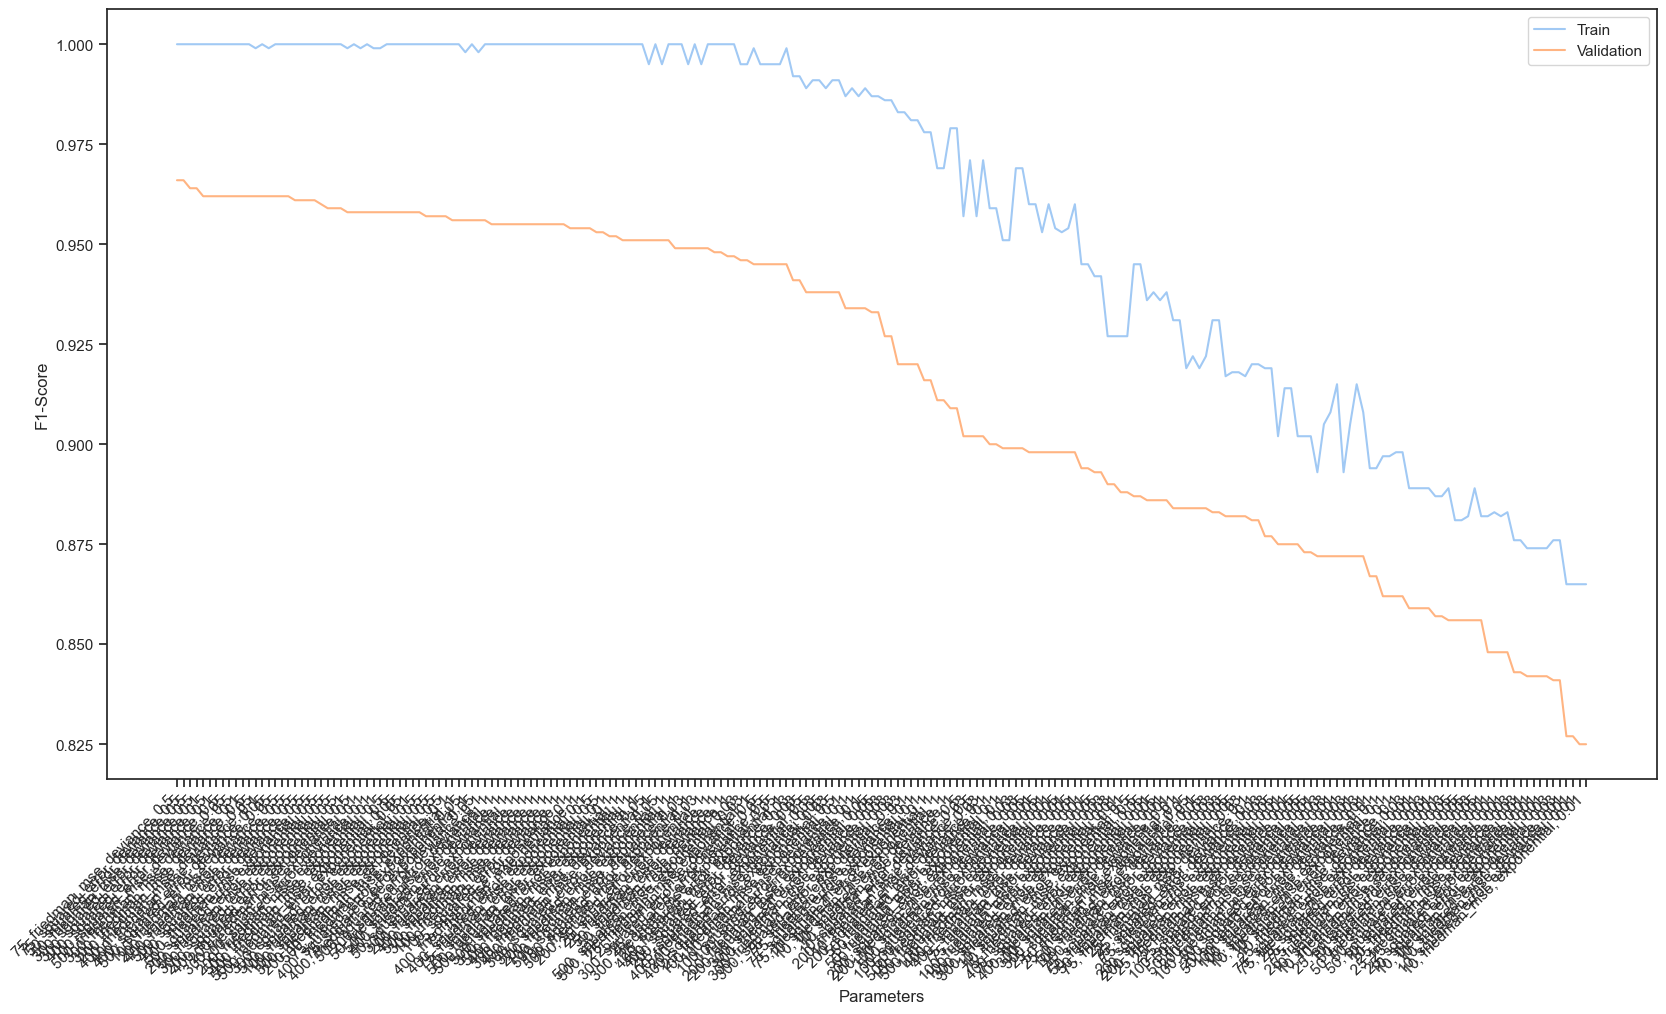

In [168]:
# set image size
plt.figure(figsize=(20, 10))
plt.plot(df_params.Parameters, df_params.Train, label='Train')
plt.plot(df_params.Parameters, df_params.Validation, label='Validation')
plt.xlabel("Parameters")
plt.ylabel("F1-Score")
# rotate and align the tick labels so they look better
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend();

### Support Vector Machines

In [169]:
type_kernel = ['linear', 'poly', 'rbf', 'sigmoid']

In [170]:
high_score=0
high_score_train=0
param=0           
score_list_train =[]
score_list_val =[]

i = 0
for k in type_kernel:
    svm = SVC(kernel=k, gamma='auto')
    avg_f1_score_train, avg_f1_score_val, avg_time, avg_iter, std_train, std_val, std_time, std_iter = avg_score_LR(kf, X_train_scaled, y_train, svm, verbose=False)
    score_list_train.append(avg_f1_score_train)
    score_list_val.append(avg_f1_score_val)
    
    if(avg_f1_score_val>high_score):
        high_score = avg_f1_score_val
        high_score_train = avg_f1_score_train
        param = type_kernel[i]
        
    i += 1
        
print("Type of kernel: %s" %param)
print("Mean f1-score in train with %s: %f" % (param, high_score_train))
print("Mean f1-score in validation with %s: %f" % (param, high_score))

Type of kernel: linear
Mean f1-score in train with linear: 0.847000
Mean f1-score in validation with linear: 0.831000


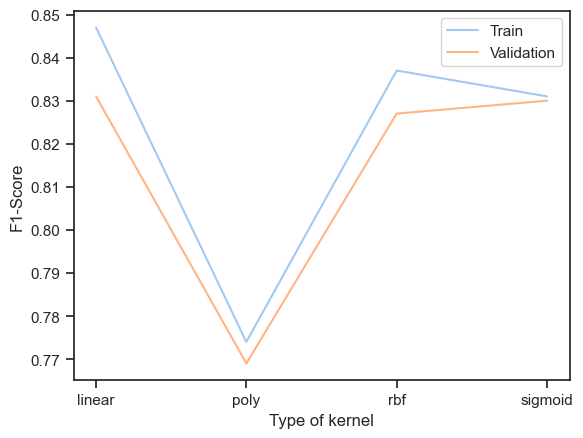

In [171]:
plt.plot(type_kernel, score_list_train, label='Train')
plt.plot(type_kernel, score_list_val, label='Validation')
plt.xlabel("Type of kernel")
plt.ylabel("F1-Score")
plt.legend();

### AdaBoost

In [172]:
n_estimators = [300, 400, 500, 600, 700, 900, 1100]
learning_rate = [0.01, 0.03, 0.05, 0.1, 0.5, 1]

In [173]:
score_list_train =[]
score_list_val =[]
params = []

best_avg_time = 0
best_std_time = 0
best_avg_iter = 0
best_std_iter = 0
best_avg_train = 0
best_std_train = 0
best_avg_val = 0
best_std_val = 0

for n in num_estimators:
    for l in learning_rate:
        aboost = AdaBoostClassifier(n_estimators=n, learning_rate =l, random_state=0)
        avg_train, avg_val, avg_time, avg_iter, std_train, std_val, std_time, std_iter = avg_score_LR(kf, X_train_scaled, y_train, aboost, verbose=False)

        score_list_train.append(avg_train)
        score_list_val.append(avg_val)

        params.append(f'{n}, {l}, {a}')

        if(avg_val>best_avg_val):
            high_score = avg_val
            best_avg_time = avg_time
            best_std_time = std_time
            best_avg_iter = avg_iter
            best_std_iter = std_iter
            best_avg_train = avg_train
            best_std_train = std_train
            best_avg_val = avg_val
            best_std_val = std_val

In [174]:
df_results = pd.DataFrame(columns = ['Time', 'F1-Score Train', 'F1-Score Val', 'Iterations'], index = ['Raw'])
df_results.iloc[0] = str(best_avg_time) + '+/-' + str(best_std_time), str(best_avg_train) + '+/-' + str(best_std_train),\
    str(best_avg_val) + '+/-' + str(best_std_val), str(best_avg_iter) + '+/-' + str(best_std_iter)
df_results

Time F1-Score Train  F1-Score Val Iterations
Raw  0.744+/-0.07      1.0+/-0.0  0.955+/-0.02  0.0+/-0.0

In [175]:
# make a dataframe with the parameters and the scores
df_params = pd.DataFrame({'Parameters': params, 'Train': score_list_train, 'Validation': score_list_val})
# sort the dataframe by the validation score
df_params.sort_values(by='Validation', ascending=False, inplace=True)
df_params

Parameters  Train  Validation
53     500, 1, relu  1.000       0.955
47     400, 1, relu  0.999       0.951
41     300, 1, relu  0.994       0.937
35     200, 1, relu  0.979       0.930
52   500, 0.5, relu  0.973       0.924
46   400, 0.5, relu  0.968       0.911
29     100, 1, relu  0.960       0.911
23      75, 1, relu  0.950       0.907
40   300, 0.5, relu  0.954       0.900
17      50, 1, relu  0.933       0.896
34   200, 0.5, relu  0.942       0.894
51   500, 0.1, relu  0.917       0.887
28   100, 0.5, relu  0.920       0.874
11      25, 1, relu  0.901       0.872
45   400, 0.1, relu  0.915       0.871
22    75, 0.5, relu  0.915       0.865
16    50, 0.5, relu  0.905       0.864
50  500, 0.05, relu  0.902       0.863
39   300, 0.1, relu  0.908       0.862
31  200, 0.03, relu  0.875       0.859
10    25, 0.5, relu  0.883       0.856
44  400, 0.05, relu  0.895       0.856
4     10, 0.5, relu  0.875       0.855
33   200, 0.1, relu  0.896       0.855
48  500, 0.01, relu  0.873       0.853
49  500, 0.03, relu  0.887       0.852
26  100, 0.05, relu  0.870       0.852
37  300, 0.03, relu  0.876       0.852
38  300, 0.05, relu  0.886       0.852
21    75, 0.1, relu  0.875       0.851
42  400, 0.01, relu  0.870       0.851
20   75, 0.05, relu  0.868       0.850
15    50, 0.1, relu  0.870       0.849
14   50, 0.05, relu  0.861       0.848
43  400, 0.03, relu  0.879       0.847
32  200, 0.05, relu  0.877       0.847
36  300, 0.01, relu  0.863       0.847
27   100, 0.1, relu  0.876       0.846
9     25, 0.1, relu  0.861       0.846
25  100, 0.03, relu  0.863       0.845
30  200, 0.01, relu  0.856       0.844
24  100, 0.01, relu  0.852       0.844
19   75, 0.03, relu  0.857       0.843
13   50, 0.03, relu  0.852       0.840
3     10, 0.1, relu  0.852       0.840
18   75, 0.01, relu  0.847       0.837
7    25, 0.03, relu  0.848       0.837
8    25, 0.05, relu  0.851       0.836
5       10, 1, relu  0.861       0.834
2    10, 0.05, relu  0.838       0.821
12   50, 0.01, relu  0.837       0.815
1    10, 0.03, relu  0.813       0.782
6    25, 0.01, relu  0.807       0.779
0    10, 0.01, relu  0.775       0.727

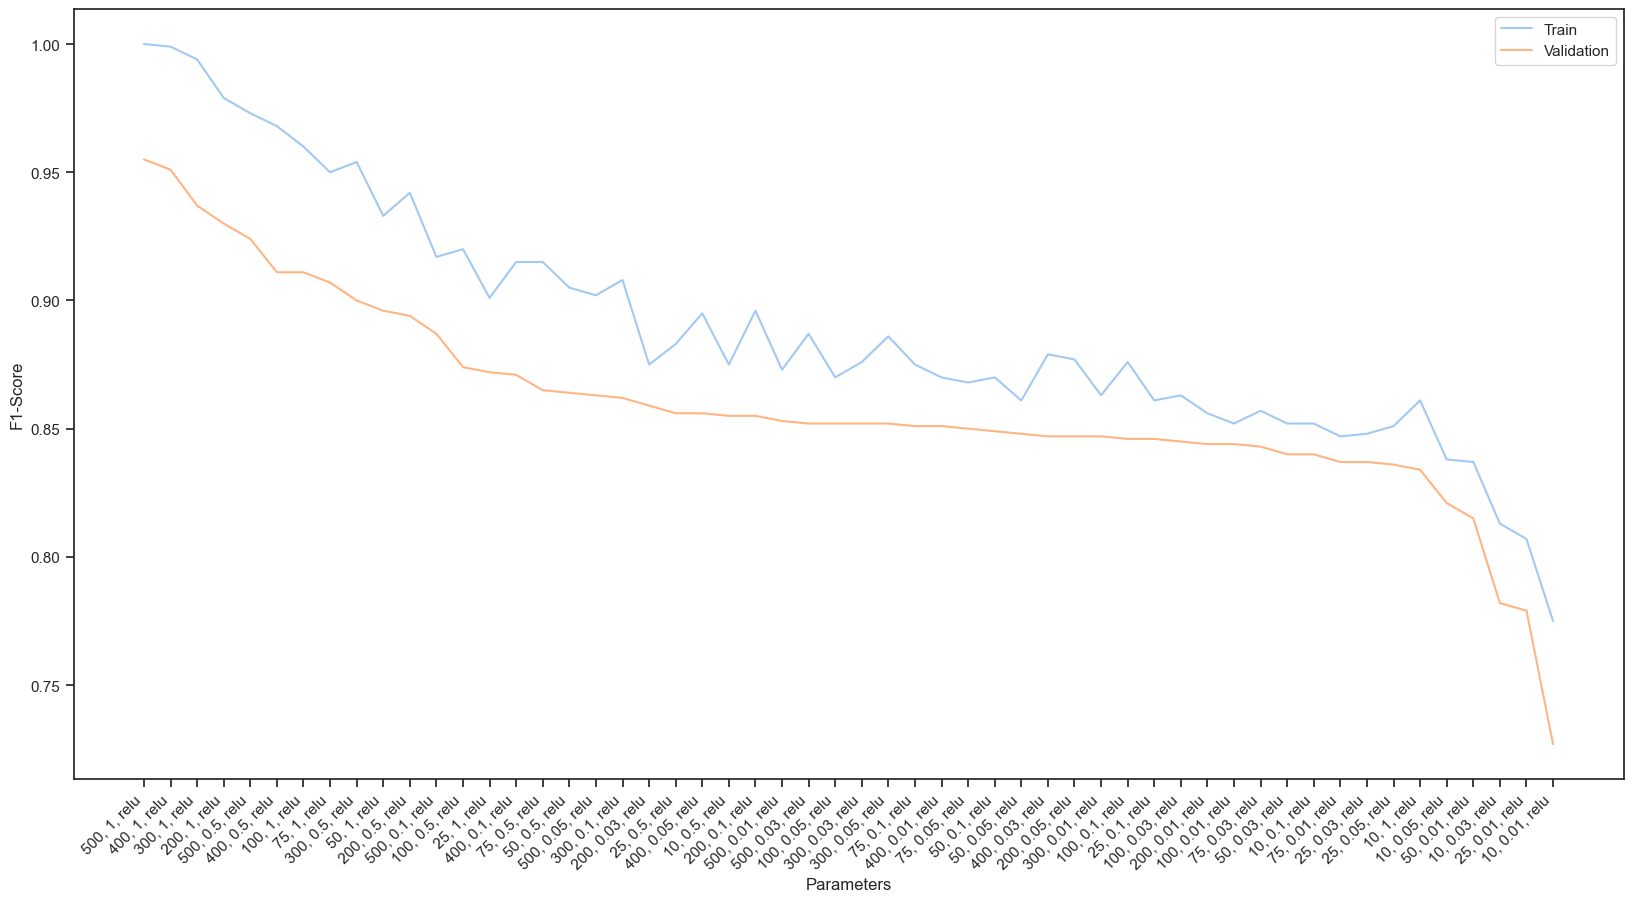

In [176]:
# set image size
plt.figure(figsize=(20, 10))
plt.plot(df_params.Parameters, df_params.Train, label='Train')
plt.plot(df_params.Parameters, df_params.Validation, label='Validation')
plt.xlabel("Parameters")
plt.ylabel("F1-Score")
# rotate and align the tick labels so they look better
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend();

### XGBoost

In [177]:
n_estimators = [10, 20, 30, 50, 100, 200]

In [178]:
high_score=0
high_score_train=0
param=0           
score_list_train =[]
score_list_val =[]

i = 0
for n in n_estimators:
    xgboost = XGBClassifier(n_estimators=n, random_state=0, objective='binary:logistic')
    avg_f1_score_train, avg_f1_score_val, avg_time, avg_iter, std_train, std_val, std_time, std_iter = avg_score_LR(kf, X_train_scaled, y_train, xgboost, verbose=False)
    score_list_train.append(avg_f1_score_train)
    score_list_val.append(avg_f1_score_val)
    
    if(avg_f1_score_val>high_score):
        high_score = avg_f1_score_val
        high_score_train = avg_f1_score_train
        param = n_estimators[i]
        
    i += 1
        
print("N estimators: %s" %param)
print("Mean f1-score in train with %s: %f" % (param, high_score_train))
print("Mean f1-score in validation with %s: %f" % (param, high_score))

N estimators: 100
Mean f1-score in train with 100: 1.000000
Mean f1-score in validation with 100: 0.960000


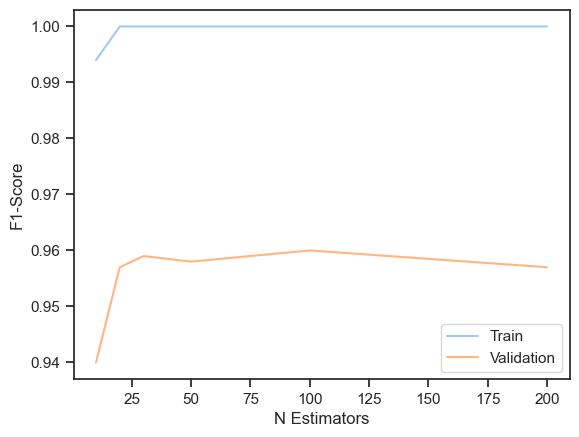

In [179]:
plt.plot(n_estimators, score_list_train, label='Train')
plt.plot(n_estimators, score_list_val, label='Validation')
plt.xlabel("N Estimators")
plt.ylabel("F1-Score")
plt.legend();

#### Changing learning rates

In [180]:
learning_rates = [0.01, 0.03, 0.05, 0.1, 0.5, 1]

In [181]:
high_score=0
high_score_train=0
param=0           
score_list_train =[]
score_list_val =[]

i = 0
for n in learning_rates:
    xgboost = XGBClassifier(learning_rate=n, random_state=0, objective='binary:logistic')
    avg_f1_score_train, avg_f1_score_val, avg_time, avg_iter, std_train, std_val, std_time, std_iter = avg_score_LR(kf, X_train_scaled, y_train, xgboost, verbose=False)
    score_list_train.append(avg_f1_score_train)
    score_list_val.append(avg_f1_score_val)
    
    if(avg_f1_score_val>high_score):
        high_score = avg_f1_score_val
        high_score_train = avg_f1_score_train
        param = learning_rates[i]
        
    i += 1
        
print("Learning rates: %s" %param)
print("Mean f1-score in train with %s: %f" % (param, high_score_train))
print("Mean f1-score in validation with %s: %f" % (param, high_score))

Learning rates: 0.1
Mean f1-score in train with 0.1: 1.000000
Mean f1-score in validation with 0.1: 0.959000


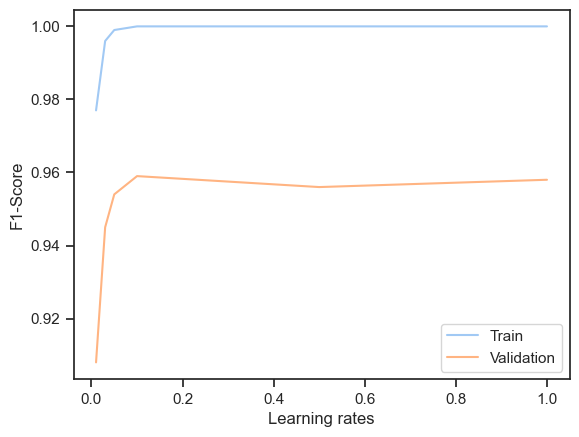

In [182]:
plt.plot(learning_rates, score_list_train, label='Train')
plt.plot(learning_rates, score_list_val, label='Validation')
plt.xlabel("Learning rates")
plt.ylabel("F1-Score")
plt.legend();

### Stacking Classifier

In [183]:
estimators = [
    ('rf', RandomForestClassifier(random_state=0, n_estimators=100, criterion='entropy')),
    ('knn', KNeighborsClassifier(n_neighbors=1, weights='distance')),
    #...
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

avg_train, avg_val, avg_time, avg_iter, std_train, std_val, std_time, std_iter = avg_score_LR(kf, X_train_scaled, y_train, clf, verbose=False)

df_results = pd.DataFrame(columns = ['Time', 'F1-Score Train', 'F1-Score Val', 'Iterations'], index = ['Raw'])
df_results.iloc[0] = str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
    str(avg_val) + '+/-' + str(std_val), str(avg_iter) + '+/-' + str(std_iter)
df_results

Time F1-Score Train  F1-Score Val Iterations
Raw  1.004+/-0.04      1.0+/-0.0  0.967+/-0.02  0.0+/-0.0

## 10.2 Assessment

> This table is useful to select the best parameters for each model

#### Select the best parameters

| Modelo | Parâmetro | Score
| --- | --- | ---|
| LogisticRegression | I1 and saga | 0.834
| GaussianNB | 0.0001 | 0.824
| KNN | 49, distance, brute | 0,971
| NeuralNetworks | 100, logistic, lbfgs | 0.964
| DecisionTrees | gini, 71, 82 | 0,956
| RandomForest | 100, entropy | 0,963
| GradientBoosting | 75, friedman_mse, deviance, 0.5 | 0.966
|SVM| linear | 0.831
|AdaBoost | 500, 1, relu | 0.955
|XGBoost | 100 | 0.96
Stacking Classifier | knn, rf & lr  | 0.967

## 10.3 Train versus Validation

> In this part we will optimize the models, testing them with the optimal parameter, selected from the table above, in order to find the scoring model for the validation.

In [184]:
def train_validation(X_train, X_val, y_train, y_val, model, verbose=False):

    model = model.fit(X_train, y_train) 
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    
    f1_score_train = f1_score(pred_train,y_train)
    f1_score_val = f1_score(pred_val,y_val)
    
    if verbose:
        print('Val Precision: ', precision_score(pred_train, y_train))
    
    if verbose:
        print('\nF1-Score:')
        print('Training F1-Score:', f1_score_train)
        print('\nVal F1-Score:', f1_score_val)

    if verbose:
        metrics(y_train, pred_train , y_val, pred_val)

**Logistic**

In [185]:
lr = LogisticRegression(solver='saga', penalty='l1')
train_validation(X_train_scaled, X_val_scaled, y_train, y_val, lr, verbose=True)

Val Precision:  0.8469750889679716

F1-Score:
Training F1-Score: 0.8424778761061947

Val F1-Score: 0.8300395256916996
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       279
           1       0.84      0.85      0.84       281

    accuracy                           0.84       560
   macro avg       0.84      0.84      0.84       560
weighted avg       0.84      0.84      0.84       560

[[233  46]
 [ 43 238]]
___________________________________________________________________________________________________________
                                                    Val                                             

**GuassianNB**

In [186]:
modelNB = GaussianNB(var_smoothing=0.0001)
train_validation(X_train_scaled, X_val_scaled, y_train, y_val, modelNB, verbose=True)

Val Precision:  0.8362989323843416

F1-Score:
Training F1-Score: 0.8333333333333334

Val F1-Score: 0.816
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       279
           1       0.83      0.84      0.83       281

    accuracy                           0.83       560
   macro avg       0.83      0.83      0.83       560
weighted avg       0.83      0.83      0.83       560

[[231  48]
 [ 46 235]]
___________________________________________________________________________________________________________
                                                    Val                                                    
-----

**KNN**

In [187]:
modelKNN = KNeighborsClassifier(n_neighbors = 49, weights = 'distance', algorithm = 'brute')
train_validation(X_train_scaled, X_val_scaled, y_train, y_val, modelKNN, verbose=True)

Val Precision:  1.0

F1-Score:
Training F1-Score: 1.0

Val F1-Score: 0.9501915708812262
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00       281

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560

[[279   0]
 [  0 281]]
___________________________________________________________________________________________________________
                                                    Val                                                    
----------------------

**Neural Network**

In [188]:
mlp = MLPClassifier(hidden_layer_sizes=100, solver='lbfgs', activation='logistic')
train_validation(X_train_scaled, X_val_scaled, y_train, y_val, mlp, verbose=True)

Val Precision:  1.0

F1-Score:
Training F1-Score: 1.0

Val F1-Score: 0.9772727272727273
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00       281

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560

[[279   0]
 [  0 281]]
___________________________________________________________________________________________________________
                                                    Val                                                    
----------------------

**Decision Trees**

In [189]:
dt = DecisionTreeClassifier(random_state=82,max_leaf_nodes=71, criterion='gini')
train_validation(X_train_scaled, X_val_scaled, y_train, y_val, dt, verbose=True)

Val Precision:  1.0

F1-Score:
Training F1-Score: 1.0

Val F1-Score: 0.9545454545454547
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00       281

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560

[[279   0]
 [  0 281]]
___________________________________________________________________________________________________________
                                                    Val                                                    
----------------------

**Random Forest**

In [190]:
rf = RandomForestClassifier(random_state=0, n_estimators=100, criterion='entropy')
train_validation(X_train_scaled, X_val_scaled, y_train, y_val, rf, verbose=True)

Val Precision:  1.0

F1-Score:
Training F1-Score: 1.0

Val F1-Score: 0.9649805447470817
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00       281

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560

[[279   0]
 [  0 281]]
___________________________________________________________________________________________________________
                                                    Val                                                    
----------------------

**Gradient Boosting**

In [191]:
gb = GradientBoostingClassifier(n_estimators=75, loss='deviance', learning_rate =0.5, random_state=0, criterion='friedman_mse')
train_validation(X_train_scaled, X_val_scaled, y_train, y_val, gb, verbose=True)

Val Precision:  1.0

F1-Score:
Training F1-Score: 1.0

Val F1-Score: 0.9729729729729729
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00       281

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560

[[279   0]
 [  0 281]]
___________________________________________________________________________________________________________
                                                    Val                                                    
----------------------

**SVM**

In [192]:
svm = SVC(kernel='linear', gamma='auto')
train_validation(X_train_scaled, X_val_scaled, y_train, y_val, svm, verbose=True)

Val Precision:  0.8398576512455516

F1-Score:
Training F1-Score: 0.8413547237076648

Val F1-Score: 0.8346456692913387
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       279
           1       0.84      0.84      0.84       281

    accuracy                           0.84       560
   macro avg       0.84      0.84      0.84       560
weighted avg       0.84      0.84      0.84       560

[[235  44]
 [ 45 236]]
___________________________________________________________________________________________________________
                                                    Val                                             

**AdaBoost**

In [193]:
aboost = AdaBoostClassifier(n_estimators=500, learning_rate =1, random_state=0,)
train_validation(X_train_scaled, X_val_scaled, y_train, y_val, aboost, verbose=True)

Val Precision:  1.0

F1-Score:
Training F1-Score: 1.0

Val F1-Score: 0.937984496124031
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00       281

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560

[[279   0]
 [  0 281]]
___________________________________________________________________________________________________________
                                                    Val                                                    
-----------------------

**XGBoost**

In [194]:
xgboost = XGBClassifier(n_estimators=100, random_state=0, objective='binary:logistic')
train_validation(X_train_scaled, X_val_scaled, y_train, y_val, xgboost, verbose=True)

Val Precision:  1.0

F1-Score:
Training F1-Score: 1.0

Val F1-Score: 0.9694656488549619
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00       281

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560

[[279   0]
 [  0 281]]
___________________________________________________________________________________________________________
                                                    Val                                                    
----------------------

**Ensemble**

In [195]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
train_validation(X_train_scaled, X_val_scaled, y_train, y_val, clf, verbose=True)

Val Precision:  1.0

F1-Score:
Training F1-Score: 1.0

Val F1-Score: 0.9689922480620154
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00       281

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560

[[279   0]
 [  0 281]]
___________________________________________________________________________________________________________
                                                    Val                                                    
----------------------

### Summary

| Modelo | F1-Score(Validation) | 
| --- | --- |
| LogisticRegression | 0.8300395256916996 |
| GaussianNB | 0.816|
| KNN |0.9501915708812262 |
| NeuralNetworks |  0.9774436090225563
| DecisionTrees | 0.9545454545454547 |
| RandomForest | 0.9649805447470817
| GradientBoosting | 0.9729729729729729
|SVM| 0.8346456692913387
|AdaBoost | 0.937984496124031
|XGBoost |0.9694656488549619
|Stacking Classifier| 0.9689922480620154

# 11. Test

> For the test we will replicate everything we did before, for the df_smith dataframe

### 11.1 Import the data and Preprocessing

In [196]:
df_smith = load_data('train')
X_train, y_train = processing_data(df_smith, keep_cols)

# remove the patient id
X_train = X_train.reset_index()
patient_id_train = X_train['PatientID']
X_train = X_train.drop(columns=['PatientID'])

X_train_scaled = scaling_data(X_train, True)
X_train_scaled

Sex       Age  Exercise  Fruit_Habit  Mental_Health  Physical_Health  \
0    1.0  0.202899       1.0         0.00       0.724138         0.066667   
1    0.0  0.173913       1.0         0.00       0.310345         0.000000   
2    0.0  0.137681       0.0         0.00       0.896552         0.000000   
3    0.0  0.253623       1.0         0.00       0.448276         0.266667   
4    0.0  0.181159       0.0         0.25       0.620690         0.066667   
..   ...       ...       ...          ...            ...              ...   
795  0.0  0.152174       1.0         0.00       0.413793         0.133333   
796  1.0  0.094203       0.0         0.00       0.793103         0.000000   
797  1.0  0.963768       0.0         0.50       0.689655         0.566667   
798  0.0  0.130435       0.0         0.00       0.551724         0.000000   
799  0.0  0.101449       1.0         0.00       0.379310         0.400000   

      Checkup  Diabetes  Drinking_Habit  Blood_Pressure  High_Cholesterol  
0    0.333333  1.000000             0.0        0.245283          0.520548  
1    0.000000  1.000000             0.5        0.452830          0.228311  
2    0.333333  1.000000             0.5        0.264151          0.219178  
3    0.000000  0.333333             0.0        0.292453          0.417808  
4    0.333333  0.333333             0.5        0.292453          0.335616  
..        ...       ...             ...             ...               ...  
795  0.000000  1.000000             0.5        0.471698          0.168950  
796  0.333333  0.333333             0.0        0.245283          0.189498  
797  0.333333  1.000000             0.5        0.433962          0.324201  
798  0.333333  1.000000             0.0        0.169811          0.178082  
799  0.000000  1.000000             0.5        0.245283          0.116438  

[800 rows x 11 columns]

In [197]:
df_smith_test = load_data('test')
X_test, y_test = processing_data(df_smith_test, keep_cols)

X_test = X_test.reset_index()
patient_id_test = X_test['PatientID']
X_test = X_test.drop(columns=['PatientID'])

X_test

Sex  Age  Exercise  Fruit_Habit  Mental_Health  Physical_Health  Checkup  \
0      0   52         0            0             20                2        0   
1      0   56         0            0             21                0        0   
2      0   44         1            0             24                1        1   
3      0   54         0            0             19                0        0   
4      0   60         0            0             19               14        1   
..   ...  ...       ...          ...            ...              ...      ...   
220    0   52         0            2             22                4        0   
221    1   35         0            0             25                6        1   
222    0   59         1            1             20                0        0   
223    1   45         1            0             18                0        1   
224    0   66         0            0             15               11        2   

     Diabetes  Drinking_Habit  Blood_Pressure  High_Cholesterol  
0           1               0             172               203  
1           0               1             130               225  
2           1               0             130               237  
3           0               0             108               313  
4           1               1             140               189  
..        ...             ...             ...               ...  
220         3               0             125               216  
221         3               0             138               187  
222         3               0             140               181  
223         3               1             138               240  
224         3               1             160               232  

[225 rows x 11 columns]

In [198]:
X_test_scaled = scaling_data(X_test, True)
X_test_scaled.head(2)

Sex       Age  Exercise  Fruit_Habit  Mental_Health  Physical_Health  \
0  0.0  0.418605       0.0          0.0       0.708333         0.066667   
1  0.0  0.511628       0.0          0.0       0.750000         0.000000   

   Checkup  Diabetes  Drinking_Habit  Blood_Pressure  High_Cholesterol  
0      0.0  0.333333             0.0        0.735849          0.237762  
1      0.0  0.000000             0.5        0.339623          0.314685

In [199]:
X_train_scaled.shape

(800, 11)

In [200]:
X_test_scaled.shape

(225, 11)

### 11.2 Model Application  

In [201]:
def test1(X_train, X_test, y_train, y_test, model, verbose=False):

    model = model.fit(X_train, y_train)  #create a model with logistic regression
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    f1_score_train = f1_score(pred_train,y_train)
    
    if verbose:
        print('Train Precision: ', precision_score(pred_train, y_train))
    
    if verbose:
        print('\nF1-Score:')
        print('Training F1-Score:', f1_score_train)
        
    if verbose:
        print(classification_report(y_train, pred_train))
        print(confusion_matrix(y_train, pred_train))

        
    return pred_test

In [202]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
pred_test = test1(X_train_scaled, X_test_scaled, y_train, y_test, clf, verbose=True)

Train Precision:  1.0

F1-Score:
Training F1-Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       411

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

[[389   0]
 [  0 411]]


In [203]:
X_test_scaled['target'] = pred_test
X_test_scaled

Sex       Age  Exercise  Fruit_Habit  Mental_Health  Physical_Health  \
0    0.0  0.418605       0.0         0.00       0.708333         0.066667   
1    0.0  0.511628       0.0         0.00       0.750000         0.000000   
2    0.0  0.232558       1.0         0.00       0.875000         0.033333   
3    0.0  0.465116       0.0         0.00       0.666667         0.000000   
4    0.0  0.604651       0.0         0.00       0.666667         0.466667   
..   ...       ...       ...          ...            ...              ...   
220  0.0  0.418605       0.0         0.50       0.791667         0.133333   
221  1.0  0.023256       0.0         0.00       0.916667         0.200000   
222  0.0  0.581395       1.0         0.25       0.708333         0.000000   
223  1.0  0.255814       1.0         0.00       0.625000         0.000000   
224  0.0  0.744186       0.0         0.00       0.500000         0.366667   

      Checkup  Diabetes  Drinking_Habit  Blood_Pressure  High_Cholesterol  \
0    0.000000  0.333333             0.0        0.735849          0.237762   
1    0.000000  0.000000             0.5        0.339623          0.314685   
2    0.333333  0.333333             0.0        0.339623          0.356643   
3    0.000000  0.000000             0.0        0.132075          0.622378   
4    0.333333  0.333333             0.5        0.433962          0.188811   
..        ...       ...             ...             ...               ...   
220  0.000000  1.000000             0.0        0.292453          0.283217   
221  0.333333  1.000000             0.0        0.415094          0.181818   
222  0.000000  1.000000             0.0        0.433962          0.160839   
223  0.333333  1.000000             0.5        0.415094          0.367133   
224  0.666667  1.000000             0.5        0.622642          0.339161   

     target  
0         1  
1         1  
2         1  
3         1  
4         0  
..      ...  
220       0  
221       1  
222       0  
223       1  
224       1  

[225 rows x 12 columns]

### 11.3 Excel Results

In [204]:
results = patient_id_test.to_frame()
results['Disease'] = pred_test
results = results.set_index('PatientID')
results

Disease
PatientID         
1343             1
1727             1
1828             1
1155             1
1020             0
...            ...
1000             0
1256             1
1318             0
1953             1
1757             1

[225 rows x 1 columns]

In [205]:
results.to_csv('SubmissionKaggle.csv')